# EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/laptop_data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496  
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  

[1274 rows x 11 columns]

In [ ]:
dfnew = pd.read_csv('data/laptop_data_cleaned.csv')
dfnew

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips   
0      Apple           Ultrabook    8    1.37  11.175755            0    1  \
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1     127.677940          Intel Core i5     0    0     Intel      Mac  
2     141.211998          Intel Core i5     0  256     Intel   Others  
3     220.534624          Intel Core i7     0  512       AMD      Mac  
4     226.983005          Intel Core i5     0  256     Intel      Mac  
...          ...                    ...   ...  ...       ...      ...  
1268  100.454670          Intel Core i7   500    0    Nvidia  Windows  
1269  157.350512          Intel Core i7     0  128     Intel  Windows  
1270  276.053530          Intel Core i7     0  512     Intel  Windows  
1271  111.935204  Other Intel Processor     0    0     Intel  Windows  
1272  100.454670          Intel Core i7  1000    0       AMD  Windows  

[1273 rows x 13 columns]

In [ ]:
df.duplicated().sum()

0

In [ ]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']
print(f'cat_cols {len(cat_cols)}')
print(f'num_cols {len(num_cols)}')

cat_cols 9
num_cols 2


In [ ]:
df[cat_cols]['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1269              Intel Core i7 6500U 2.5GHz
1270              Intel Core i7 6500U 2.5GHz
1271              Intel Core i7 6500U 2.5GHz
1272    Intel Celeron Dual Core N3050 1.6GHz
1273              Intel Core i7 6500U 2.5GHz
Name: Cpu, Length: 1274, dtype: object

In [ ]:
df[num_cols].describe().T

count          mean           std      min         25%       50%   
Inches  1274.0     15.022449      1.429940    10.10     14.0000     15.60  \
Price   1274.0  60503.185074  37333.222977  9270.72  32495.6052  52693.92   

             75%        max  
Inches     15.60      18.40  
Price   79773.48  324954.72

In [ ]:
df[cat_cols]

Company            TypeName                            ScreenResolution   
0      Apple           Ultrabook          IPS Panel Retina Display 2560x1600  \
1      Apple           Ultrabook                                    1440x900   
2         HP            Notebook                           Full HD 1920x1080   
3      Apple           Ultrabook          IPS Panel Retina Display 2880x1800   
4      Apple           Ultrabook          IPS Panel Retina Display 2560x1600   
...      ...                 ...                                         ...   
1269    Asus            Notebook                                    1366x768   
1270  Lenovo  2 in 1 Convertible   IPS Panel Full HD / Touchscreen 1920x1080   
1271  Lenovo  2 in 1 Convertible  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272  Lenovo            Notebook                                    1366x768   
1273      HP            Notebook                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight  
0     Intel Iris Plus Graphics 640       macOS  1.37kg  
1           Intel HD Graphics 6000       macOS  1.34kg  
2            Intel HD Graphics 620       No OS  1.86kg  
3               AMD Radeon Pro 455       macOS  1.83kg  
4     Intel Iris Plus Graphics 650       macOS  1.37kg  
...                            ...         ...     ...  
1269           Nvidia GeForce 920M  Windows 10   2.2kg  
1270         Intel HD Graphics 520  Windows 10   1.8kg  
1271         Intel HD Graphics 520  Windows 10   1.3kg  
1272             Intel HD Graphics  Windows 10   1.5kg  
1273            AMD Radeon R5 M330  Windows 10  2.19kg  

[1274 rows x 9 columns]

In [ ]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1274 non-null   object
 1   TypeName          1274 non-null   object
 2   ScreenResolution  1274 non-null   object
 3   Cpu               1274 non-null   object
 4   Ram               1274 non-null   object
 5   Memory            1274 non-null   object
 6   Gpu               1274 non-null   object
 7   OpSys             1274 non-null   object
 8   Weight            1274 non-null   object
dtypes: object(9)
memory usage: 99.5+ KB


In [ ]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496  
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  

[1274 rows x 11 columns]


### Removing GB from Ram and and Kg from Weight
### Changing dtype of Both

In [ ]:
df['Ram'] = df['Ram'].str.replace(pat='GB',repl='')
df['Weight'] = df['Weight'].str.replace(pat='kg',repl='')

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu Ram               Memory   
0                     Intel Core i5 2.3GHz   8            128GB SSD  \
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1269            Intel Core i7 6500U 2.5GHz   4            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6              1TB HDD   

                               Gpu       OpSys Weight        Price  
0     Intel Iris Plus Graphics 640       macOS   1.37   71378.6832  
1           Intel HD Graphics 6000       macOS   1.34   47895.5232  
2            Intel HD Graphics 620       No OS   1.86   30636.0000  
3               AMD Radeon Pro 455       macOS   1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS   1.37   96095.8080  
...                            ...         ...    ...          ...  
1269           Nvidia GeForce 920M  Windows 10    2.2   38378.6496  
1270         Intel HD Graphics 520  Windows 10    1.8   33992.6400  
1271         Intel HD Graphics 520  Windows 10    1.3   79866.7200  
1272             Intel HD Graphics  Windows 10    1.5   12201.1200  
1273            AMD Radeon R5 M330  Windows 10   2.19   40705.9200  

[1274 rows x 11 columns]

In [ ]:
df['Weight'] = df['Weight'].astype(float)
df['Ram'] = df['Ram'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.4+ KB


In [ ]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']
print(f'cat_cols {len(cat_cols)}')
print(f'num_cols {len(num_cols)}')

cat_cols 7
num_cols 4


In [ ]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Inches  1274 non-null   float64
 1   Ram     1274 non-null   int64  
 2   Weight  1274 non-null   float64
 3   Price   1274 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 49.8 KB


## Visualization

### all numerical columns distribution

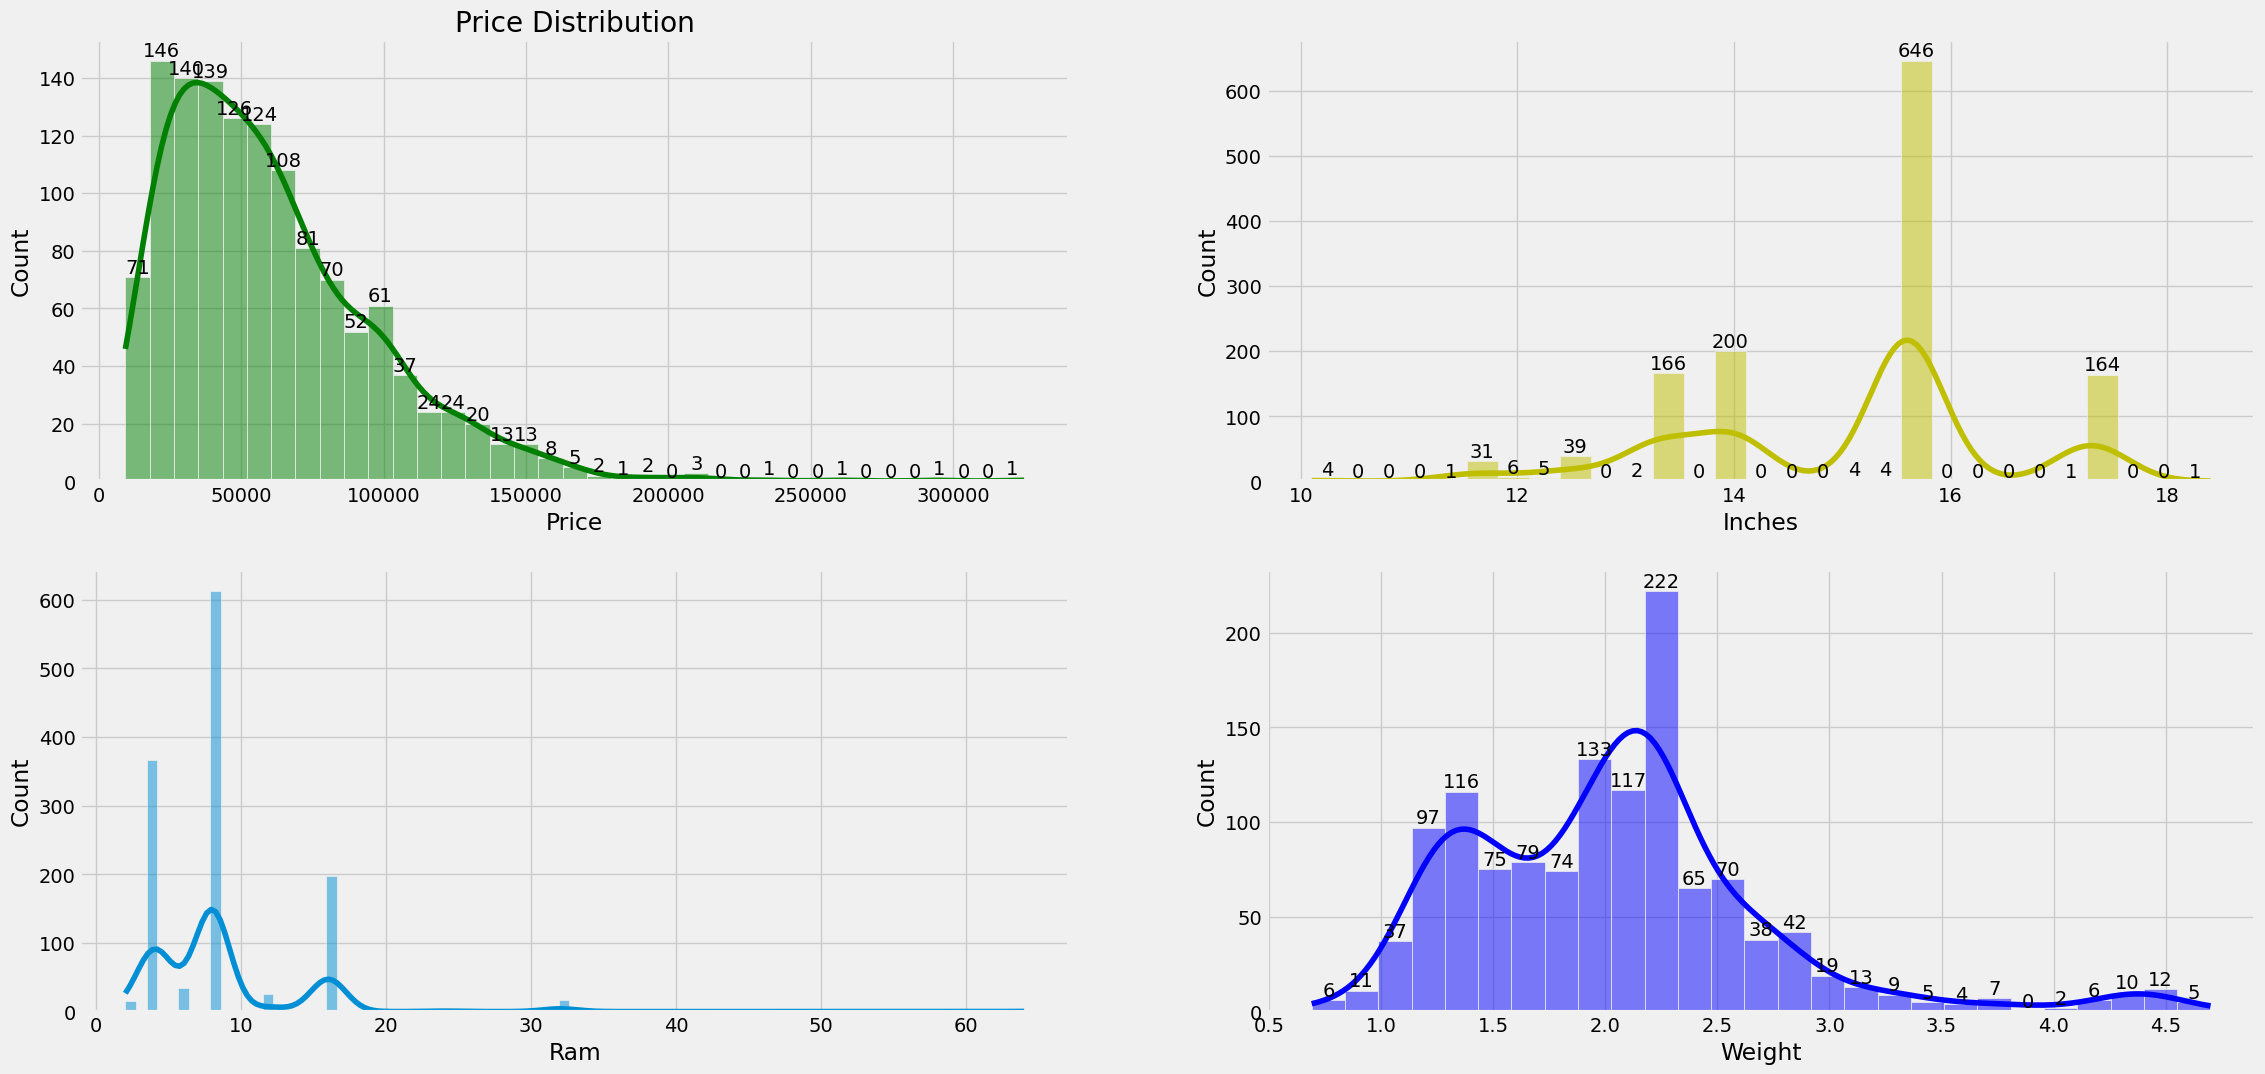

In [ ]:
plt.subplots(nrows=2,ncols=2,figsize = (25,12))
plt.subplot(2,2,1)
ax = sns.histplot(data=df[num_cols]['Price'],kde=True,color='g')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Price Distribution')
plt.subplot(2,2,2)
ax = sns.histplot(data=df[num_cols]['Inches'],kde=True,color='y')
for i in ax.containers:
    ax.bar_label(i)
plt.subplot(2,2,3)
sns.histplot(data=df[num_cols]['Ram'],kde=True)
plt.subplot(2,2,4)
ax = sns.histplot(data=df[num_cols]['Weight'],kde=True,color='b')
for i in ax.containers:
    ax.bar_label(i)

### Comparing all with `Price`

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_18688\2722191790.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_18688\2722191790.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


Company
Dell    291
Name: count, dtype: int64

OpSys
Windows 10    1047
Name: count, dtype: int64

TypeName
Notebook    706
Name: count, dtype: int64



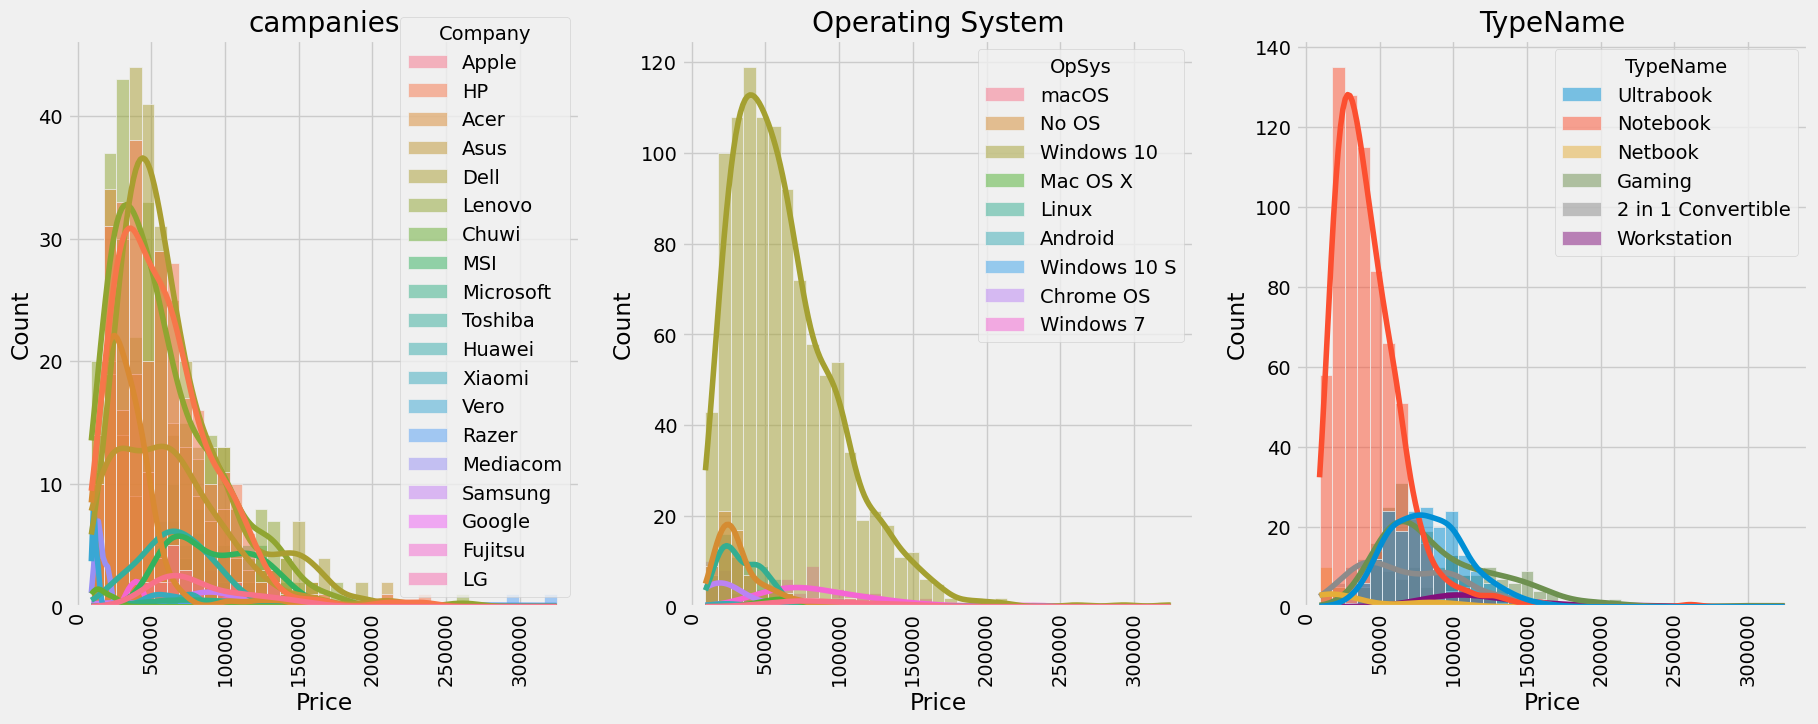

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Price'],color='g',hue='Company',kde=True)
plt.title('campanies')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Price'],kde=True,color='y',hue='OpSys')
plt.xticks(rotation = 'vertical')
plt.title(label='Operating System')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Price'],kde=True,hue=df['TypeName'])
plt.title('TypeName',)
plt.xticks(rotation = 'vertical')

print(f'{df["Company"].value_counts().head(1)}') 
print('')
print(f'{df["OpSys"].value_counts().head(1)}') 
print('')
print(f'{df["TypeName"].value_counts().head(1)}') 
print('')


### Insights
- windows 10 is dominating(OpSys)
- notebook is dominating(TypeName)

## Working with categorical Columns

### Opsys

In [ ]:
df['OpSys'].value_counts().head(1)

OpSys
Windows 10    1047
Name: count, dtype: int64

In [ ]:
opsysObj = df.groupby(df['OpSys'])
len(opsysObj)

9

In [ ]:
opsysObj.size().sort_values(ascending=False)

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
dtype: int64

In [ ]:
opsysObj.first()

Company            TypeName  Inches   
OpSys                                                 
Android          Lenovo  2 in 1 Convertible    10.1  \
Chrome OS          Acer            Notebook    15.6   
Linux              Acer            Notebook    15.6   
Mac OS X          Apple           Ultrabook    15.4   
No OS                HP            Notebook    15.6   
Windows 10         Acer            Notebook    15.6   
Windows 10 S  Microsoft           Ultrabook    13.5   
Windows 7        Lenovo            Notebook    14.0   
macOS             Apple           Ultrabook    13.3   

                                ScreenResolution   
OpSys                                              
Android          IPS Panel Touchscreen 1920x1200  \
Chrome OS                               1366x768   
Linux                                   1366x768   
Mac OS X      IPS Panel Retina Display 2880x1800   
No OS                          Full HD 1920x1080   
Windows 10                              1366x768   
Windows 10 S               Touchscreen 2256x1504   
Windows 7                      Full HD 1920x1080   
macOS         IPS Panel Retina Display 2560x1600   

                                               Cpu  Ram               Memory   
OpSys                                                                          
Android                Intel Atom x5-Z8550 1.44GHz    4   64GB Flash Storage  \
Chrome OS     Intel Celeron Dual Core 3205U 1.5GHz    2             16GB SSD   
Linux                   Intel Core i3 7130U 2.7GHz    4              1TB HDD   
Mac OS X                      Intel Core i7 2.2GHz   16  256GB Flash Storage   
No OS                   Intel Core i5 7200U 2.5GHz    8            256GB SSD   
Windows 10                 AMD A9-Series 9420 3GHz    4            500GB HDD   
Windows 10 S            Intel Core i5 7200U 2.5GHz    4            128GB SSD   
Windows 7               Intel Core i5 6200U 2.3GHz    8            256GB SSD   
macOS                         Intel Core i5 2.3GHz    8            128GB SSD   

                                       Gpu  Weight        Price  
OpSys                                                            
Android              Intel HD Graphics 400   0.690   16996.3200  
Chrome OS                Intel HD Graphics   2.190   10602.7200  
Linux                Intel HD Graphics 620   2.100   19553.7600  
Mac OS X           Intel Iris Pro Graphics   2.040  114017.6016  
No OS                Intel HD Graphics 620   1.860   30636.0000  
Windows 10                   AMD Radeon R5   2.100   21312.0000  
Windows 10 S         Intel HD Graphics 620   1.252   58021.9200  
Windows 7            Intel HD Graphics 520   2.020   71395.2000  
macOS         Intel Iris Plus Graphics 640   1.370   71378.6832

In [ ]:
opsysObj.groups

{'Android': [50, 1114], 'Chrome OS': [290, 317, 430, 437, 472, 504, 584, 619, 677, 690, 697, 745, 762, 817, 828, 838, 846, 888, 907, 949, 953, 959, 1049, 1088, 1102, 1191, 1215], 'Linux': [36, 40, 42, 59, 69, 96, 97, 102, 180, 210, 220, 235, 236, 272, 276, 281, 296, 338, 340, 379, 394, 403, 415, 423, 427, 439, 446, 524, 543, 555, 579, 604, 612, 613, 614, 616, 651, 669, 711, 712, 728, 769, 832, 852, 876, 886, 896, 965, 1090, 1123, 1182, 1188, 1198, 1227, 1242, 1250, 1263, 1267], 'Mac OS X': [6, 26, 34, 794, 1069, 1193, 1210, 1234], 'No OS': [2, 10, 11, 18, 22, 46, 62, 76, 122, 125, 136, 138, 142, 172, 184, 187, 192, 193, 205, 212, 213, 216, 242, 261, 267, 279, 289, 303, 305, 356, 364, 367, 381, 463, 509, 514, 527, 547, 594, 627, 643, 654, 704, 725, 752, 783, 850, 859, 863, 871, 932, 947, 992, 1056, 1061, 1091, 1128, 1150, 1152, 1164, 1173, 1174, 1196, 1201, 1217, 1248], 'Windows 10': [5, 8, 9, 13, 16, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39, 41, 43, 44, 47, 48

In [ ]:
opsysObj.get_group(name='Windows 10')

Company            TypeName  Inches   
5       Acer            Notebook    15.6  \
8       Asus           Ultrabook    14.0   
9       Acer           Ultrabook    14.0   
13      Dell            Notebook    15.6   
16      Dell            Notebook    15.6   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
5                                       1366x768  \
8                              Full HD 1920x1080   
9                    IPS Panel Full HD 1920x1080   
13                             Full HD 1920x1080   
16                             Full HD 1920x1080   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu  Ram              Memory   
5                  AMD A9-Series 9420 3GHz    4           500GB HDD  \
8               Intel Core i7 8550U 1.8GHz   16           512GB SSD   
9               Intel Core i5 8250U 1.6GHz    8           256GB SSD   
13                Intel Core i3 6006U 2GHz    4           256GB SSD   
16              Intel Core i7 7500U 2.7GHz    8           256GB SSD   
...                                    ...  ...                 ...   
1269            Intel Core i7 6500U 2.5GHz    4           500GB HDD   
1270            Intel Core i7 6500U 2.5GHz    4           128GB SSD   
1271            Intel Core i7 6500U 2.5GHz   16           512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz    2  64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz    6             1TB HDD   

                         Gpu       OpSys  Weight       Price  
5              AMD Radeon R5  Windows 10    2.10  21312.0000  
8       Nvidia GeForce MX150  Windows 10    1.30  79653.6000  
9     Intel UHD Graphics 620  Windows 10    1.60  41025.6000  
13        AMD Radeon R5 M430  Windows 10    2.20  26581.3920  
16        AMD Radeon R5 M430  Windows 10    2.20  39693.6000  
...                      ...         ...     ...         ...  
1269     Nvidia GeForce 920M  Windows 10    2.20  38378.6496  
1270   Intel HD Graphics 520  Windows 10    1.80  33992.6400  
1271   Intel HD Graphics 520  Windows 10    1.30  79866.7200  
1272       Intel HD Graphics  Windows 10    1.50  12201.1200  
1273      AMD Radeon R5 M330  Windows 10    2.19  40705.9200  

[1047 rows x 11 columns]

In [ ]:
opsysObj.get_group('Linux').shape

(58, 11)

In [ ]:
price= opsysObj.sum()[num_cols]['Price'].sort_values(ascending=False)
round(price)


OpSys
Windows 10      65906715.0
Windows 7        4043915.0
No OS            2067596.0
Linux            1921718.0
macOS            1211864.0
Chrome OS         796366.0
Windows 10 S      548349.0
Mac OS X          538286.0
Android            46247.0
Name: Price, dtype: float64

In [ ]:
price= round(opsysObj['Price'].mean()).sort_values(ascending=False)
price


OpSys
macOS           93220.0
Windows 7       89865.0
Windows 10 S    68544.0
Mac OS X        67286.0
Windows 10      62948.0
Linux           33133.0
No OS           31327.0
Chrome OS       29495.0
Android         23124.0
Name: Price, dtype: float64

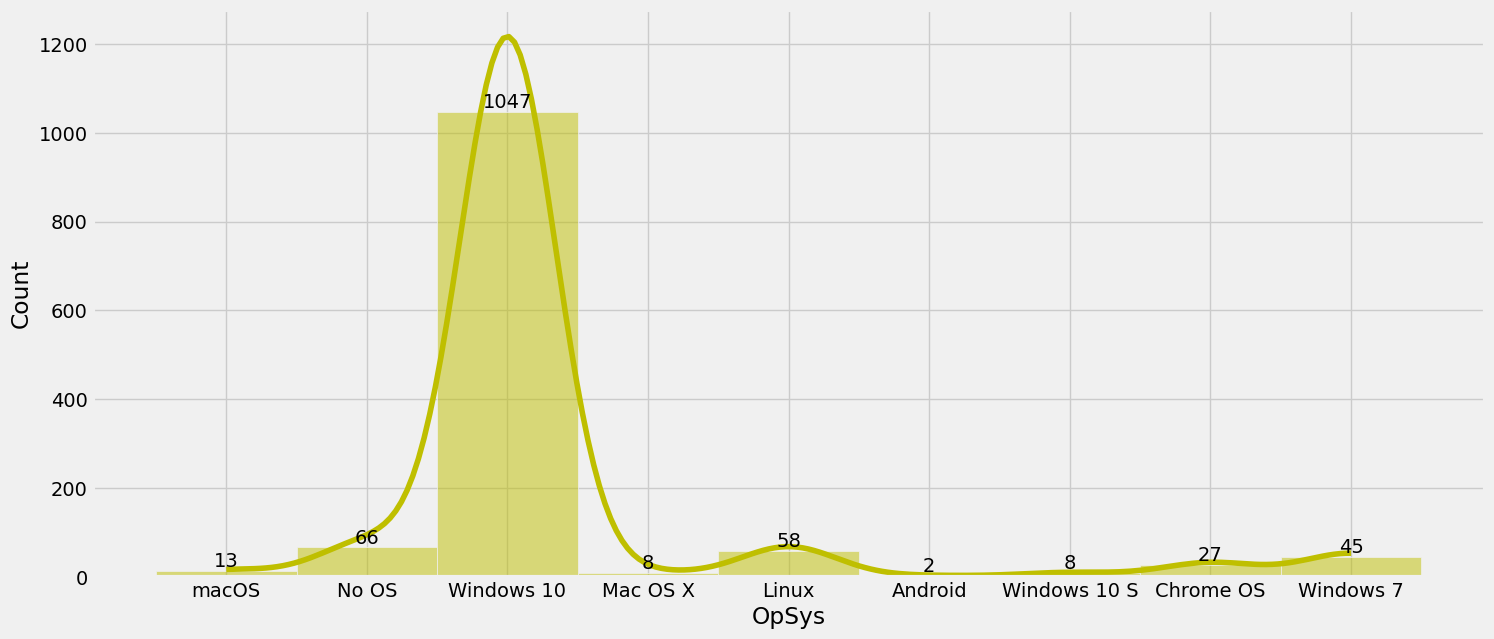

In [ ]:
plt.figure(figsize=(16,7))


value_counts = df['OpSys'].value_counts().sort_values()
ax = sns.histplot(data=df,x='OpSys',bins=len(value_counts),kde=True,color='y')
for i in ax.containers:
    ax.bar_label(i)
    


In [ ]:
df['OpSys'].nunique()

9

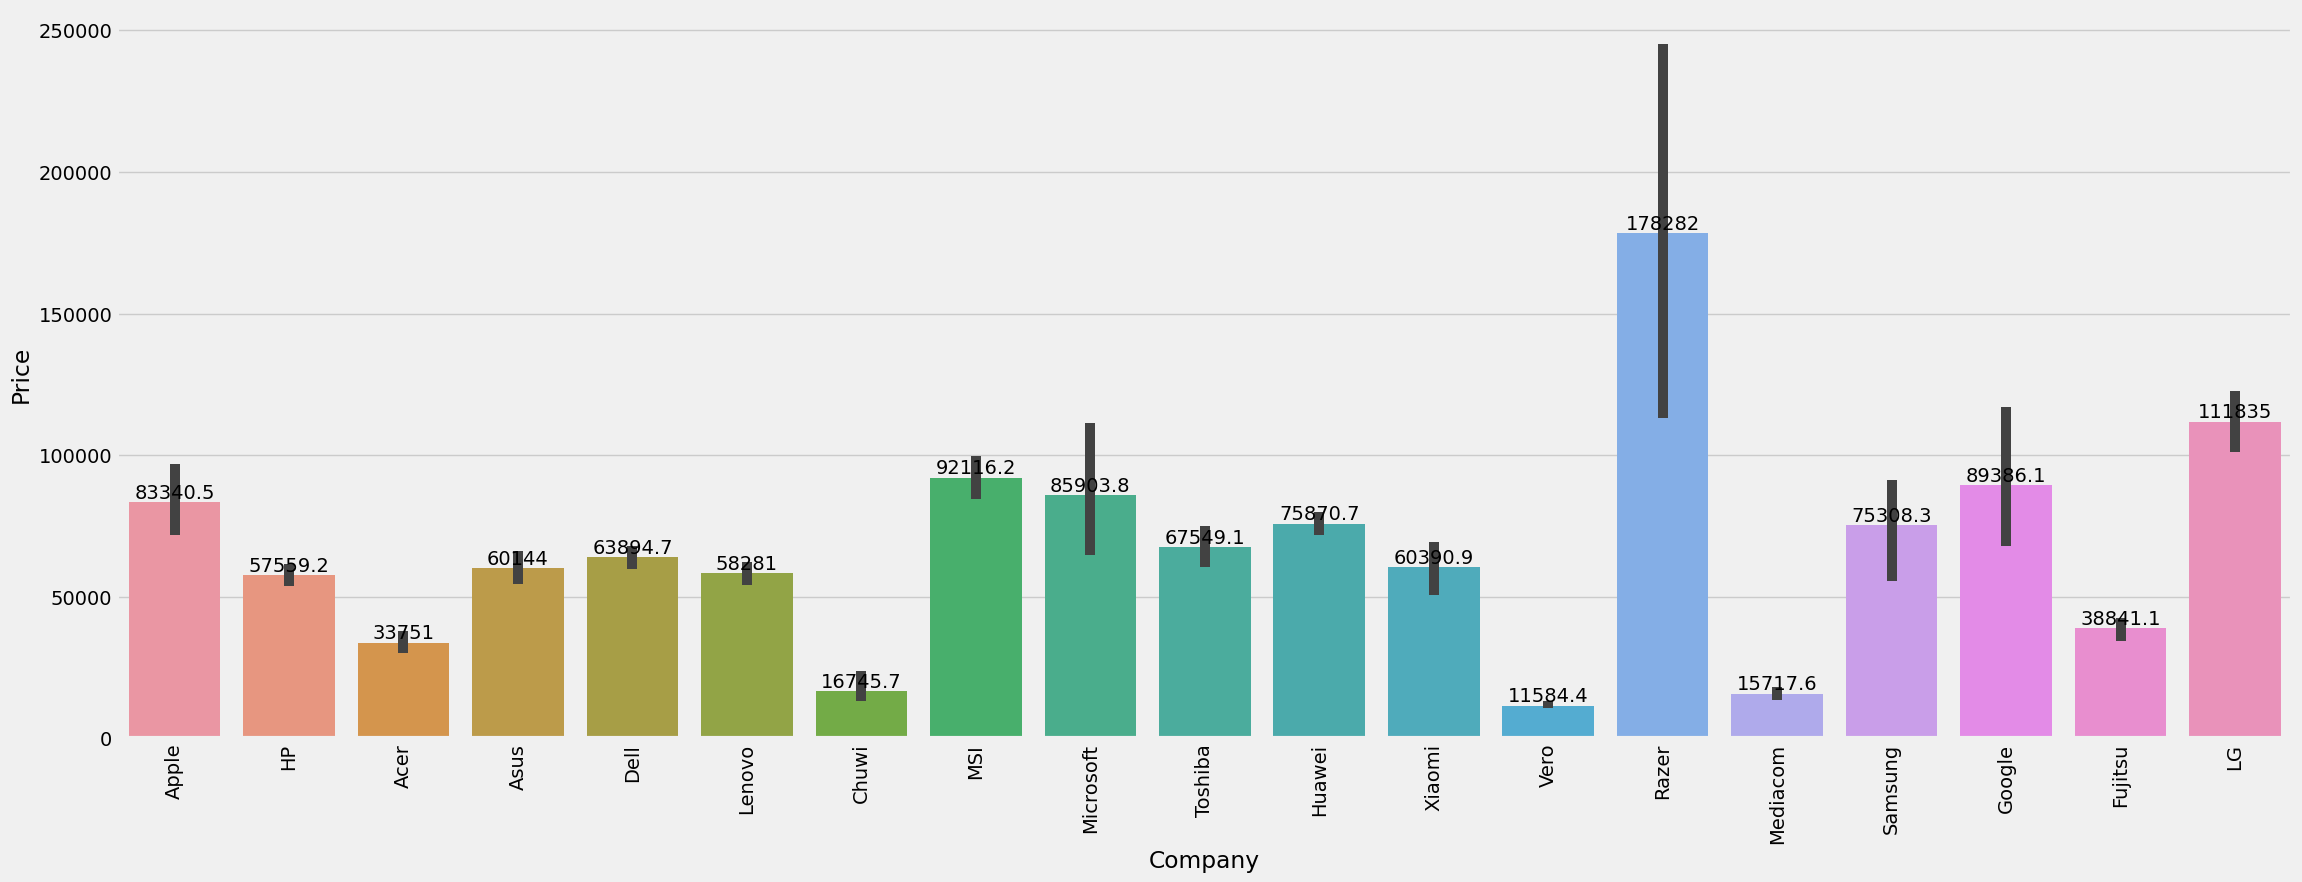

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.barplot(data=df,x=df['Company'],y=df['Price'])
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

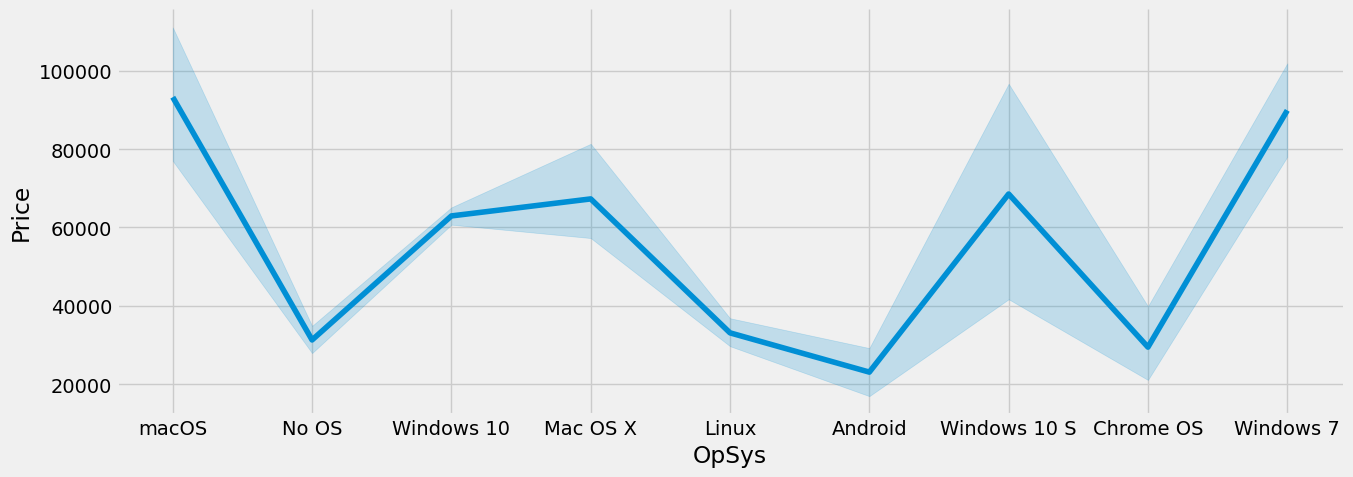

In [ ]:
sns.relplot(kind='line', data=df, x='OpSys', y='Price', aspect=2.75)

### Company

In [ ]:
companyObj = df.groupby(by=df['Company'])
len(companyObj)

19

In [ ]:
companyObj.get_group('Apple')

Company   TypeName  Inches                    ScreenResolution   
0      Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600  \
1      Apple  Ultrabook    13.3                            1440x900   
3      Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4      Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
6      Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
7      Apple  Ultrabook    13.3                            1440x900   
12     Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
14     Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   
15     Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
17     Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
26     Apple  Ultrabook    13.3                            1440x900   
34     Apple  Ultrabook    13.3                            1440x900   
45     Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
81     Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   
249    Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
270    Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
794    Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   
1069   Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   
1193   Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   
1210   Apple  Ultrabook    12.0  IPS Panel Retina Display 2304x1440   
1234   Apple  Ultrabook    11.6                            1366x768   

                         Cpu  Ram               Memory   
0       Intel Core i5 2.3GHz    8            128GB SSD  \
1       Intel Core i5 1.8GHz    8  128GB Flash Storage   
3       Intel Core i7 2.7GHz   16            512GB SSD   
4       Intel Core i5 3.1GHz    8            256GB SSD   
6       Intel Core i7 2.2GHz   16  256GB Flash Storage   
7       Intel Core i5 1.8GHz    8  256GB Flash Storage   
12      Intel Core i7 2.8GHz   16            256GB SSD   
14    Intel Core M m3 1.2GHz    8            256GB SSD   
15      Intel Core i5 2.3GHz    8            256GB SSD   
17      Intel Core i7 2.9GHz   16            512GB SSD   
26      Intel Core i5 1.6GHz    8  128GB Flash Storage   
34      Intel Core i5 1.6GHz    8  256GB Flash Storage   
45      Intel Core i5 2.0GHz    8            256GB SSD   
81      Intel Core i5 1.3GHz    8            512GB SSD   
249     Intel Core i5 3.1GHz    8            512GB SSD   
270     Intel Core i5 2.9GHz    8            512GB SSD   
794      Intel Core M 1.2GHz    8  512GB Flash Storage   
1069     Intel Core M 1.1GHz    8  256GB Flash Storage   
1193     Intel Core M 1.1GHz    8  256GB Flash Storage   
1210     Intel Core M 1.2GHz    8  512GB Flash Storage   
1234    Intel Core i5 1.6GHz    4  256GB Flash Storage   

                               Gpu     OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640     macOS    1.37   71378.6832  
1           Intel HD Graphics 6000     macOS    1.34   47895.5232  
3               AMD Radeon Pro 455     macOS    1.83  135195.3360  
4     Intel Iris Plus Graphics 650     macOS    1.37   96095.8080  
6          Intel Iris Pro Graphics  Mac OS X    2.04  114017.6016  
7           Intel HD Graphics 6000     macOS    1.34   61735.5360  
12              AMD Radeon Pro 555     macOS    1.83  130001.6016  
14           Intel HD Graphics 615     macOS    0.92   67260.6720  
15    Intel Iris Plus Graphics 640     macOS    1.37   80908.3440  
17              AMD Radeon Pro 560     macOS    1.83  152274.2400  
26          Intel HD Graphics 6000  Mac OS X    1.35   58554.7200  
34          Intel HD Graphics 6000  Mac OS X    1.35   53173.4400  
45         Intel Iris Graphics 540     macOS    1.37   75604.3200  
81           Intel HD Graphics 615     macOS    0.92   80452.8000  
249   Intel Iris Plus Graphics 650     macOS    1.37  108691.2000  
270        Intel Iris Graphics 550     macOS    1.37  104370.1920  
794      

In [ ]:
round(companyObj['Price'].sum()).sort_values(ascending=False).head(5)

Company
Dell      18593362.0
Lenovo    16843203.0
HP        15425856.0
Asus       9081742.0
MSI        4974276.0
Name: Price, dtype: float64

In [ ]:
round(companyObj['Price'].mean()).sort_values(ascending=False).head(5)

Company
Razer        178282.0
LG           111835.0
MSI           92116.0
Google        89386.0
Microsoft     85904.0
Name: Price, dtype: float64

In [ ]:
companyObj.get_group('Razer')

Company   TypeName  Inches   
196    Razer     Gaming    17.3  \
647    Razer     Gaming    14.0   
778    Razer     Gaming    14.0   
816    Razer  Ultrabook    12.5   
830    Razer     Gaming    17.3   
1117   Razer  Ultrabook    12.5   
1231   Razer     Gaming    14.0   

                                   ScreenResolution   
196             4K Ultra HD / Touchscreen 3840x2160  \
647                               Full HD 1920x1080   
778                               Full HD 1920x1080   
816   IPS Panel 4K Ultra HD / Touchscreen 3840x2160   
830             4K Ultra HD / Touchscreen 3840x2160   
1117            Touchscreen / 4K Ultra HD 3840x2160   
1231                              Full HD 1920x1080   

                              Cpu  Ram     Memory                      Gpu   
196   Intel Core i7 7820HK 2.9GHz   32    1TB SSD  Nvidia GeForce GTX 1080  \
647   Intel Core i7 7700HQ 2.8GHz   16  256GB SSD  Nvidia GeForce GTX 1060   
778   Intel Core i7 7700HQ 2.8GHz   16  512GB SSD  Nvidia GeForce GTX 1060   
816    Intel Core i7 7500U 2.5GHz   16  512GB SSD    Intel HD Graphics 620   
830   Intel Core i7 7820HK 2.9GHz   32  512GB SSD  Nvidia GeForce GTX 1080   
1117   Intel Core i7 6500U 2.5GHz    8  256GB SSD    Intel HD Graphics 520   
1231  Intel Core i7 7700HQ 2.8GHz   16    1TB SSD  Nvidia GeForce GTX 1060   

           OpSys  Weight      Price  
196   Windows 10    3.49  324954.72  
647   Windows 10    1.95  138474.72  
778   Windows 10    1.95  154458.72  
816   Windows 10    1.29   95850.72  
830   Windows 10    3.49  292986.72  
1117  Windows 10    1.25   54825.12  
1231  Windows 10    1.95  186426.72

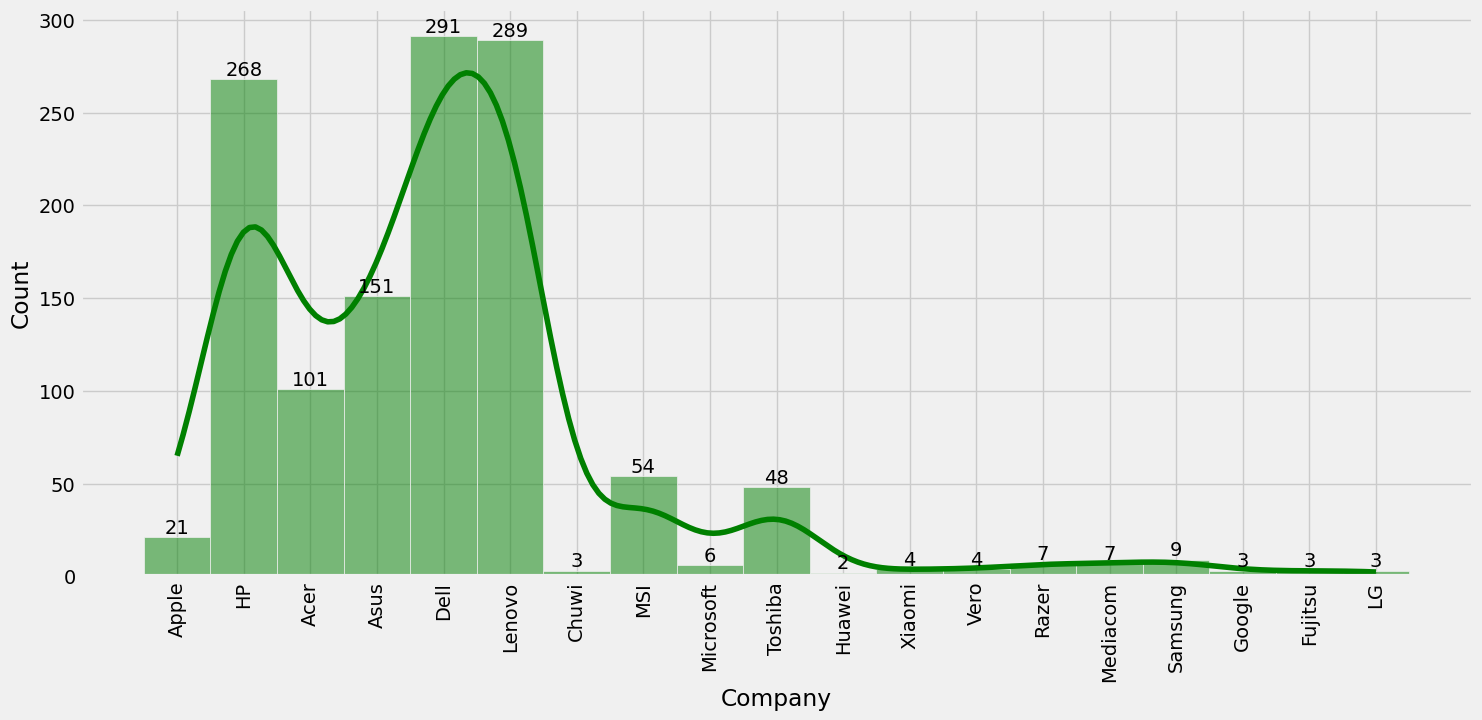

In [ ]:
plt.figure(figsize=(16,7))


value_counts = df['Company'].value_counts().sort_values()
ax = sns.histplot(data=df,x='Company',bins=len(value_counts),kde=True,color='g')
plt.xticks(rotation = 'vertical' )
for i in ax.containers:
    ax.bar_label(i)
    


Company
Razer        178282.0
LG           111835.0
MSI           92116.0
Google        89386.0
Microsoft     85904.0
Apple         83340.0
Huawei        75871.0
Samsung       75308.0
Toshiba       67549.0
Dell          63895.0
Name: Price, dtype: float64


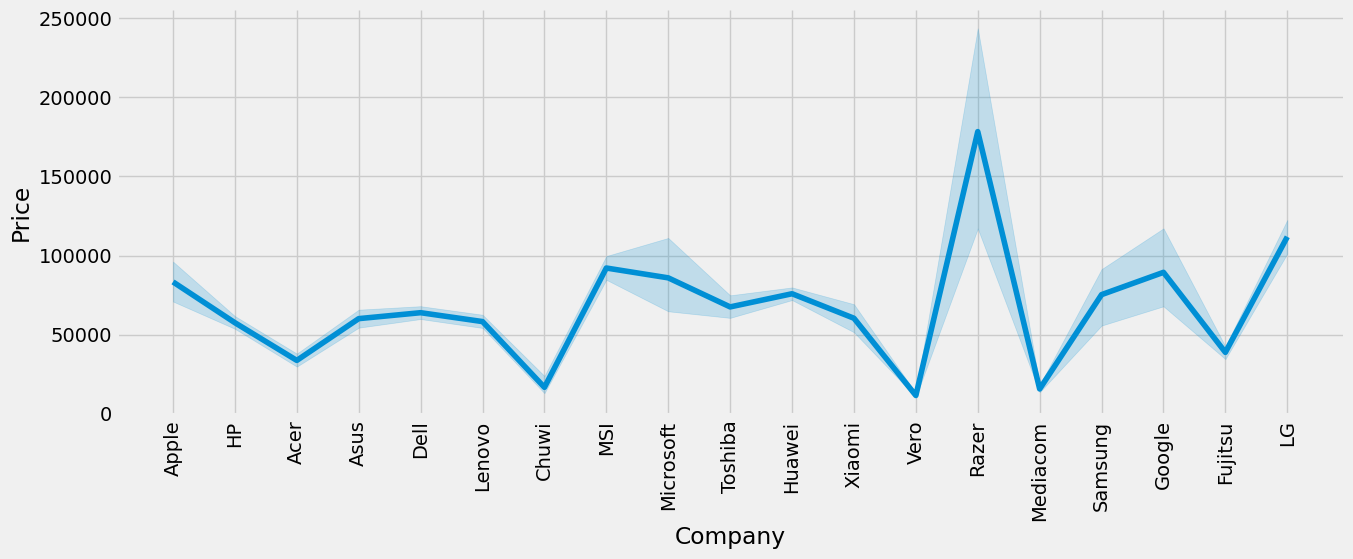

In [ ]:
sns.relplot(kind='line', data=df, x='Company', y='Price', aspect=2.75)
plt.xticks(rotation = 'vertical')
print(round(companyObj['Price'].mean()).sort_values(ascending=False).head(10))

### TypeName

In [ ]:
typeNameObj = df.groupby(by=df['TypeName'])
typeNameObj

In [ ]:
df['TypeName'].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [ ]:
typeNameObj.get_group(name='Workstation')

Company     TypeName  Inches                     ScreenResolution   
204     Dell  Workstation    15.6                4K Ultra HD 3840x2160  \
297     Dell  Workstation    17.3                    Full HD 1920x1080   
353       HP  Workstation    15.6                    Full HD 1920x1080   
387     Dell  Workstation    15.6                    Full HD 1920x1080   
388     Dell  Workstation    15.6          IPS Panel Full HD 1920x1080   
398     Dell  Workstation    15.6  4K Ultra HD / Touchscreen 3840x2160   
410   Lenovo  Workstation    15.6                    Full HD 1920x1080   
433   Lenovo  Workstation    15.6      IPS Panel 4K Ultra HD 3840x2160   
447     Dell  Workstation    15.6                    Full HD 1920x1080   
451     Dell  Workstation    15.6          IPS Panel Full HD 1920x1080   
452       HP  Workstation    15.6          IPS Panel Full HD 1920x1080   
476     Dell  Workstation    15.6                    Full HD 1920x1080   
486     Dell  Workstation    15.6          IPS Panel Full HD 1920x1080   
570       HP  Workstation    17.3                             1600x900   
599     Dell  Workstation    15.6      Full HD / Touchscreen 1920x1080   
692       HP  Workstation    17.3                    Full HD 1920x1080   
707   Lenovo  Workstation    15.6                    Full HD 1920x1080   
736       HP  Workstation    15.6                    Full HD 1920x1080   
744   Lenovo  Workstation    15.6      IPS Panel 4K Ultra HD 3840x2160   
749       HP  Workstation    17.3          IPS Panel Full HD 1920x1080   
757       HP  Workstation    15.6                    Full HD 1920x1080   
800       HP  Workstation    15.6                    Full HD 1920x1080   
869     Dell  Workstation    15.6                    Full HD 1920x1080   
950       HP  Workstation    15.6          IPS Panel Full HD 1920x1080   
1086      HP  Workstation    15.6                    Full HD 1920x1080   
1103      HP  Workstation    17.3          IPS Panel Full HD 1920x1080   
1136      HP  Workstation    17.3          IPS Panel Full HD 1920x1080   
1143      HP  Workstation    15.6          IPS Panel Full HD 1920x1080   
1145      HP  Workstation    15.6                    Full HD 1920x1080   

                                Cpu  Ram                         Memory   
204     Intel Xeon E3-1505M V6 3GHz   16           256GB SSD +  1TB HDD  \
297     Intel Core i7 7820HQ 2.9GHz   16                      256GB SSD   
353     Intel Core i7 7700HQ 2.8GHz    8                      256GB SSD   
387     Intel Core i5 6440HQ 2.6GHz    8                      500GB HDD   
388     Intel Core i7 6820HQ 2.7GHz    8                      256GB SSD   
398     Intel Core i7 7700HQ 2.8GHz    8                      256GB SSD   
410     Intel Core i7 7700HQ 2.8GHz    8                      512GB SSD   
433      Intel Core i7 7600U 2.8GHz   16                      512GB SSD   
447     Intel Xeon E3-1505M V6 3GHz    8  64GB Flash Storage +  1TB HDD   
451     Intel Core i7 6820HQ 2.7GHz   16                      256GB SSD   
452     Intel Core i7 7820HQ 2.9GHz    8                      512GB SSD   
476     Intel Core i7 7700HQ 2.8GHz    8                      256GB SSD   
486     Intel Core i7 6820HQ 2.7GHz   16                      512GB SSD   
570     Intel Core i5 7440HQ 2.8GHz    8                      500GB HDD   
599     Intel Core i7 7700HQ 2.8GHz    8                      256GB SSD   
692     Intel Core i7 7700HQ 2.8GHz    8                      500GB HDD   
707      Intel Core i7 6500U 2.5GHz   16                      512GB SSD   
736     Intel Core i7 7700HQ 2.8GHz   16                      256GB SSD   
744      Intel Core i7 7600U 2.8GHz   16                        1TB SSD   
749   Intel Xeon E3-1535M v5 2.9GHz   16                      256GB SSD   
757     Intel Core i7 6700HQ 2.6GHz    8                      256GB SSD   
800     Intel Core i7 7700HQ 2.8GHz    8                      256GB SSD   
869     Intel Core i7 7700HQ 2.8GHz    8                   

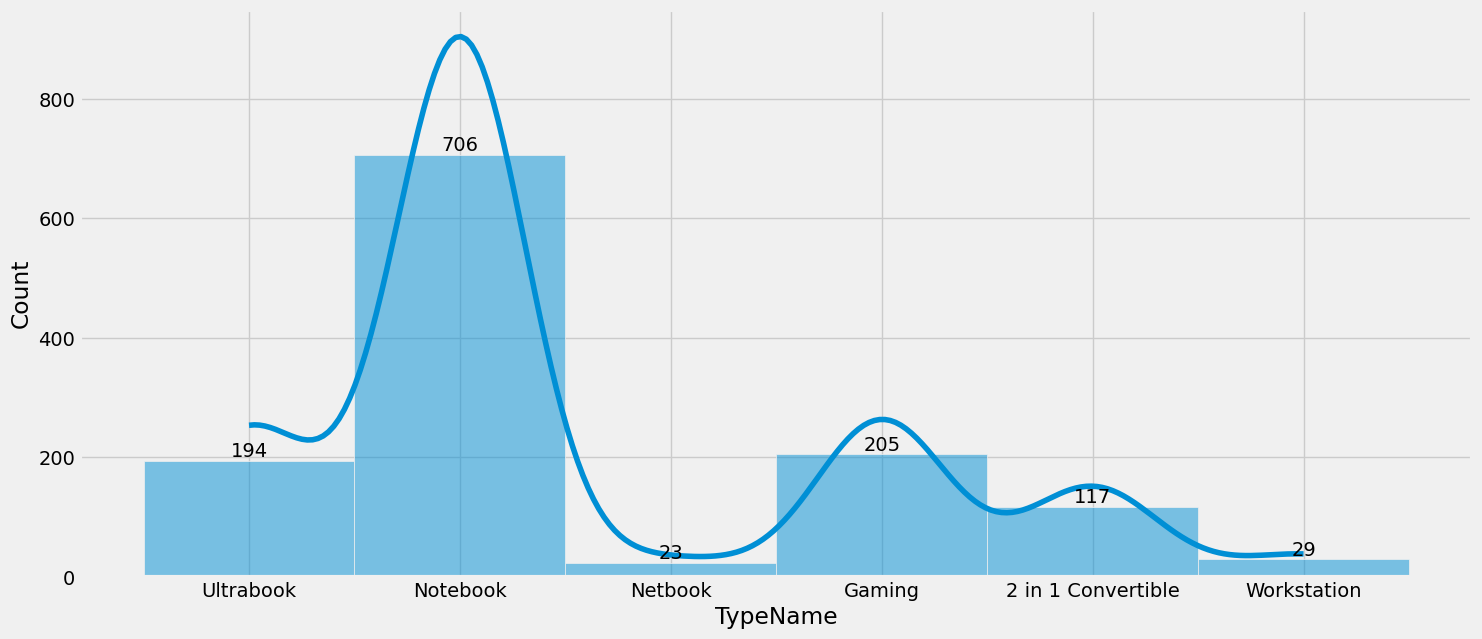

In [ ]:
plt.figure(figsize=(16,7))


value_counts = df['TypeName'].value_counts().sort_values()
ax = sns.histplot(data=df,x='TypeName',bins=len(value_counts),kde=True)
for i in ax.containers:
    ax.bar_label(i)
    


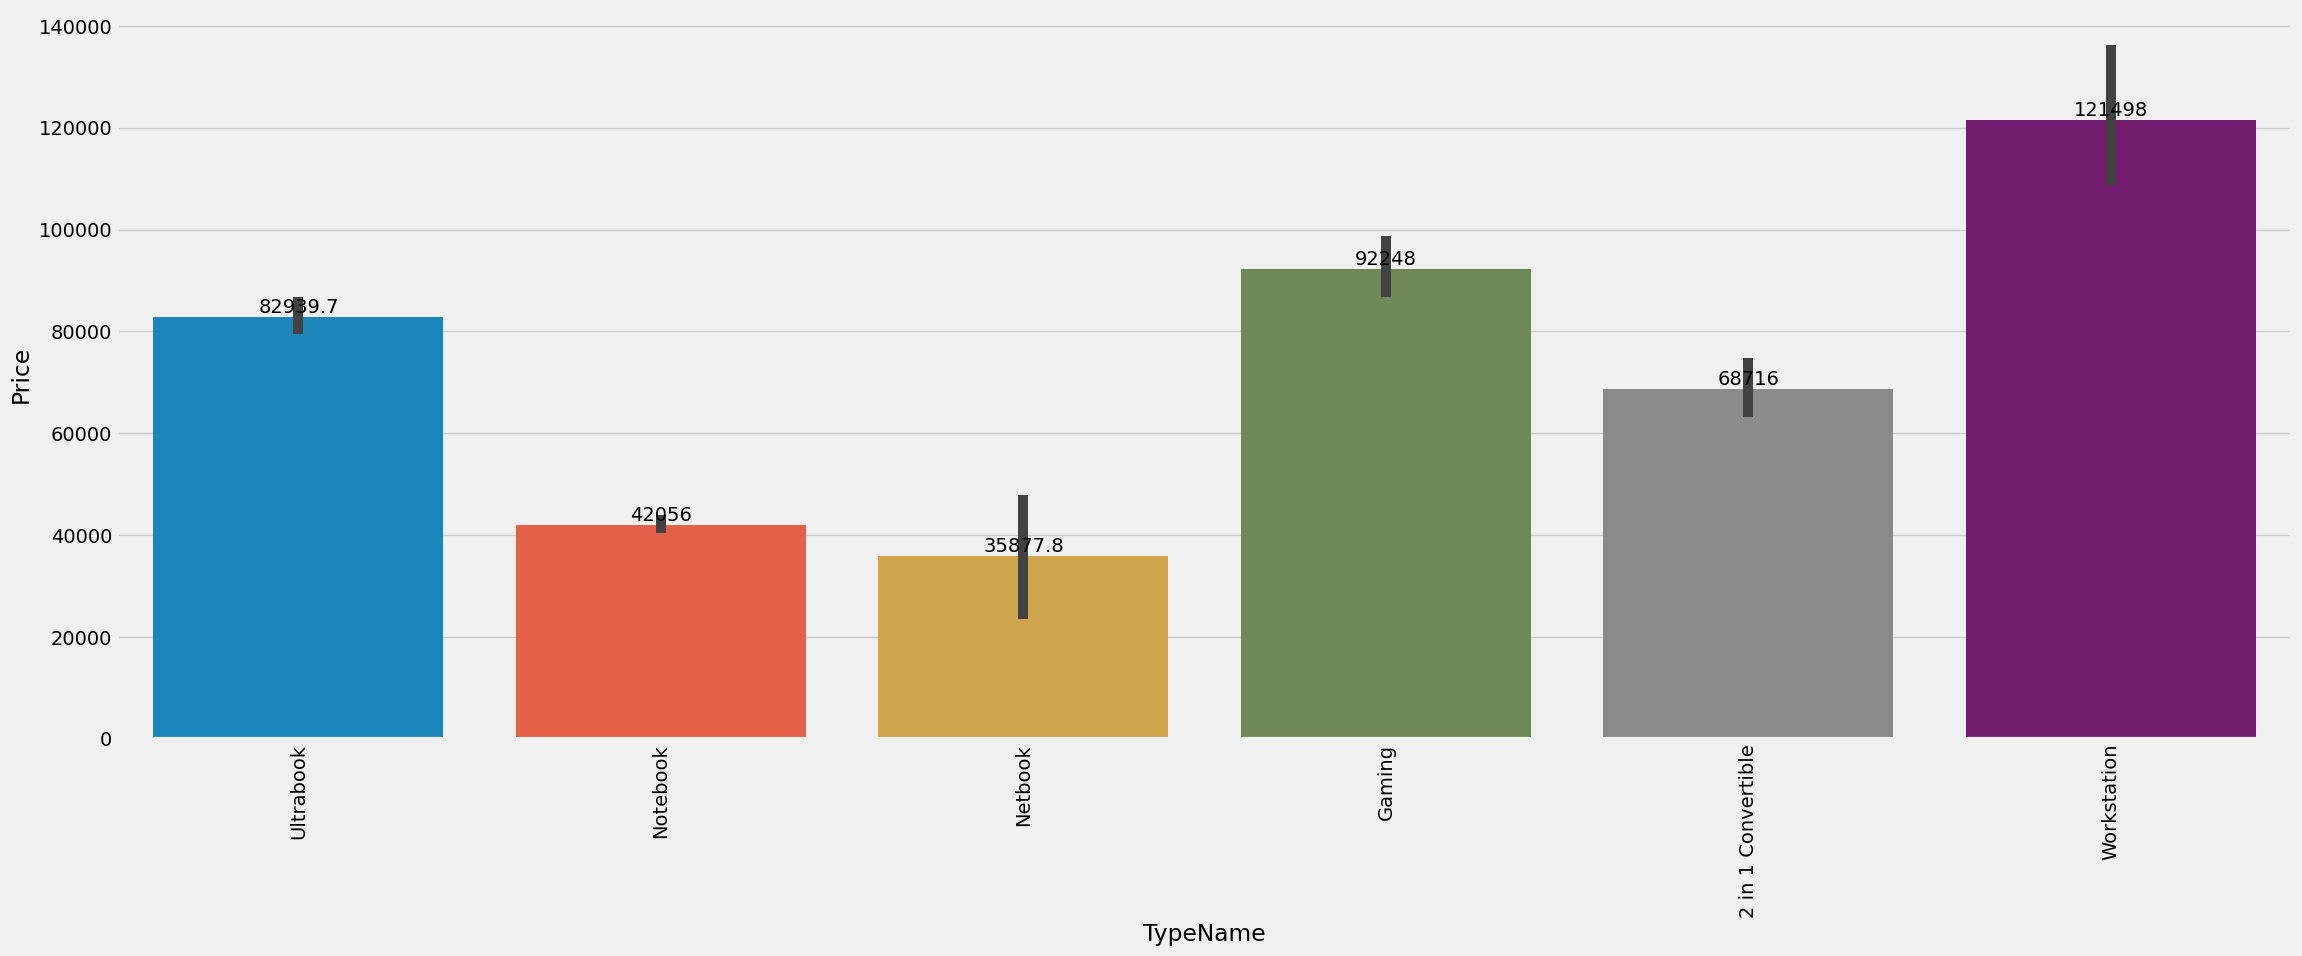

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.barplot(data=df,x=df['TypeName'],y=df['Price'])
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

TypeName
Workstation           121498.0
Gaming                 92248.0
Ultrabook              82940.0
2 in 1 Convertible     68716.0
Notebook               42056.0
Netbook                35878.0
Name: Price, dtype: float64


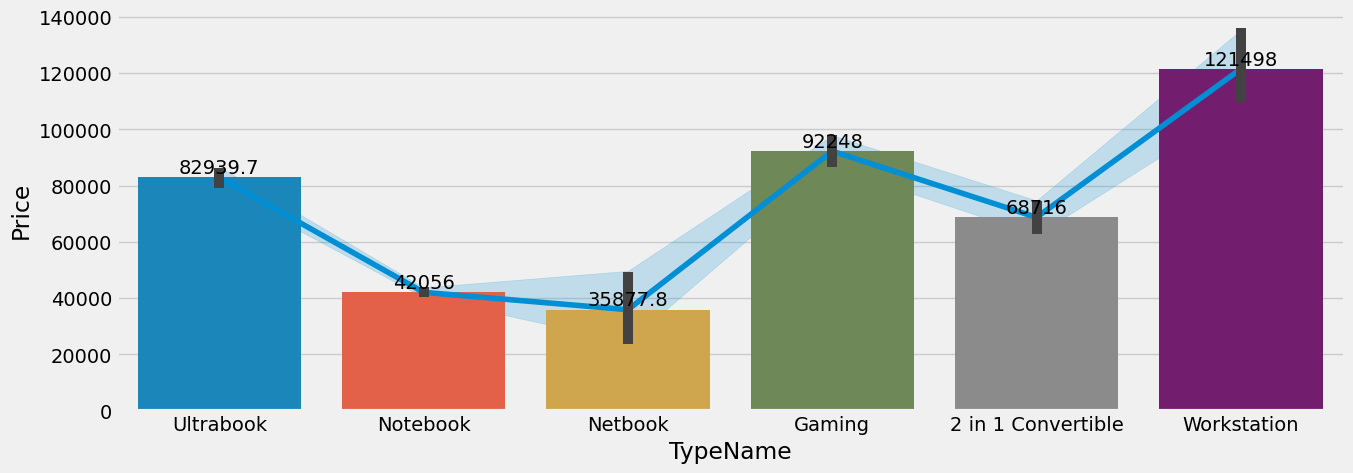

In [ ]:
featureName = 'TypeName'
sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
ax = sns.barplot(data=df,x=df['TypeName'],y=df['Price'])
for i in ax.containers:
    ax.bar_label(i)
# plt.xticks(rotation = 'vertical')
print(round(typeNameObj['Price'].mean()).sort_values(ascending=False).head(10))

TypeName
Workstation           121498.0
Gaming                 92248.0
Ultrabook              82940.0
2 in 1 Convertible     68716.0
Notebook               42056.0
Netbook                35878.0
Name: Price, dtype: float64


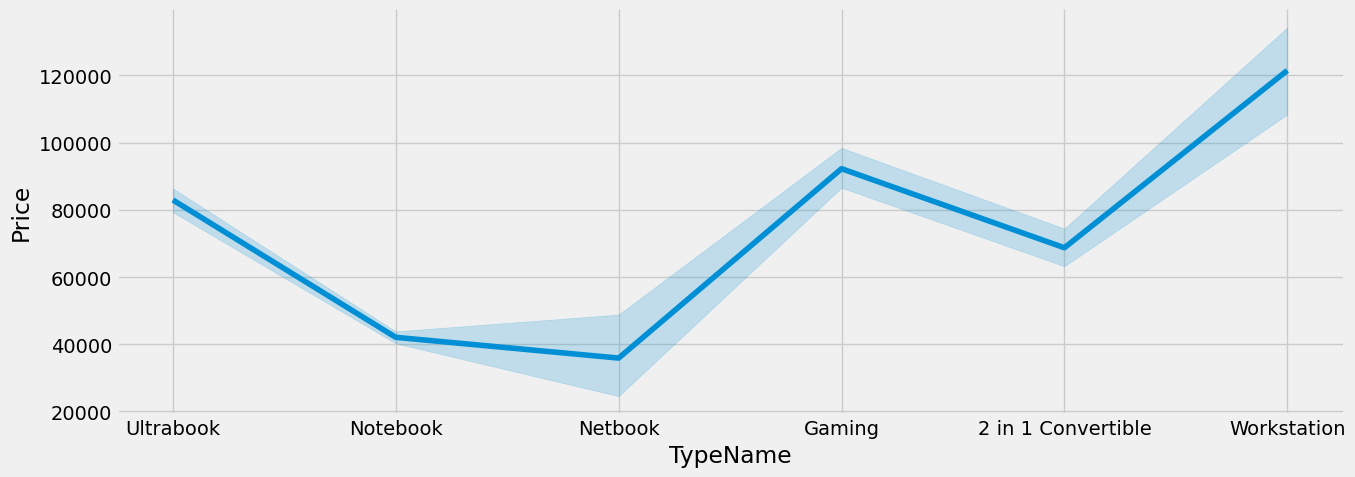

In [ ]:
featureName = 'TypeName'
sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
# plt.xticks(rotation = 'vertical')
print(round(typeNameObj['Price'].mean()).sort_values(ascending=False).head(10))

### Insigths
- notebook has highest distribution 
- but in terms of price workstation is highest

### Gpu

In [ ]:
gpuObj = df.groupby(by=df['Gpu'])
gpuObj
df['Gpu'].value_counts().sort_values(ascending=False).head(10)

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
Nvidia GeForce 940MX        43
AMD Radeon 530              41
Intel HD Graphics 500       39
Intel HD Graphics 400       33
Nvidia GeForce GTX 1070     30
Name: count, dtype: int64

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_18688\1363878757.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=rotation_angle, fontsize=9)  # Adjust rotation, alignment, and font size


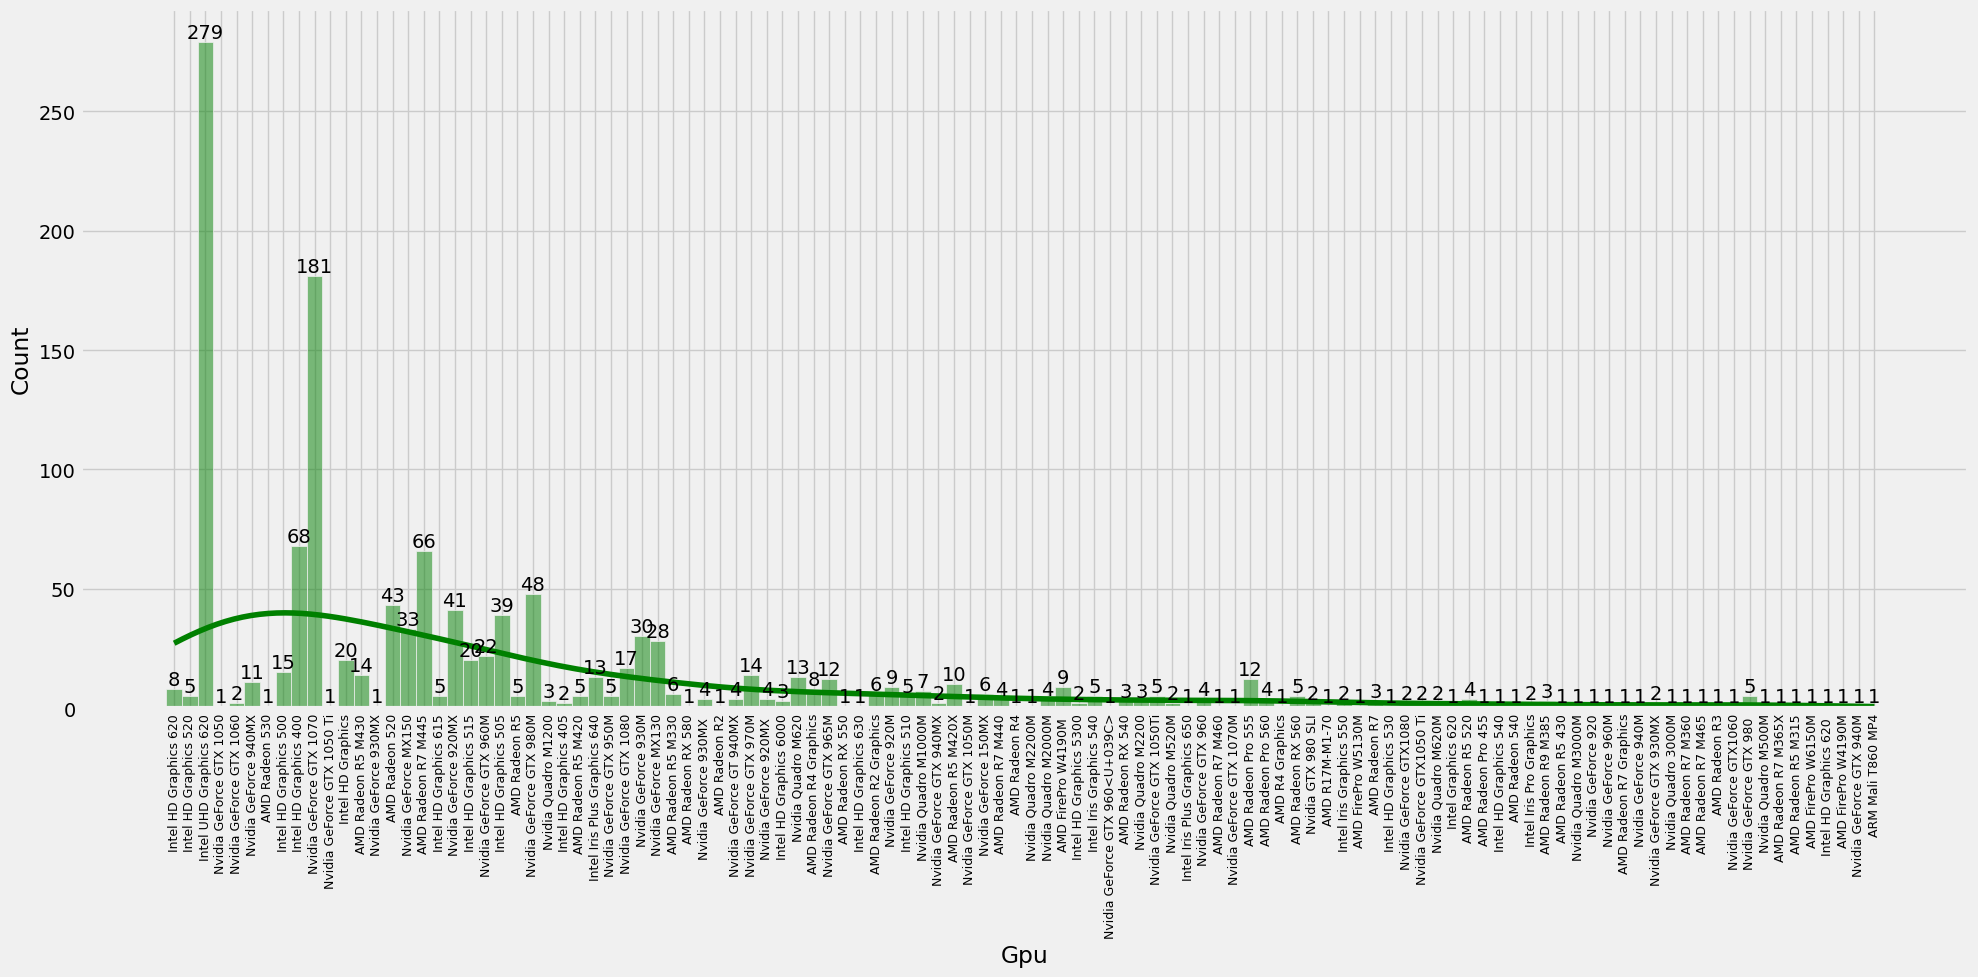

In [ ]:
plt.figure(figsize=(20,10))

# Create the histogram plot with attribute names as labels
value_counts = df['Gpu'].value_counts().sort_values(ascending=False)
num_bins = len(value_counts) # Adjust the number of bins as needed
rotation_angle = 90  # Adjust the rotation angle as needed

ax = sns.histplot(data=df, x='Gpu', bins=num_bins ,kde=True,color='g')
for i in ax.containers:
    ax.bar_label(i)

ax.set_xticklabels(value_counts.index, rotation=rotation_angle, fontsize=9)  # Adjust rotation, alignment, and font size

plt.tight_layout()  # Improve spacing and avoid overlapping
plt.show()  # Display the plot


Gpu
Nvidia GeForce GTX 1080     213511.0
Nvidia GeForce GTX 980      211788.0
Nvidia Quadro M3000M        210424.0
Nvidia GeForce GTX 1070M    191211.0
Nvidia Quadro M2000M        180060.0
Nvidia Quadro M2200M        167619.0
Nvidia Quadro M620M         159787.0
Nvidia GeForce GTX1080      158135.0
Nvidia Quadro 3000M         158135.0
AMD FirePro W6150M          154459.0
Name: Price, dtype: float64


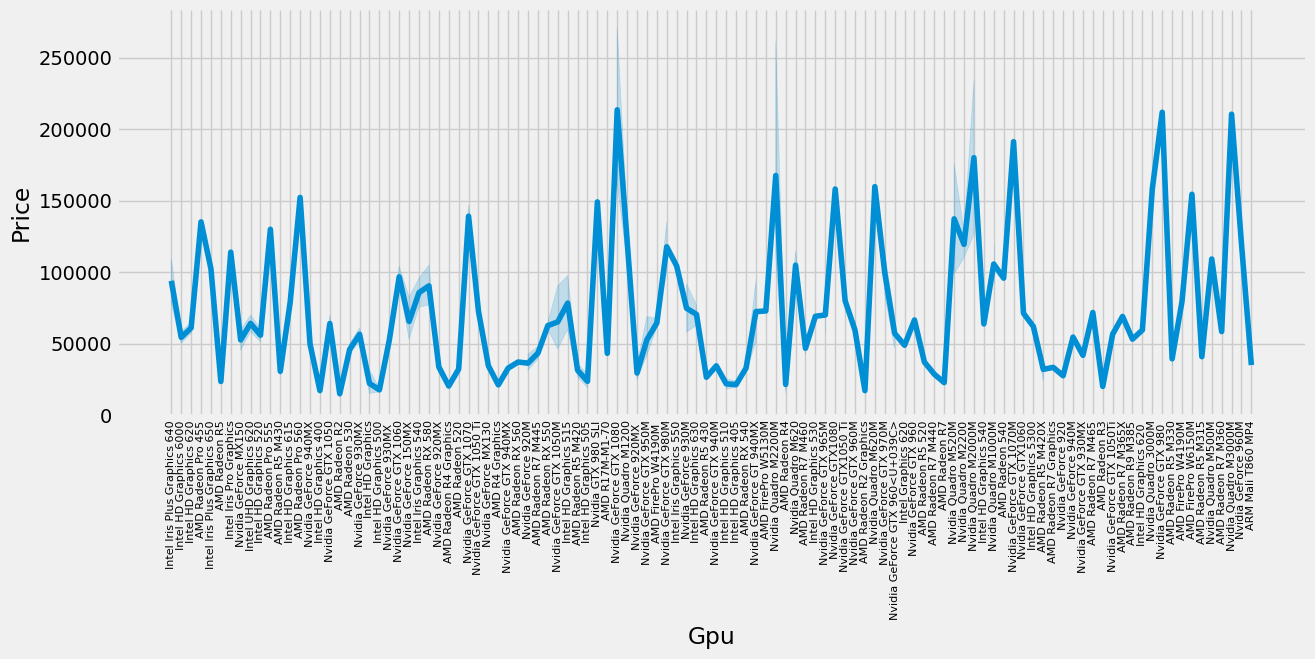

In [ ]:
featureName = 'Gpu'
ax = sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
plt.xticks(rotation='vertical', fontsize=8) 
print(round(gpuObj['Price'].mean()).sort_values(ascending=False).head(10))

### Memory

In [ ]:
memoryObj = df.groupby(by=df['Memory'])
memoryObj
df['Memory'].value_counts().sort_values(ascending=False).head(10)

Memory
256GB SSD               412
1TB HDD                 215
500GB HDD               123
512GB SSD               114
128GB SSD +  1TB HDD     94
128GB SSD                74
256GB SSD +  1TB HDD     73
32GB Flash Storage       36
2TB HDD                  16
1TB SSD                  14
Name: count, dtype: int64

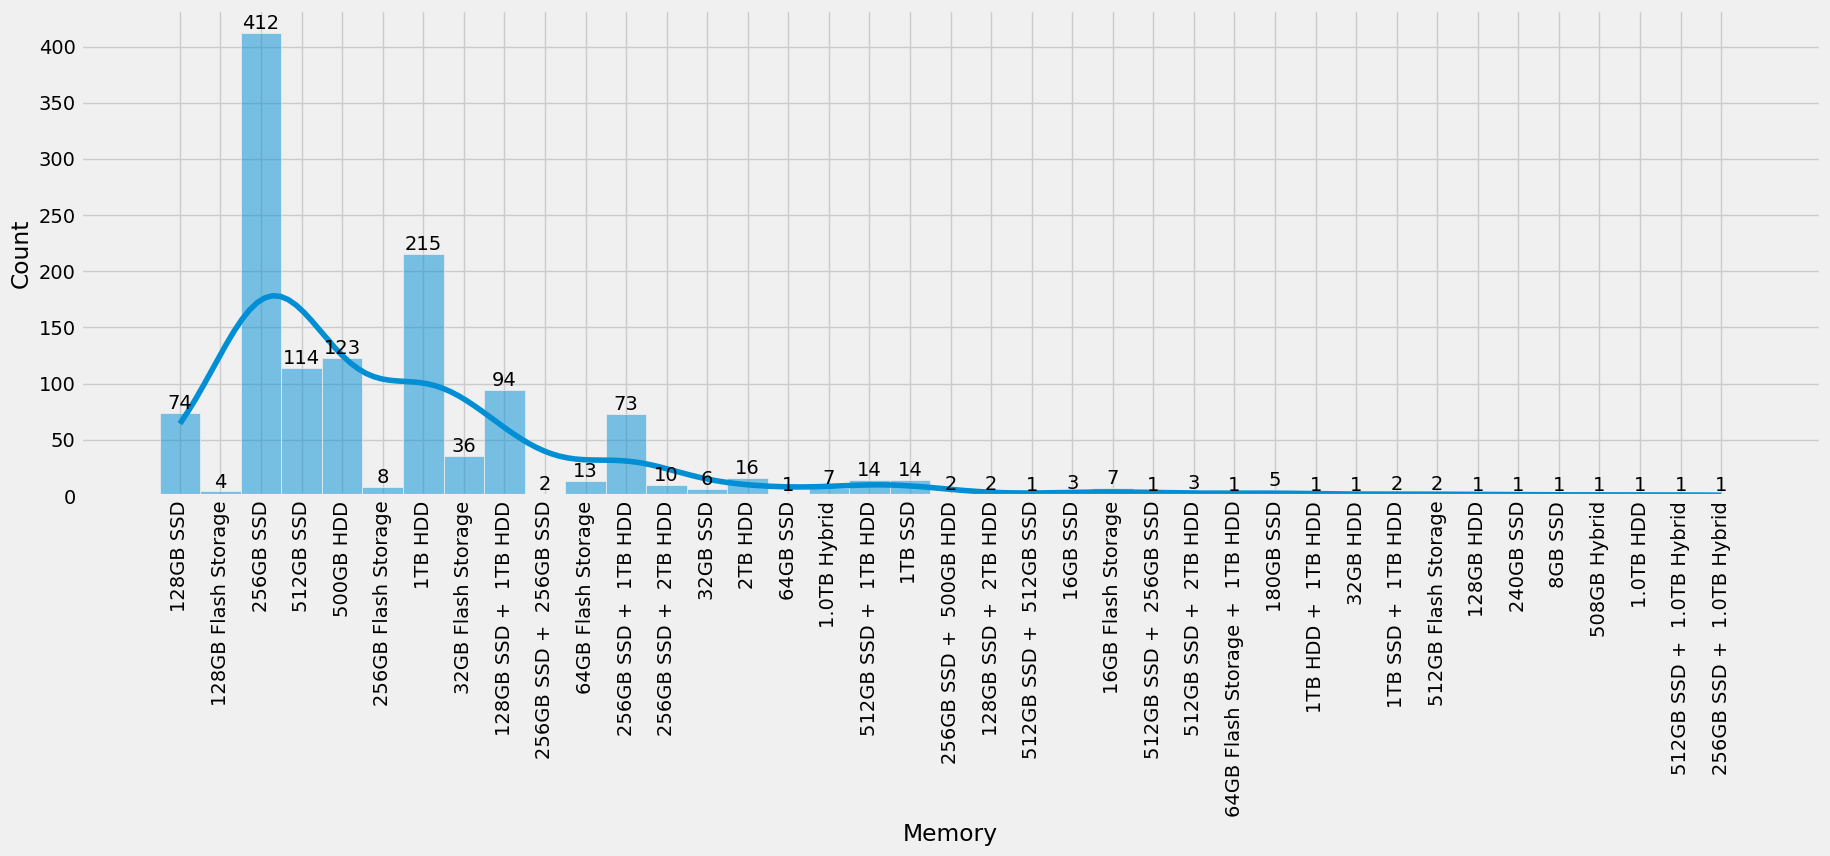

In [ ]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df,x='Memory',kde=True)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

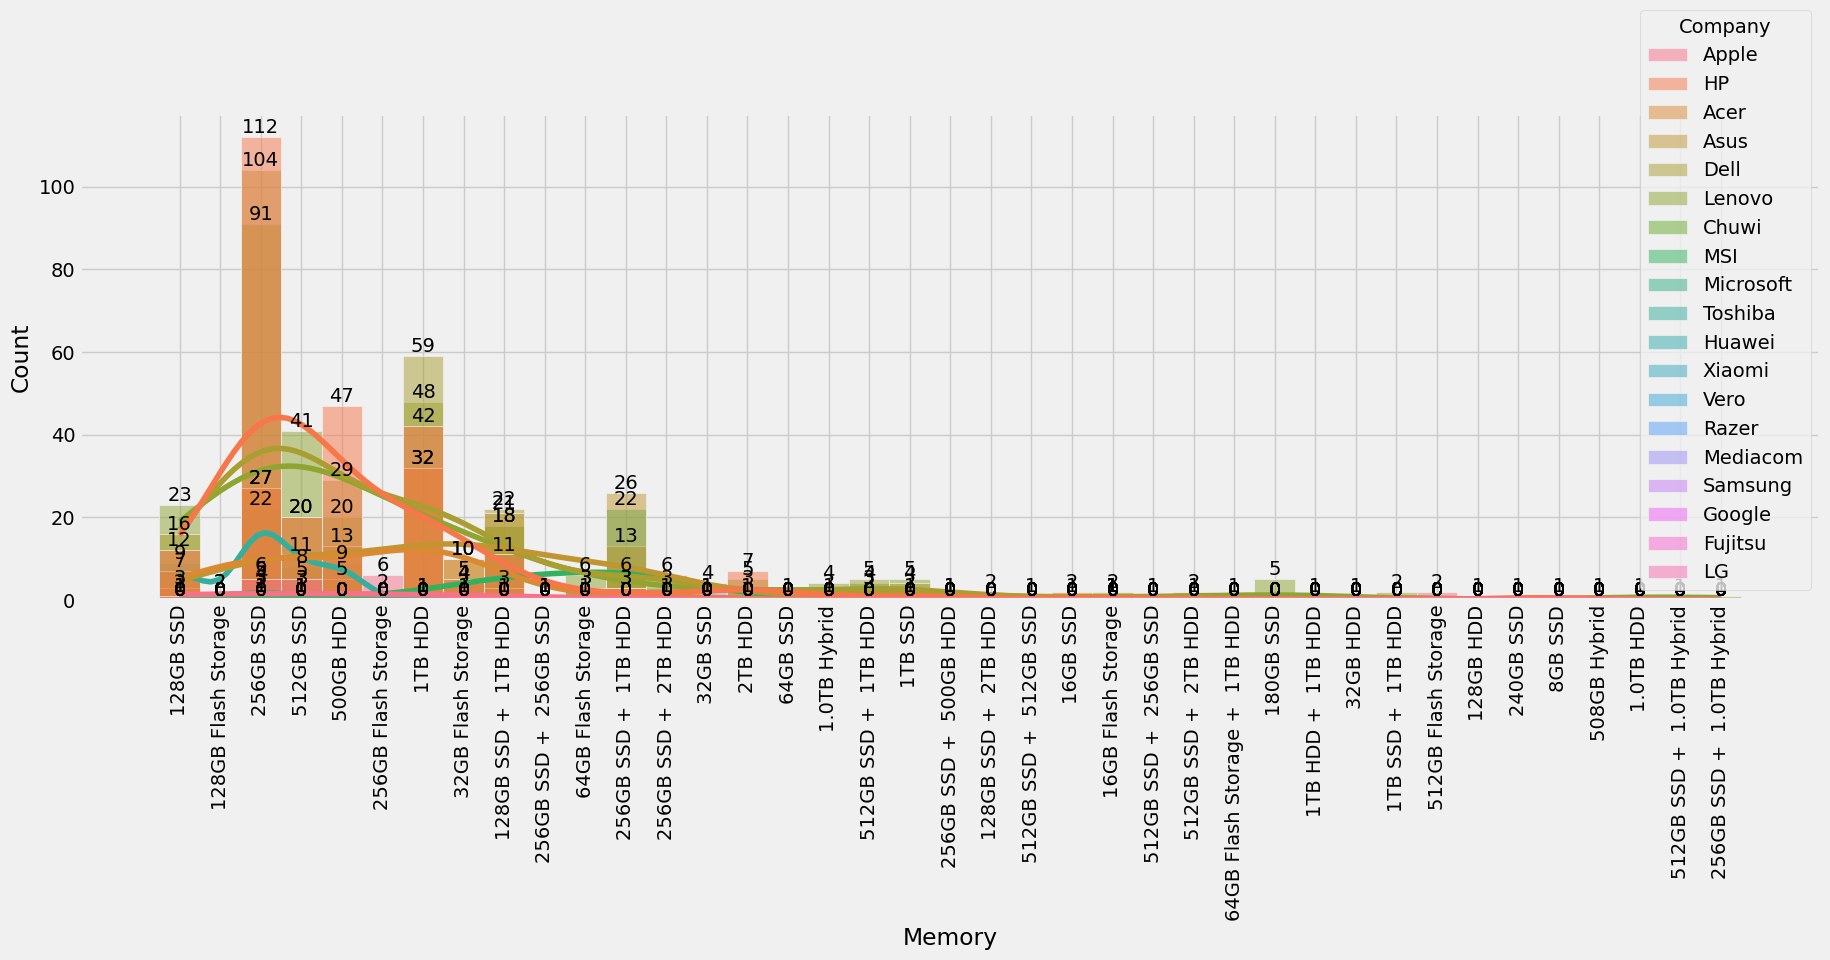

In [ ]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df,x='Memory',kde=True,hue='Company')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

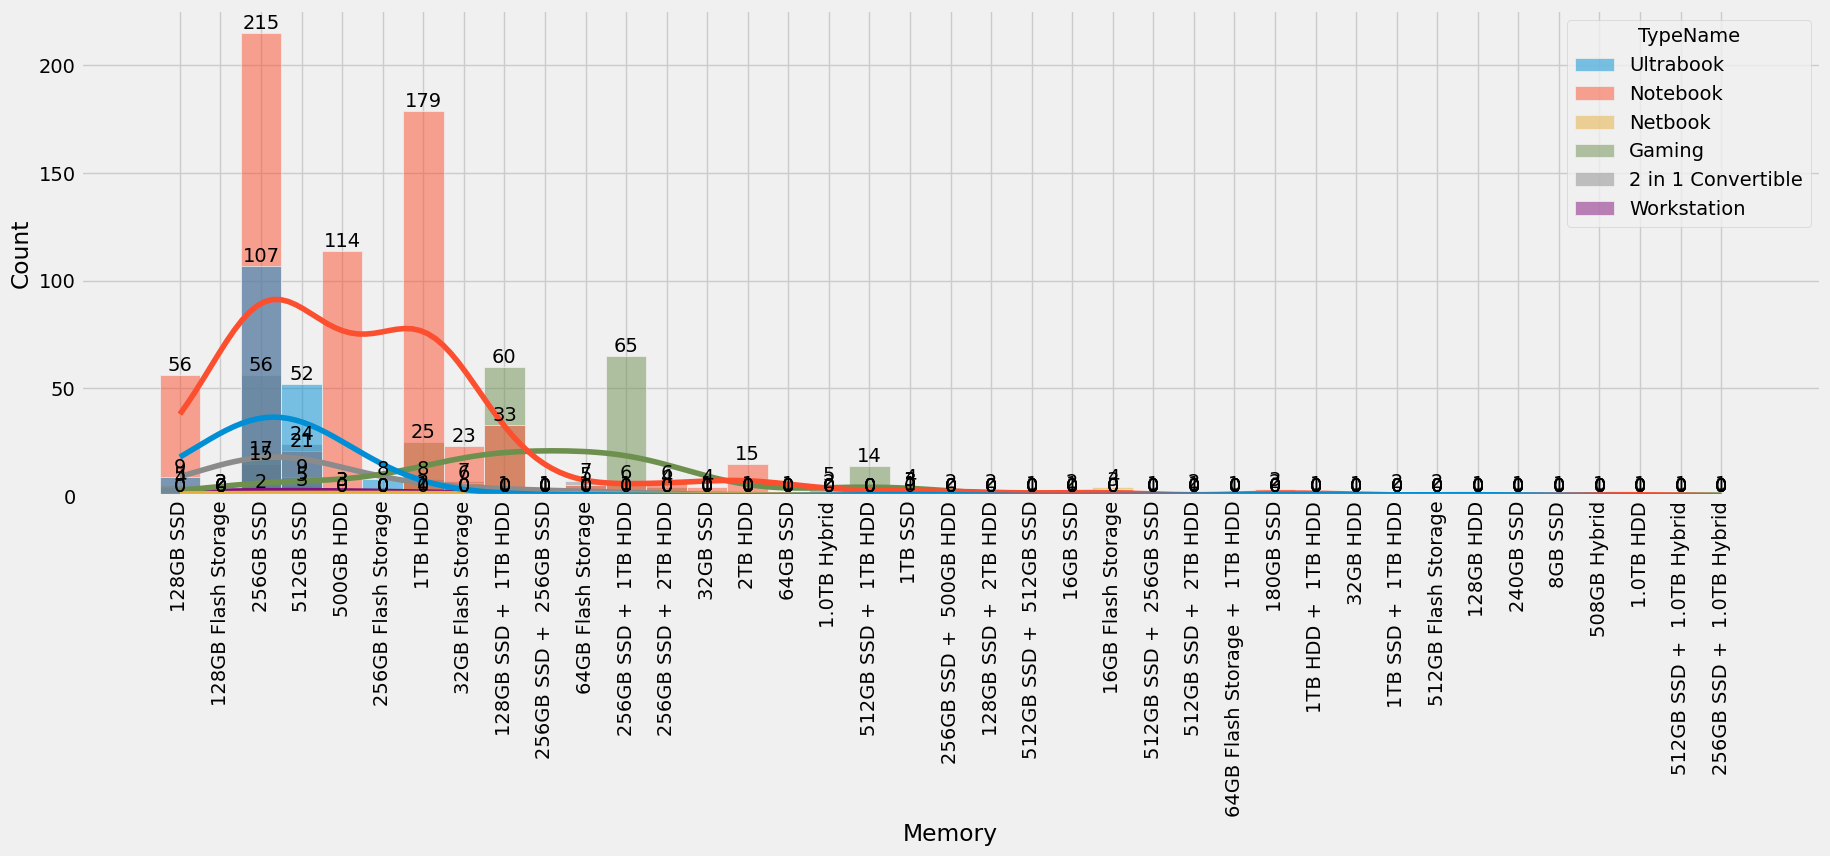

In [ ]:
plt.figure(figsize=(20,6))
plt.style.use('fivethirtyeight')
ax = sns.histplot(data=df,x='Memory',kde=True,hue='TypeName',color='y')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

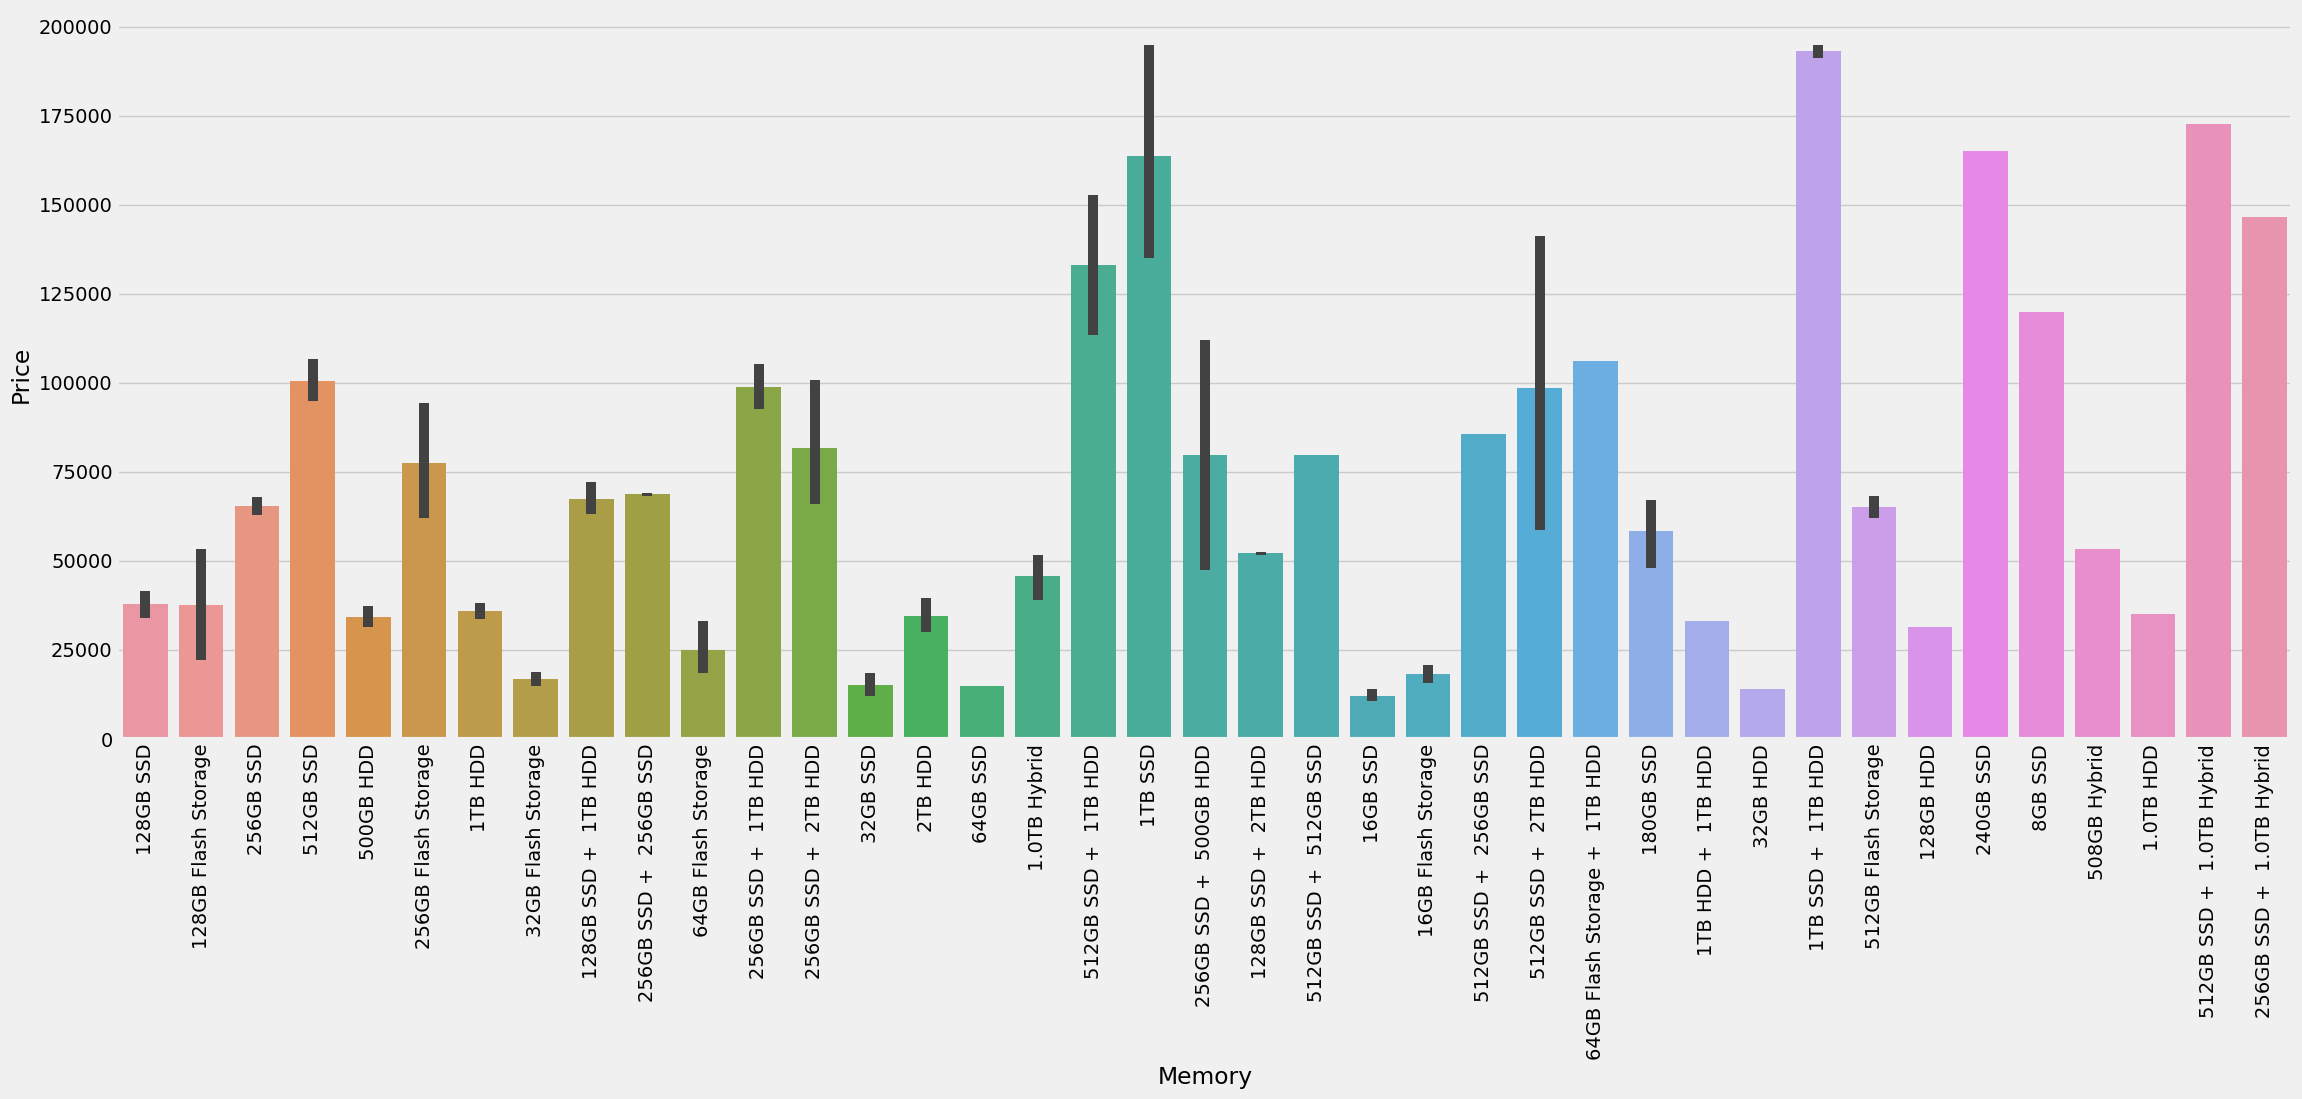

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.barplot(data=df,x=df['Memory'],y=df['Price'])
plt.xticks(rotation = 'vertical')

plt.show()

Gpu
Nvidia GeForce GTX 1080     213511.0
Nvidia GeForce GTX 980      211788.0
Nvidia Quadro M3000M        210424.0
Nvidia GeForce GTX 1070M    191211.0
Nvidia Quadro M2000M        180060.0
Nvidia Quadro M2200M        167619.0
Nvidia Quadro M620M         159787.0
Nvidia GeForce GTX1080      158135.0
Nvidia Quadro 3000M         158135.0
AMD FirePro W6150M          154459.0
Name: Price, dtype: float64


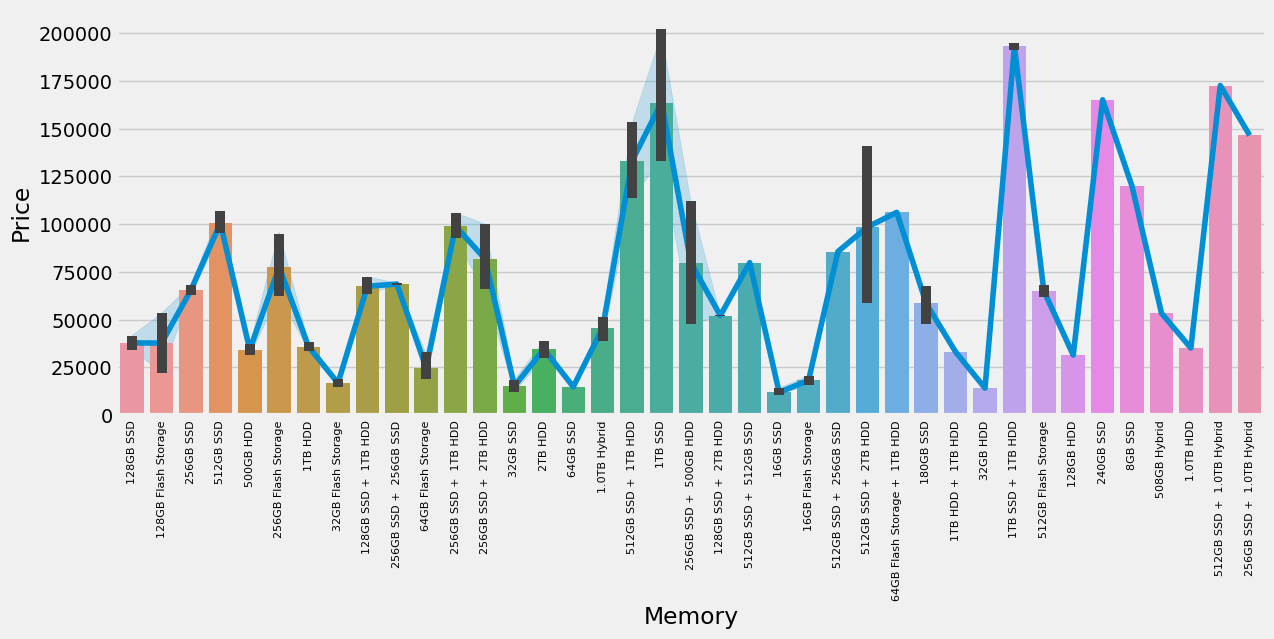

In [ ]:
featureName = 'Memory'
ax = sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
ax = sns.barplot(data=df,x=df['Memory'],y=df['Price'])

plt.xticks(rotation='vertical', fontsize=8) 
print(round(gpuObj['Price'].mean()).sort_values(ascending=False).head(10))
plt.show()

Gpu
Nvidia GeForce GTX 1080     213511.0
Nvidia GeForce GTX 980      211788.0
Nvidia Quadro M3000M        210424.0
Nvidia GeForce GTX 1070M    191211.0
Nvidia Quadro M2000M        180060.0
Nvidia Quadro M2200M        167619.0
Nvidia Quadro M620M         159787.0
Nvidia GeForce GTX1080      158135.0
Nvidia Quadro 3000M         158135.0
AMD FirePro W6150M          154459.0
Name: Price, dtype: float64


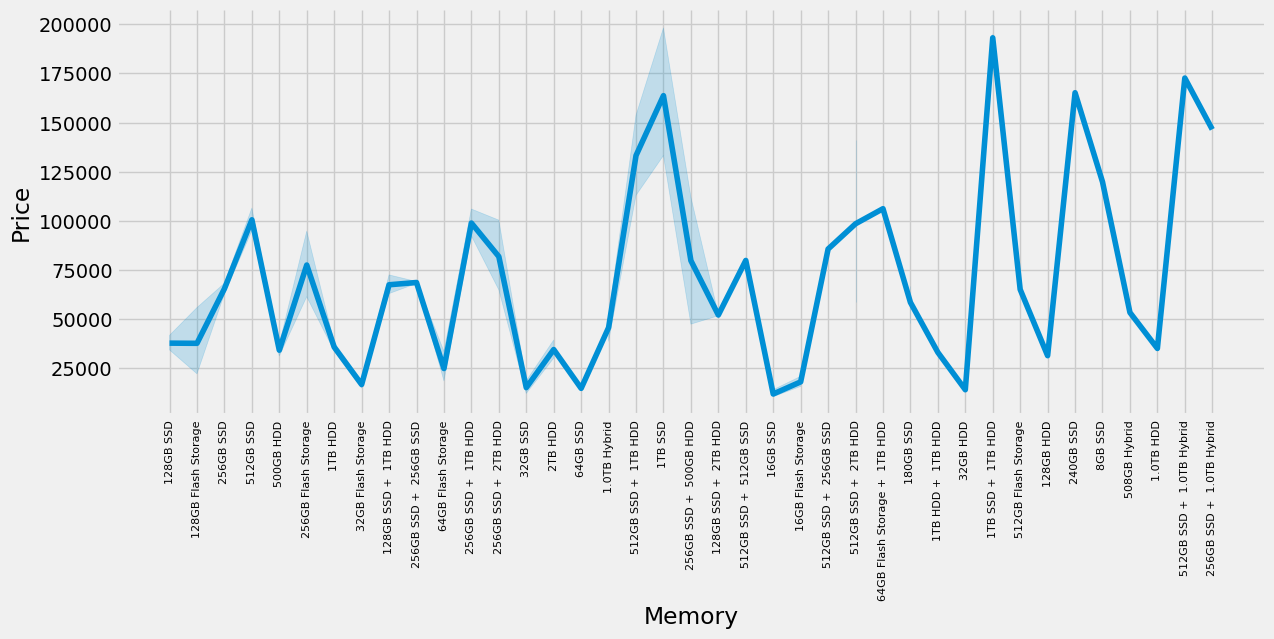

In [ ]:
featureName = 'Memory'
ax = sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
plt.xticks(rotation='vertical', fontsize=8) 
print(round(gpuObj['Price'].mean()).sort_values(ascending=False).head(10))
plt.show()

### Cpu

In [ ]:
cpuObj = df.groupby(by=df['Cpu'])
cpuObj
print(df['Cpu'].value_counts().sort_values(ascending=False).head(10))
print(len(cpuObj))

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      41
Intel Core i7 6700HQ 2.6GHz     41
Intel Core i3 7100U 2.4GHz      35
Name: count, dtype: int64
118


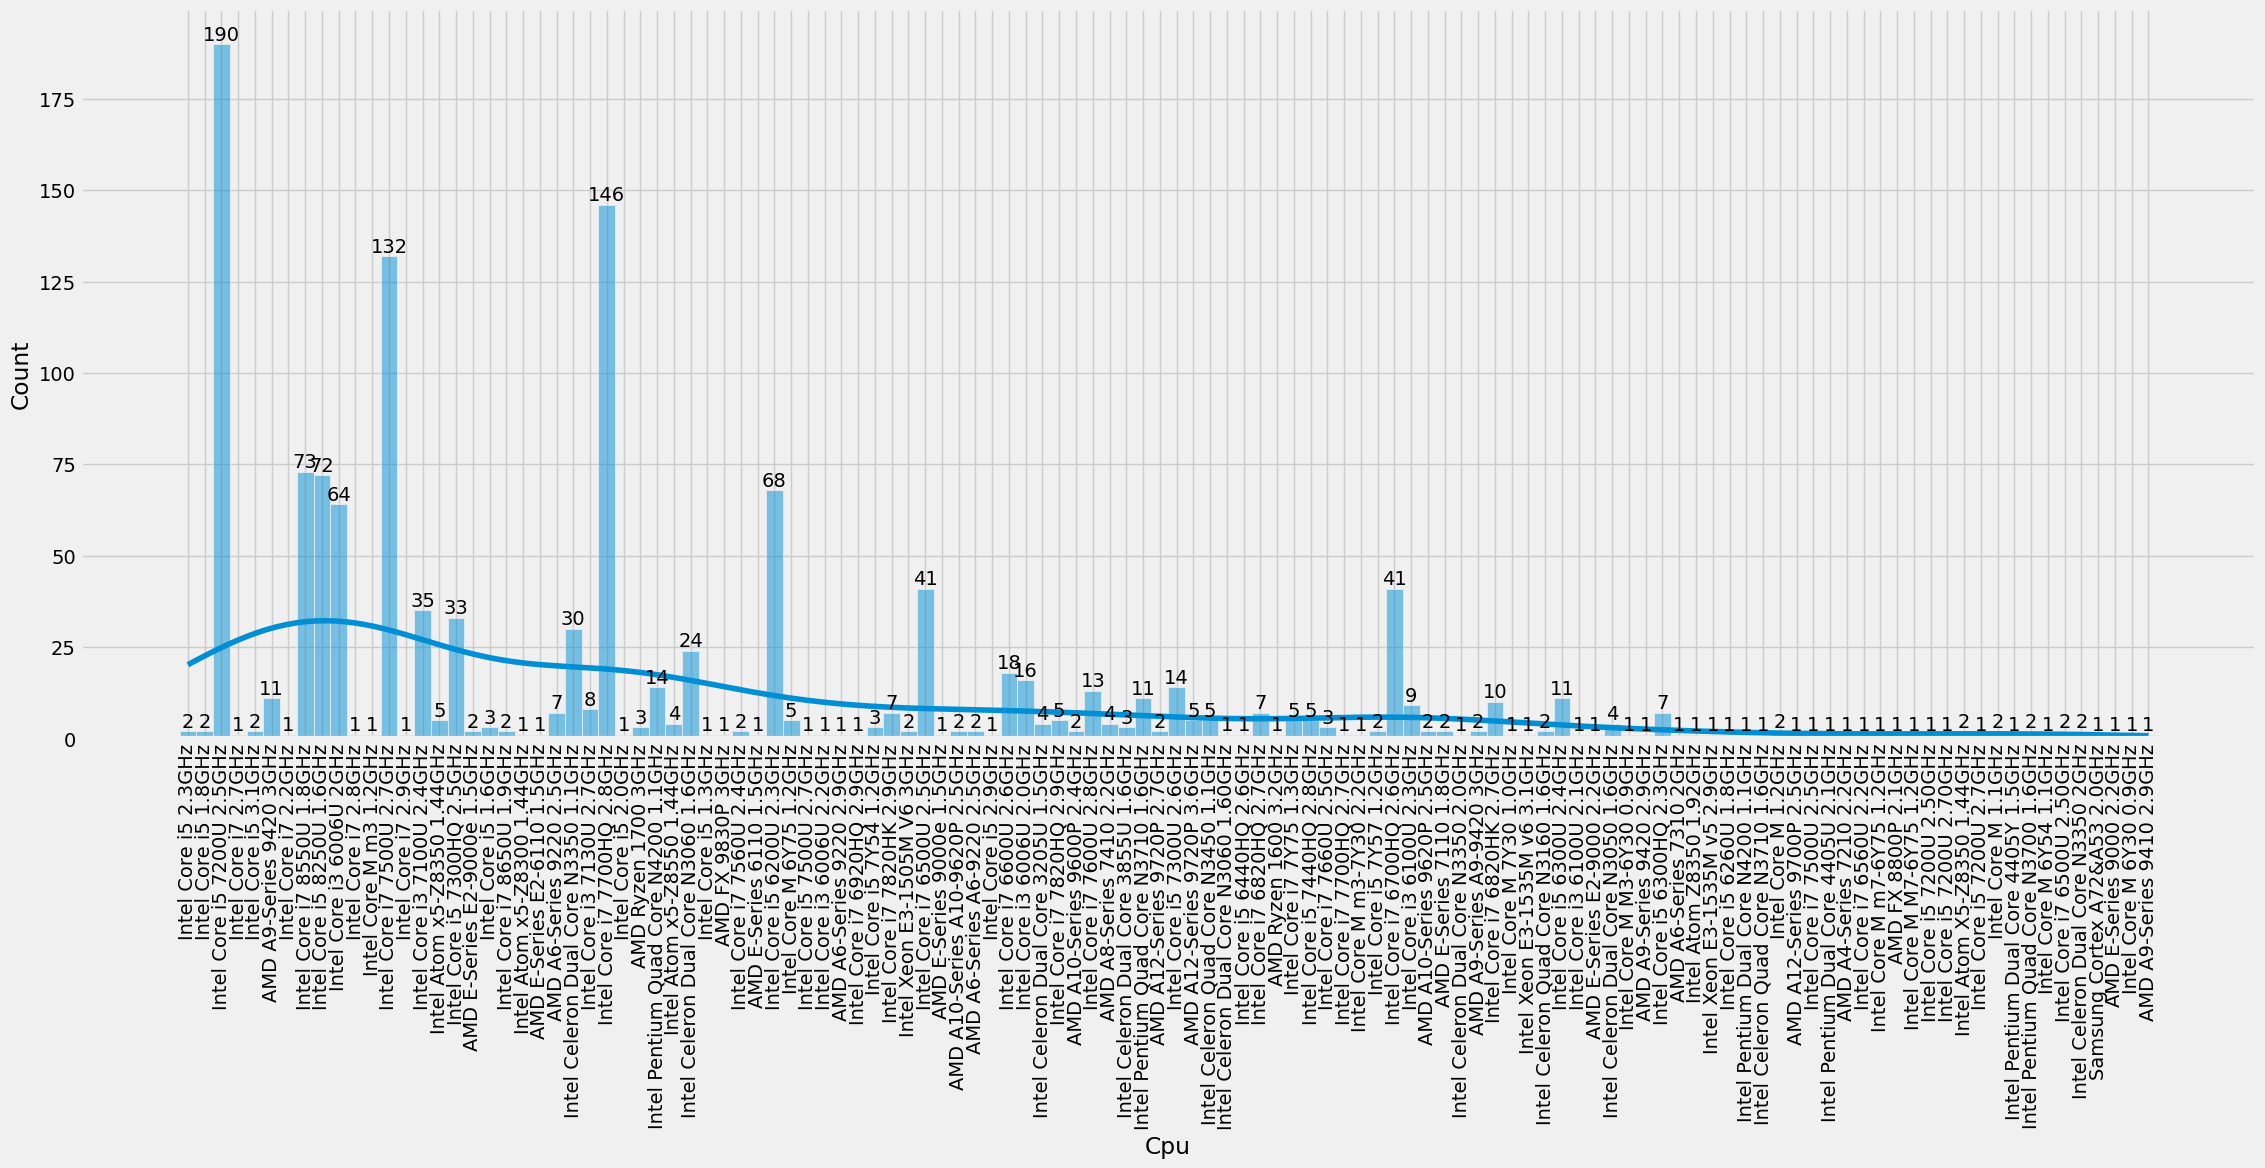

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.histplot(data=df,x='Cpu',kde=True)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

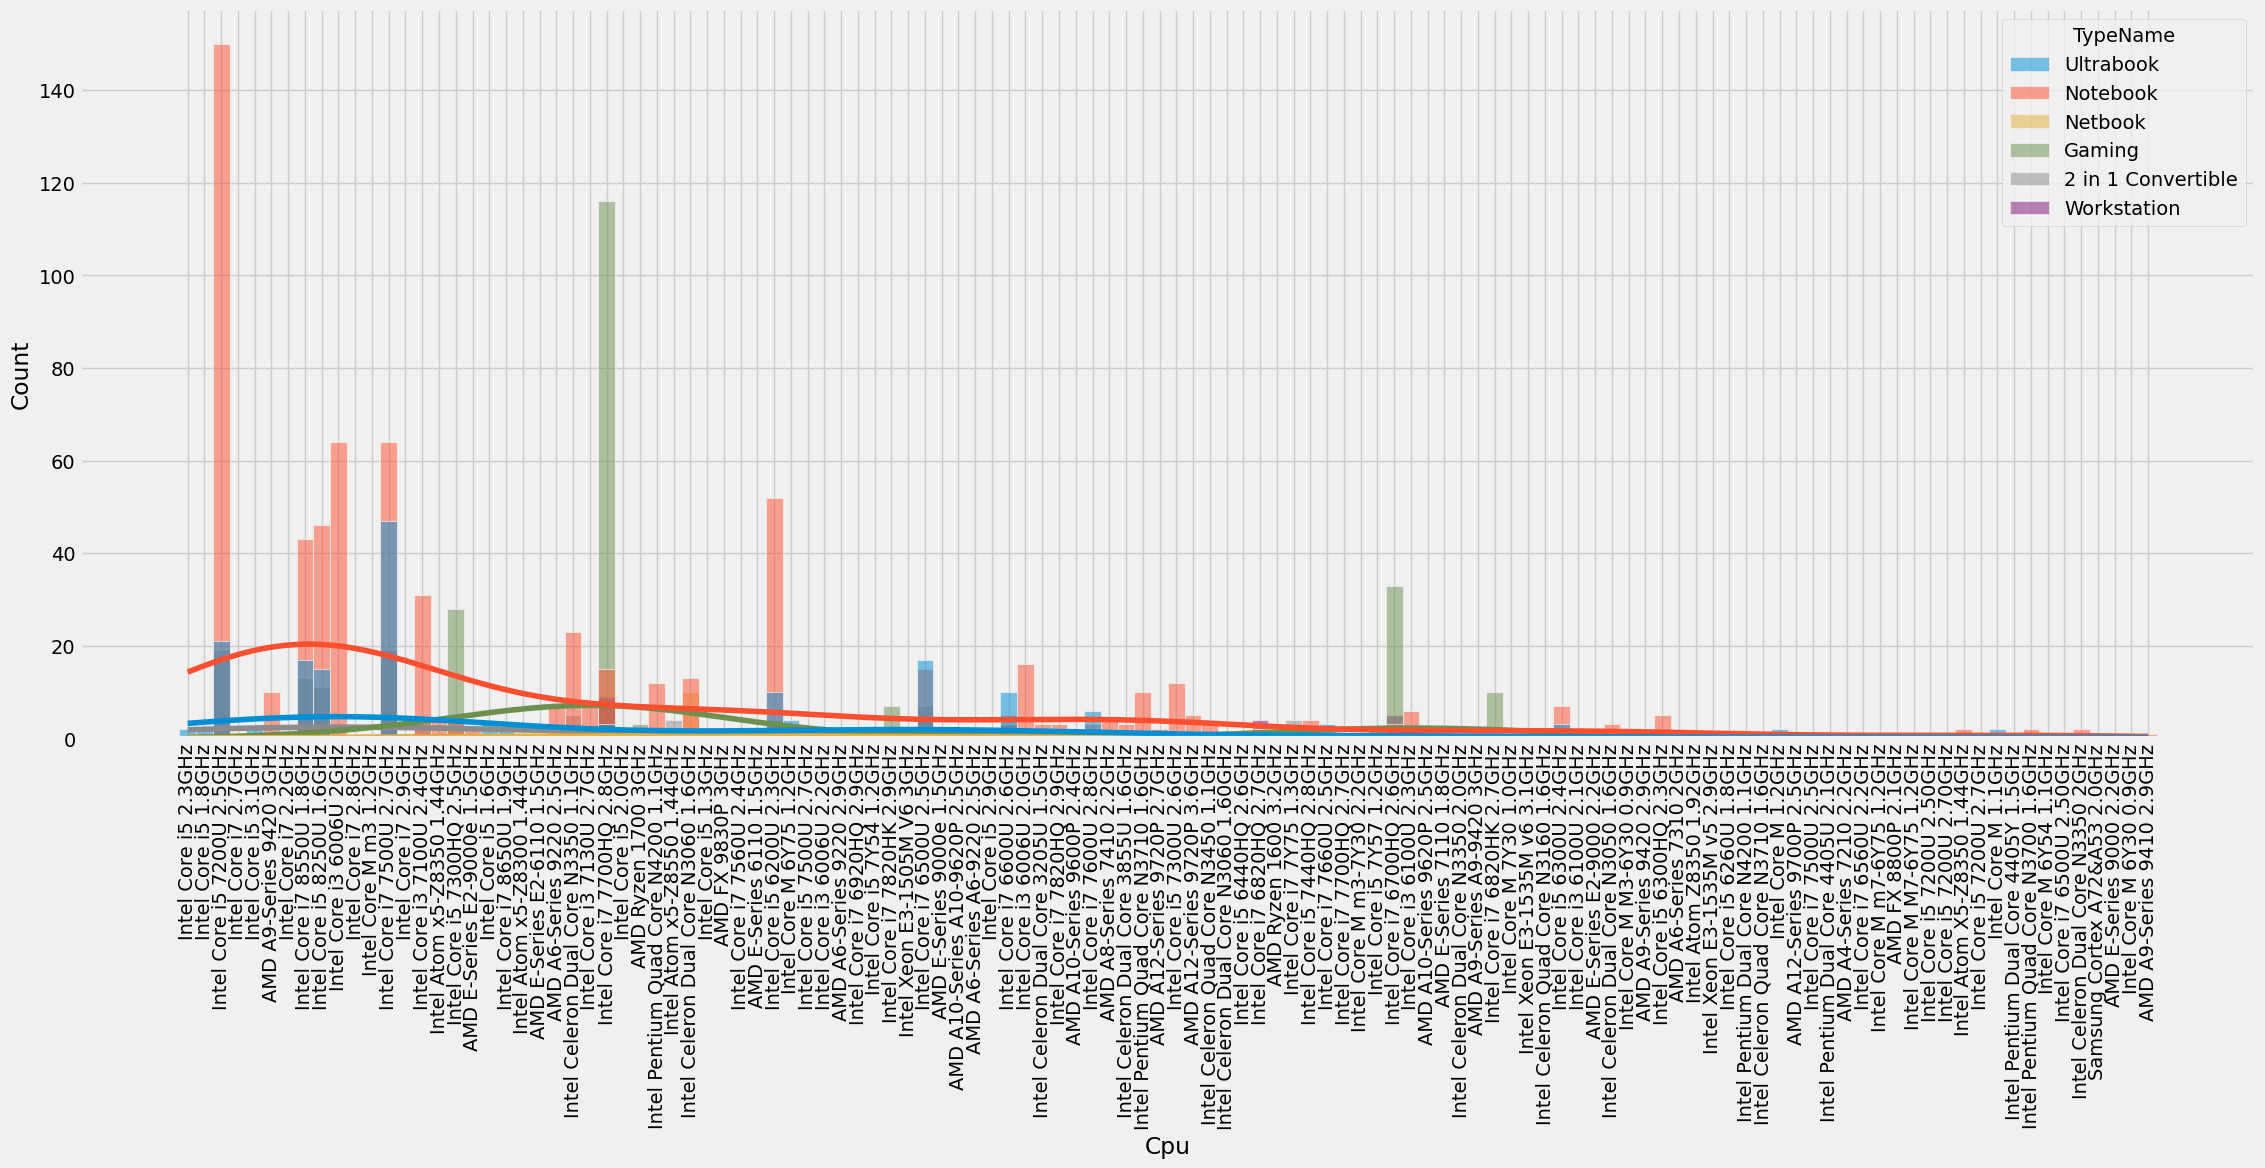

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.histplot(data=df,x='Cpu',kde=True,hue='TypeName')
# for i in ax.containers:
#     ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

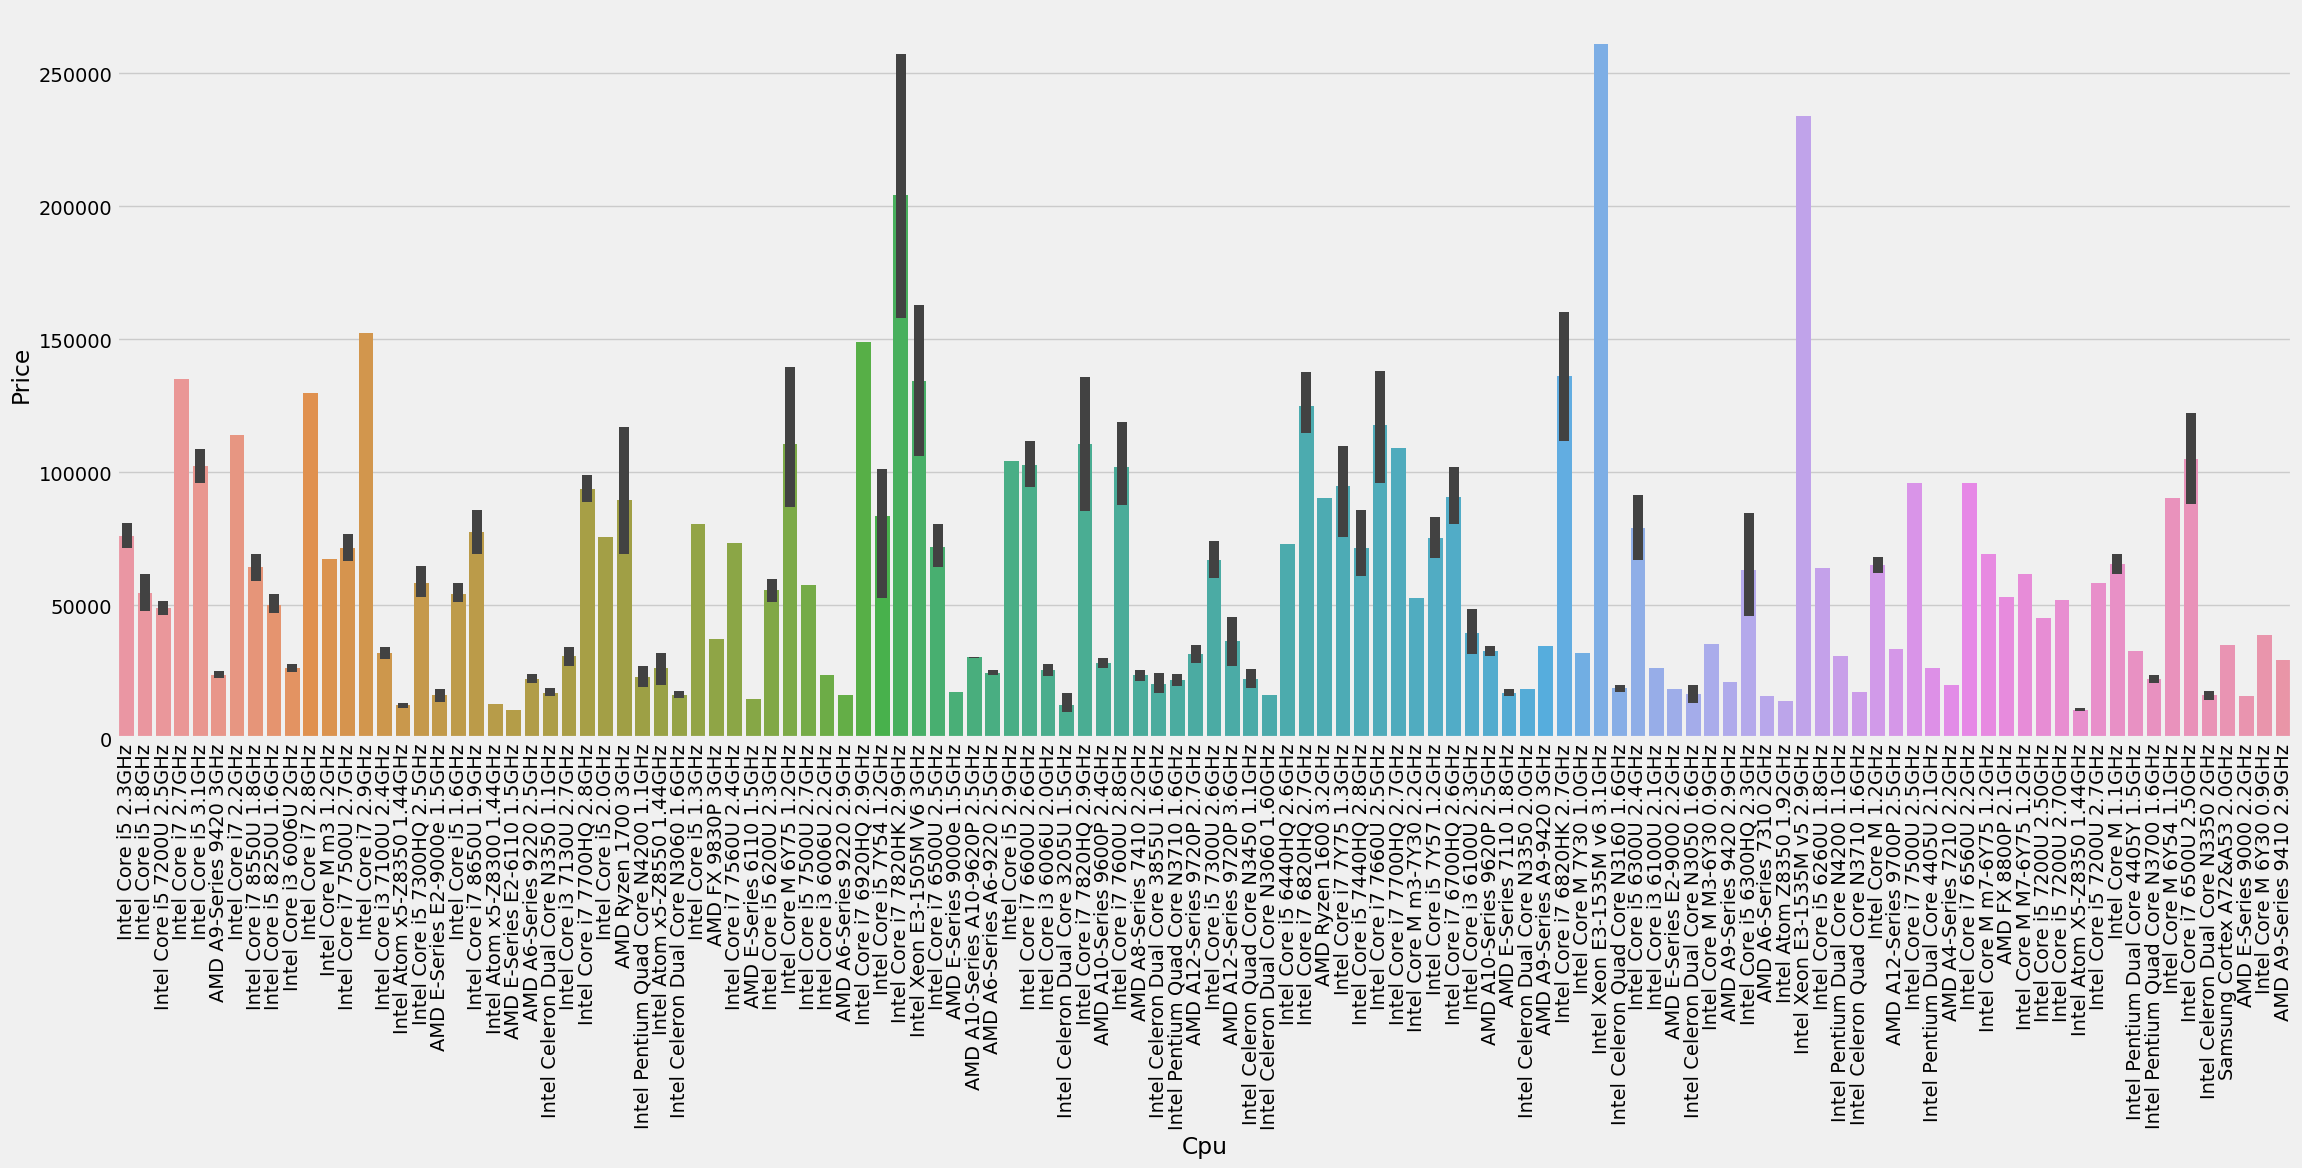

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.barplot(data=df,x=df['Cpu'],y=df['Price'])
# for i in ax.containers:
#     ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

Cpu
Intel Xeon E3-1535M v6 3.1GHz    261019.0
Intel Xeon E3-1535M v5 2.9GHz    233846.0
Intel Core i7 7820HK 2.9GHz      204205.0
Intel Core i7 2.9GHz             152274.0
Intel Core i7 6920HQ 2.9GHz      149131.0
Intel Core i7 6820HK 2.7GHz      136171.0
Intel Core i7 2.7GHz             135195.0
Intel Xeon E3-1505M V6 3GHz      134479.0
Intel Core i7 2.8GHz             130002.0
Intel Core i7 6820HQ 2.7GHz      125086.0
Name: Price, dtype: float64


<Figure size 3000x900 with 0 Axes>

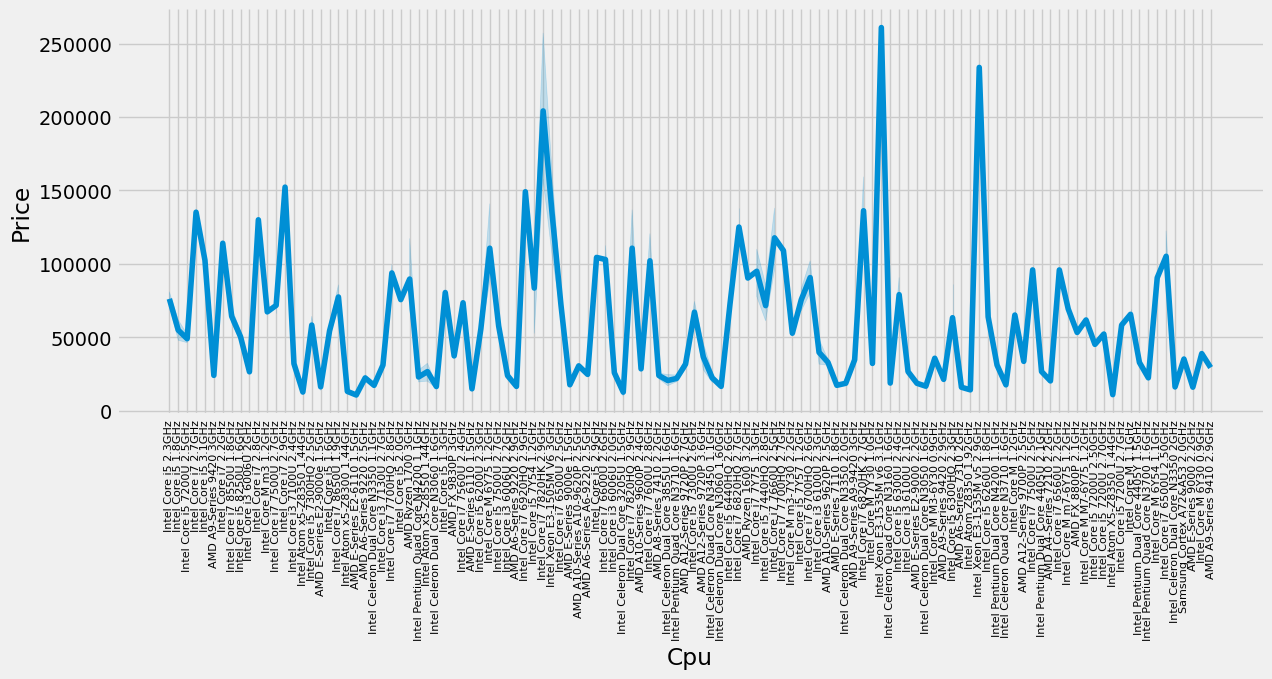

In [ ]:
plt.figure(figsize=(30,9))
featureName = 'Cpu'
ax = sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
plt.xticks(rotation='vertical', fontsize=8) 
print(round(cpuObj['Price'].mean()).sort_values(ascending=False).head(10))
plt.show()

### ScreenResolution

In [ ]:
df['ScreenResolution'].value_counts().sort_values(ascending=False).head(10)

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
Name: count, dtype: int64

In [ ]:
screenResolution = df.groupby(by=df['ScreenResolution'])

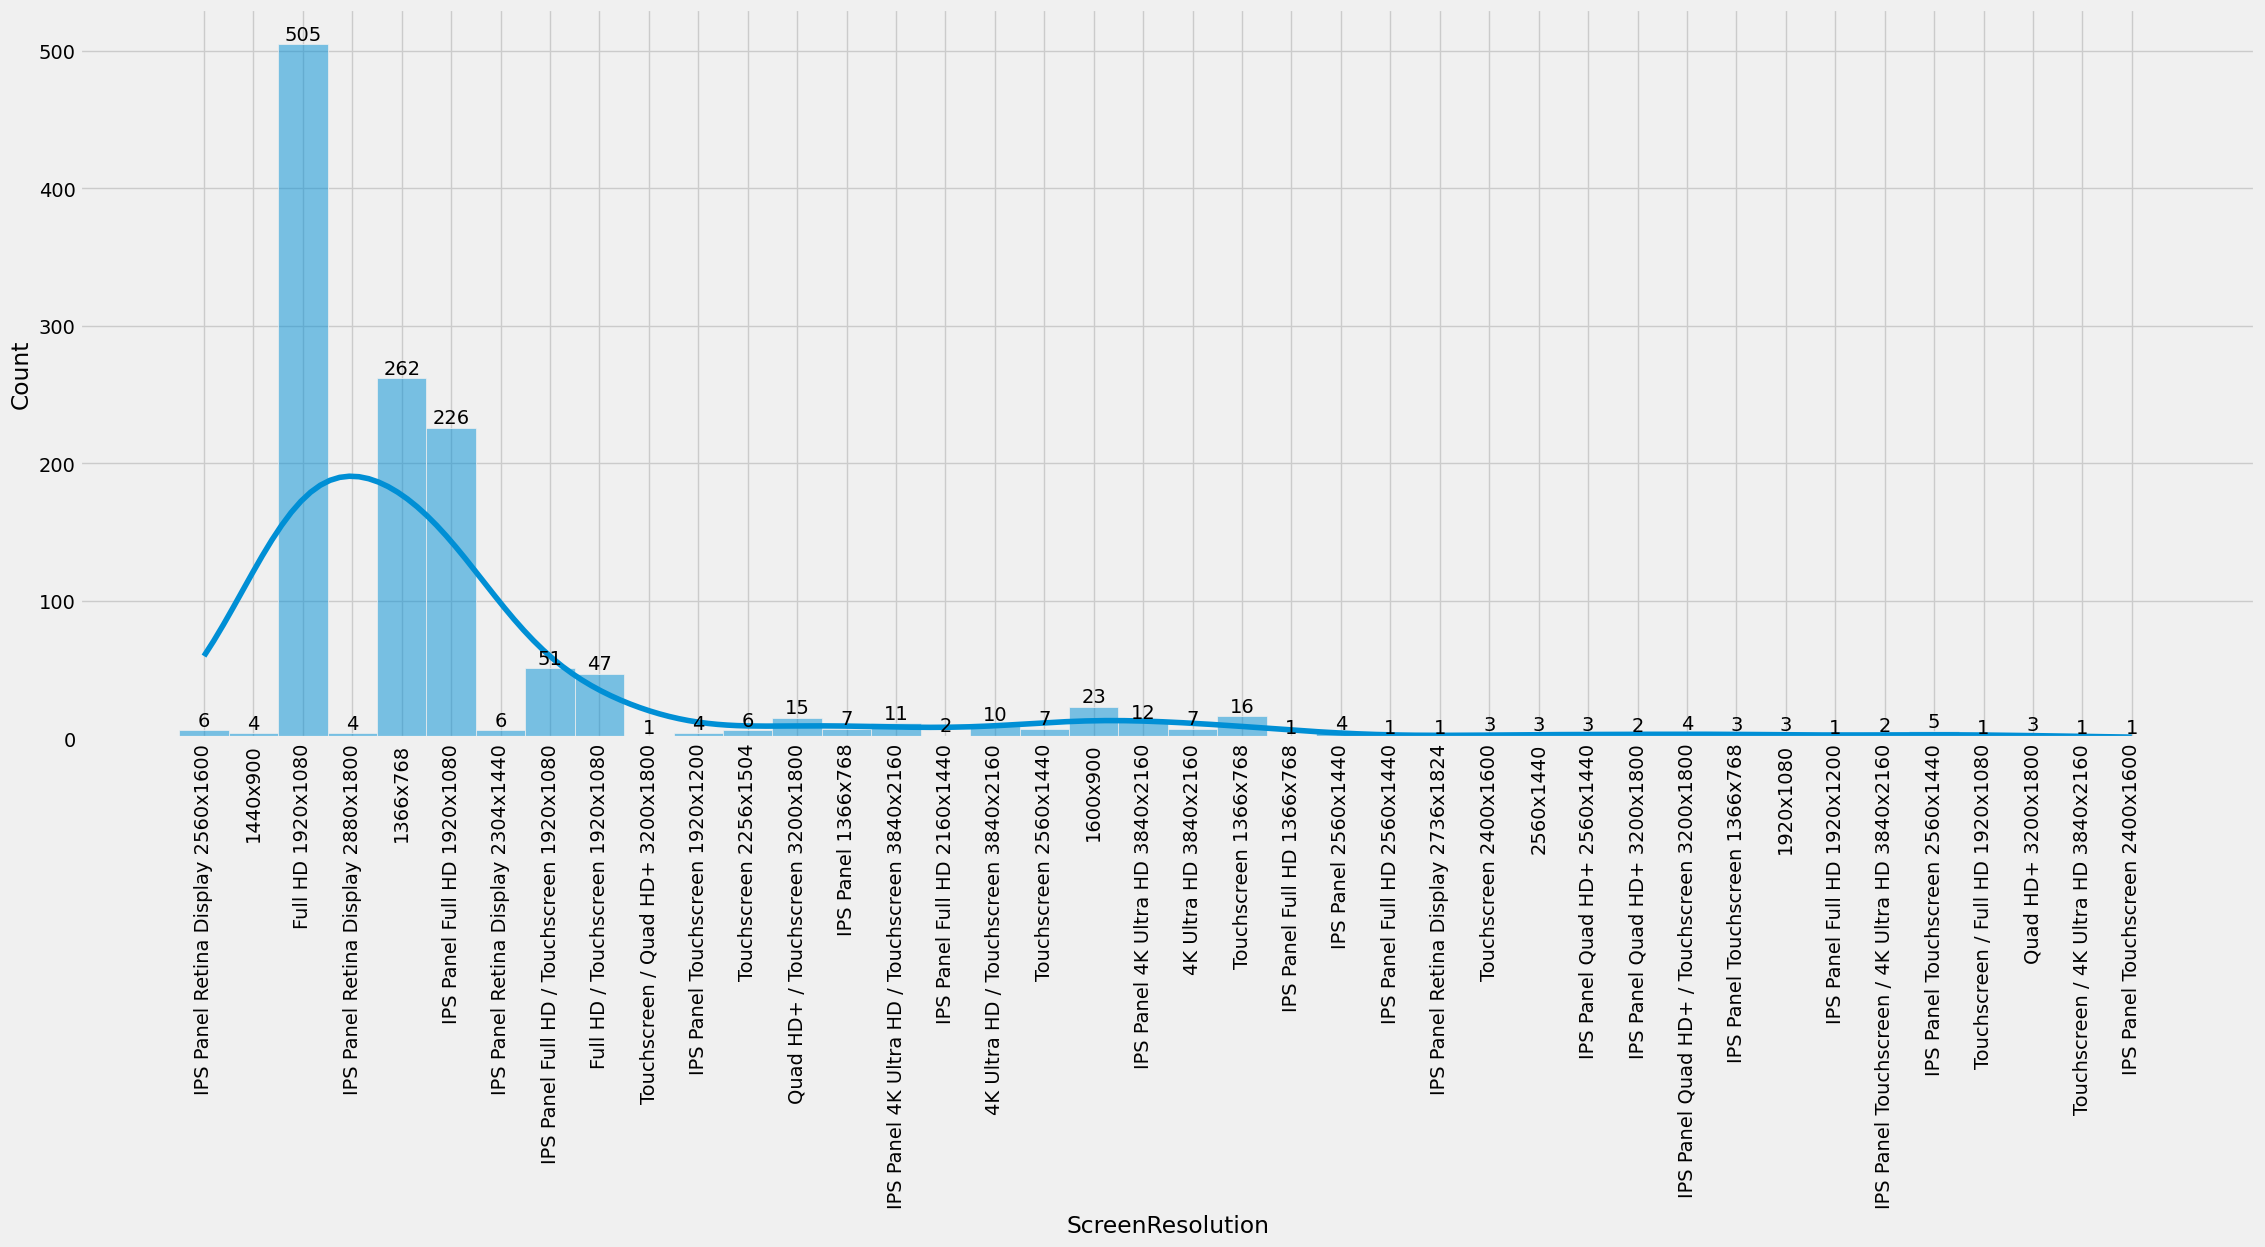

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.histplot(data=df,x='ScreenResolution',kde=True)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

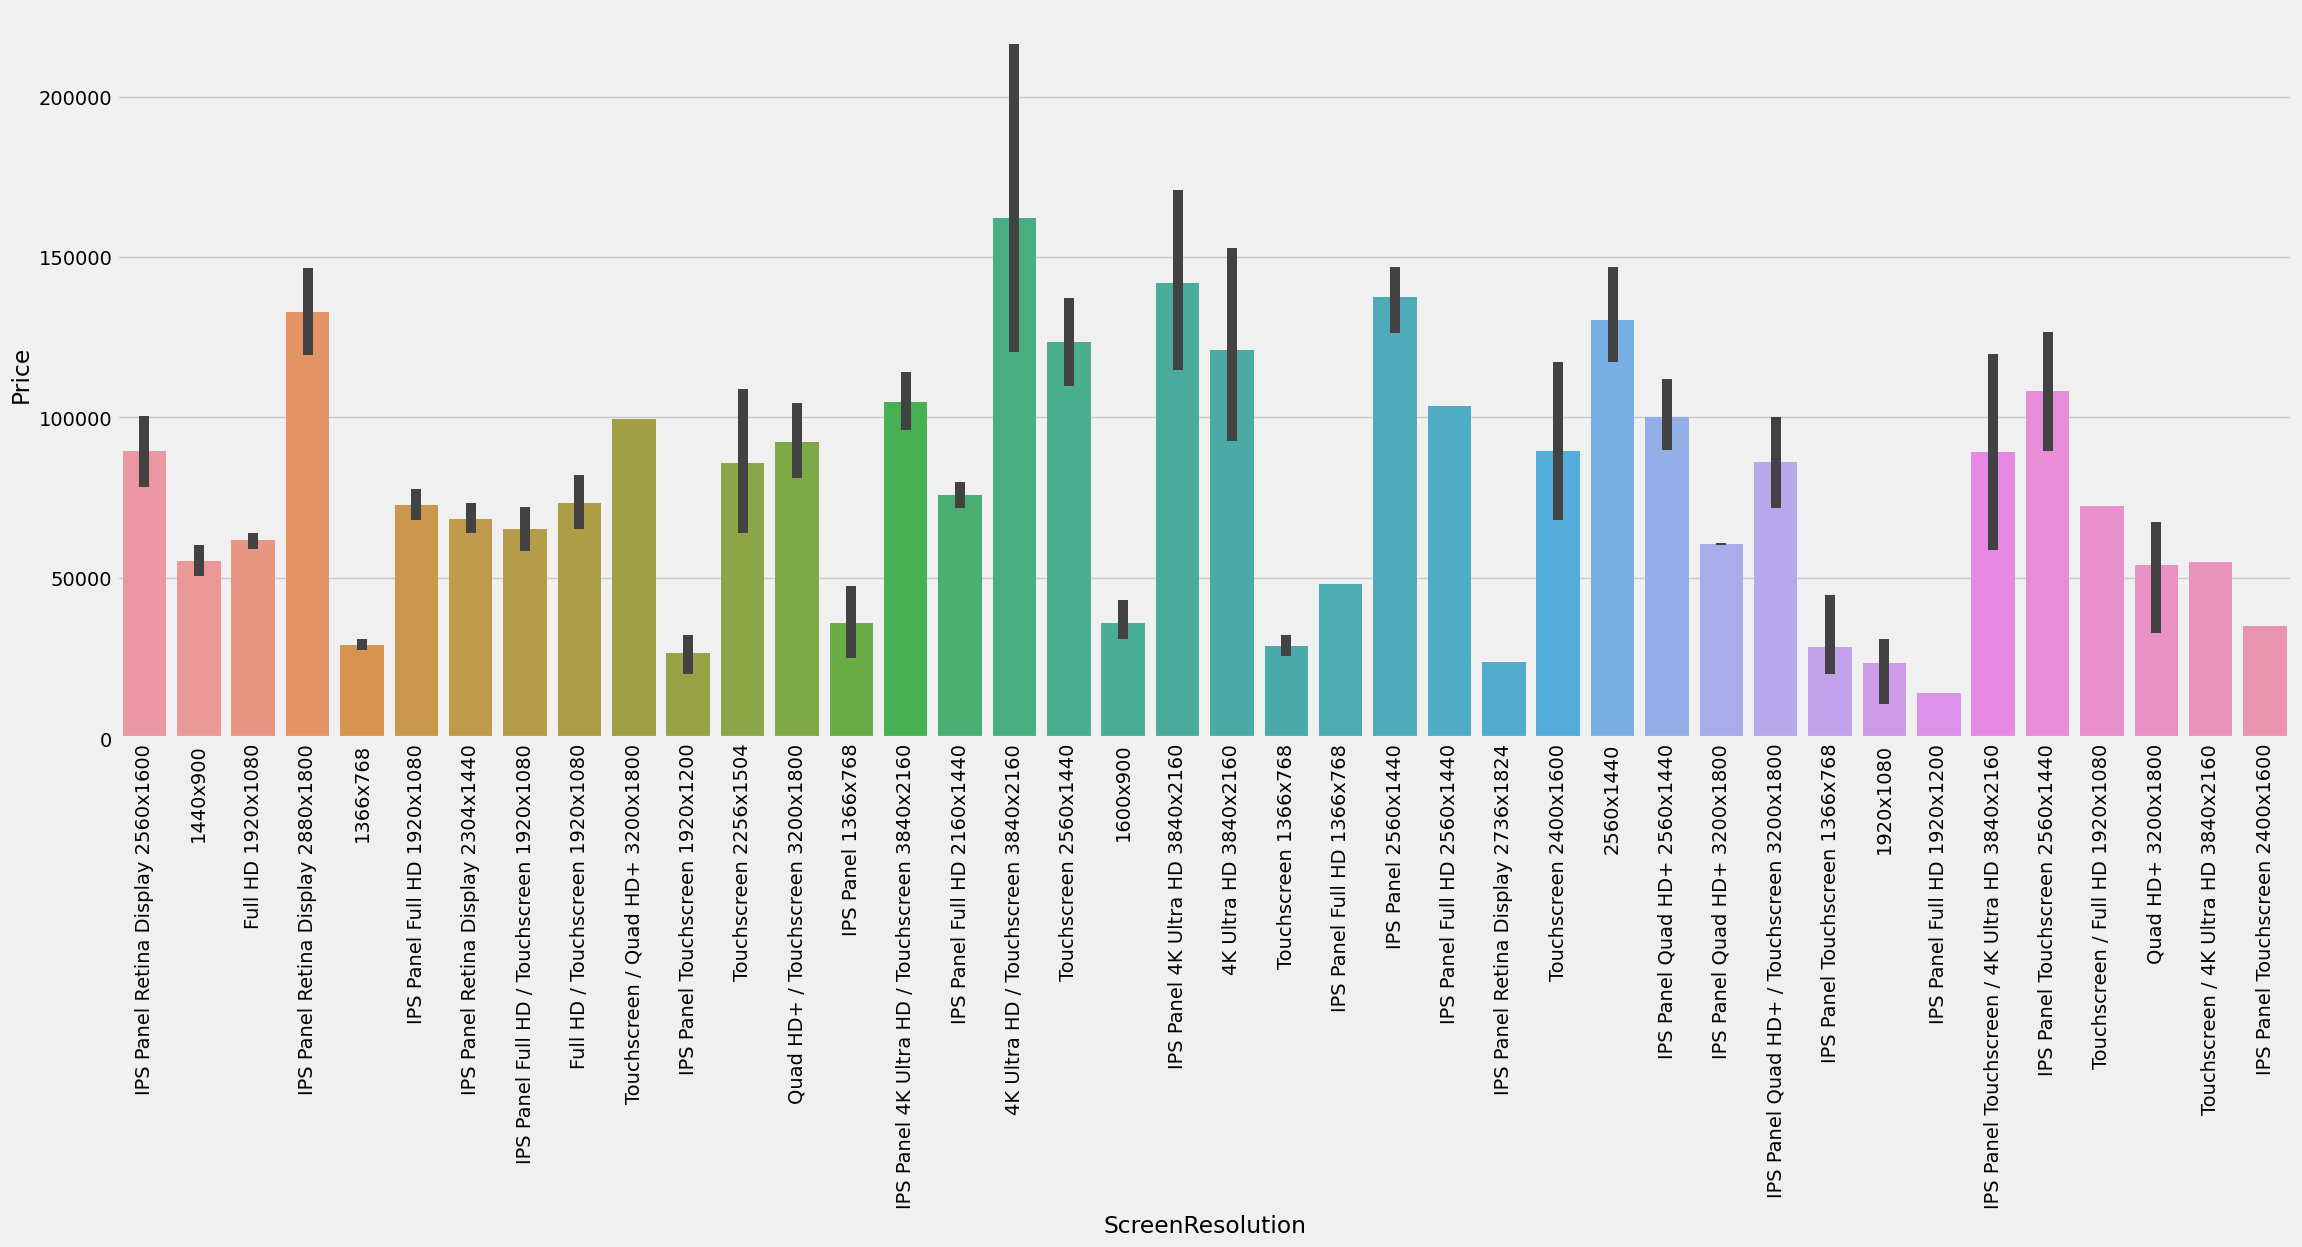

In [ ]:
plt.figure(figsize=(25,9))

ax = sns.barplot(data=df,x=df['ScreenResolution'],y=df['Price'])
# for i in ax.containers:
#     ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

ScreenResolution
4K Ultra HD / Touchscreen 3840x2160              162080.0
IPS Panel 4K Ultra HD 3840x2160                  141735.0
IPS Panel 2560x1440                              137542.0
IPS Panel Retina Display 2880x1800               132872.0
2560x1440                                        130326.0
Touchscreen 2560x1440                            123495.0
4K Ultra HD 3840x2160                            120941.0
IPS Panel Touchscreen 2560x1440                  108105.0
IPS Panel 4K Ultra HD / Touchscreen 3840x2160    104884.0
IPS Panel Full HD 2560x1440                      103523.0
Name: Price, dtype: float64


<Figure size 3000x900 with 0 Axes>

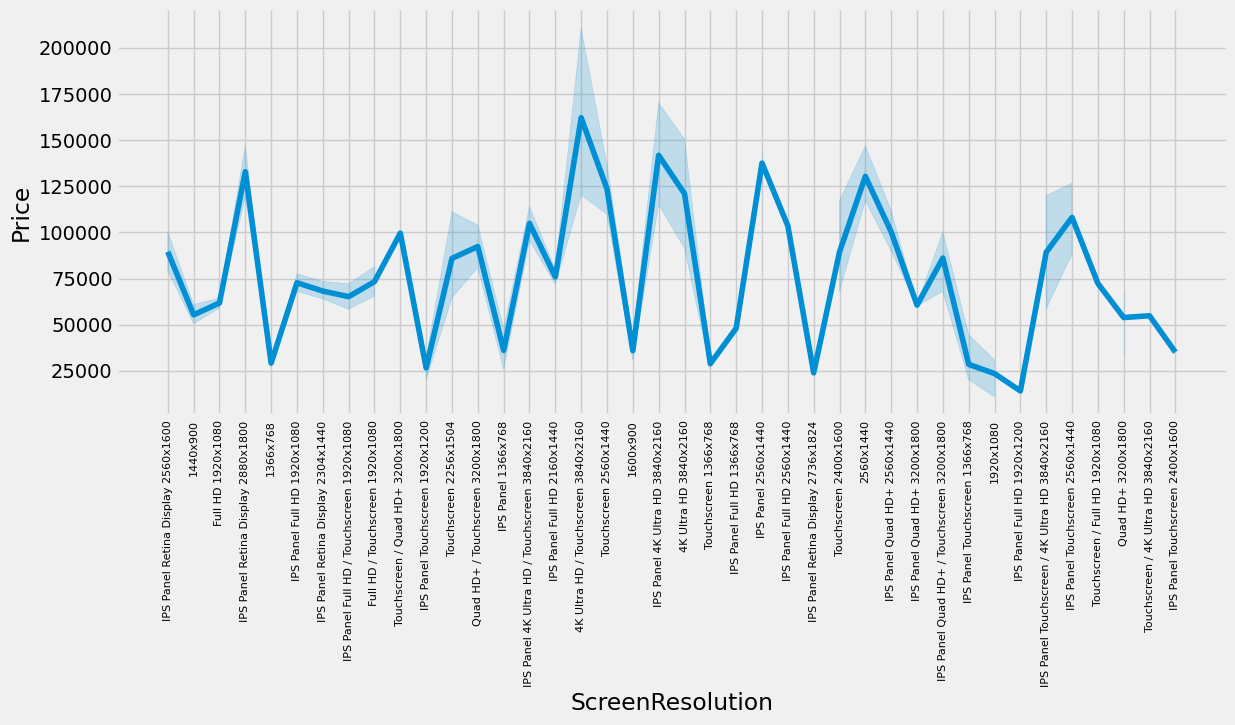

In [ ]:
plt.figure(figsize=(30,9))
featureName = 'ScreenResolution'
ax = sns.relplot(kind='line', data=df, x=featureName, y='Price', aspect=2.75)
plt.xticks(rotation='vertical', fontsize=8) 
print(round(screenResolution['Price'].mean()).sort_values(ascending=False).head(10))
plt.show()

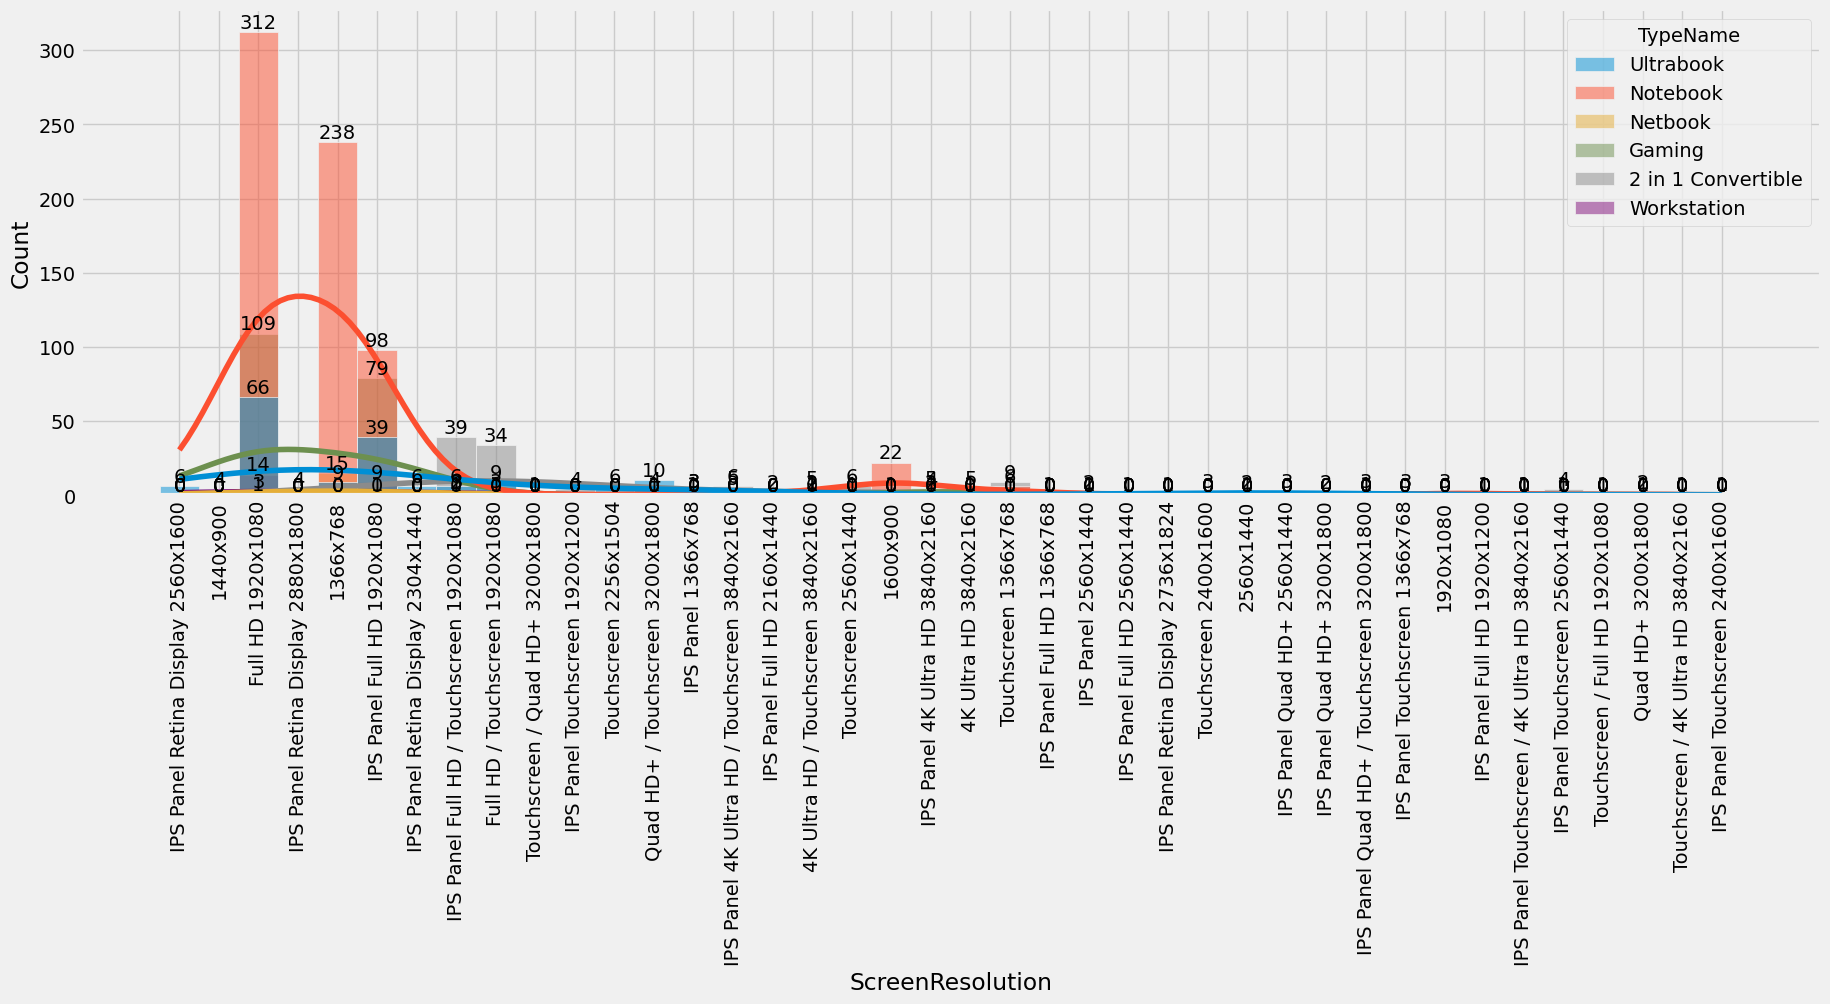

In [ ]:
plt.figure(figsize=(20,6))
plt.style.use('fivethirtyeight')
ax = sns.histplot(data=df,x='ScreenResolution',kde=True,hue='TypeName',color='y')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')

plt.show()

### Correlation

In [ ]:
df[num_cols].corr()

Inches       Ram    Weight     Price
Inches  1.000000  0.241441  0.826634  0.066990
Ram     0.241441  1.000000  0.389658  0.740106
Weight  0.826634  0.389658  1.000000  0.212192
Price   0.066990  0.740106  0.212192  1.000000

<AxesSubplot: >

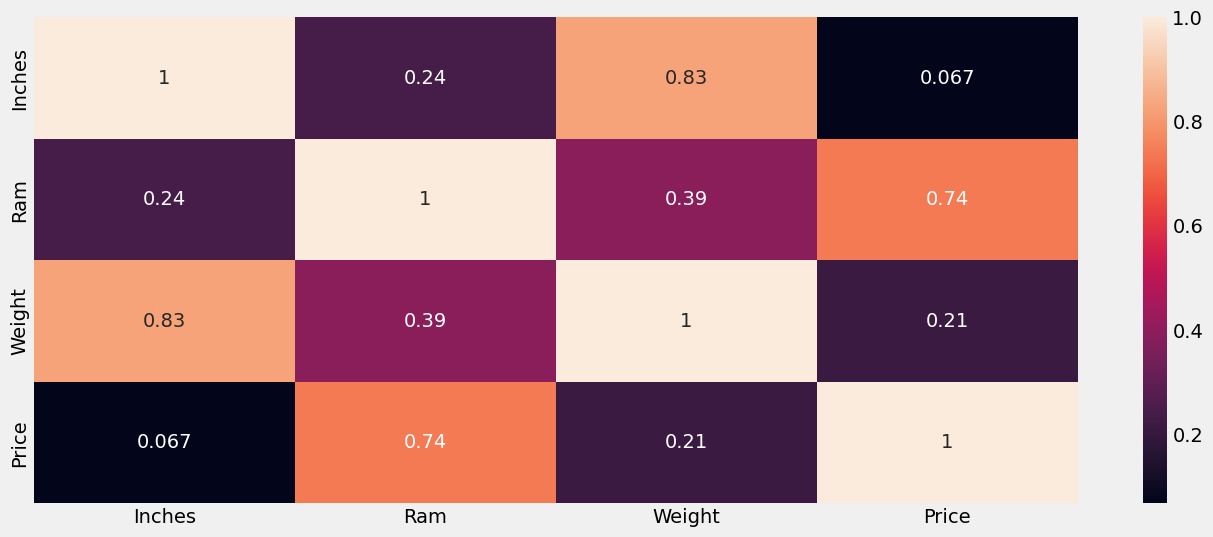

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df[num_cols].corr(),annot=True)

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu  Ram               Memory   
0                     Intel Core i5 2.3GHz    8            128GB SSD  \
1                     Intel Core i5 1.8GHz    8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3                     Intel Core i7 2.7GHz   16            512GB SSD   
4                     Intel Core i5 3.1GHz    8            256GB SSD   
...                                    ...  ...                  ...   
1269            Intel Core i7 6500U 2.5GHz    4            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz    4            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz   16            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz    2   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz    6              1TB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS    1.37   71378.6832  
1           Intel HD Graphics 6000       macOS    1.34   47895.5232  
2            Intel HD Graphics 620       No OS    1.86   30636.0000  
3               AMD Radeon Pro 455       macOS    1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS    1.37   96095.8080  
...                            ...         ...     ...          ...  
1269           Nvidia GeForce 920M  Windows 10    2.20   38378.6496  
1270         Intel HD Graphics 520  Windows 10    1.80   33992.6400  
1271         Intel HD Graphics 520  Windows 10    1.30   79866.7200  
1272             Intel HD Graphics  Windows 10    1.50   12201.1200  
1273            AMD Radeon R5 M330  Windows 10    2.19   40705.9200  

[1274 rows x 11 columns]

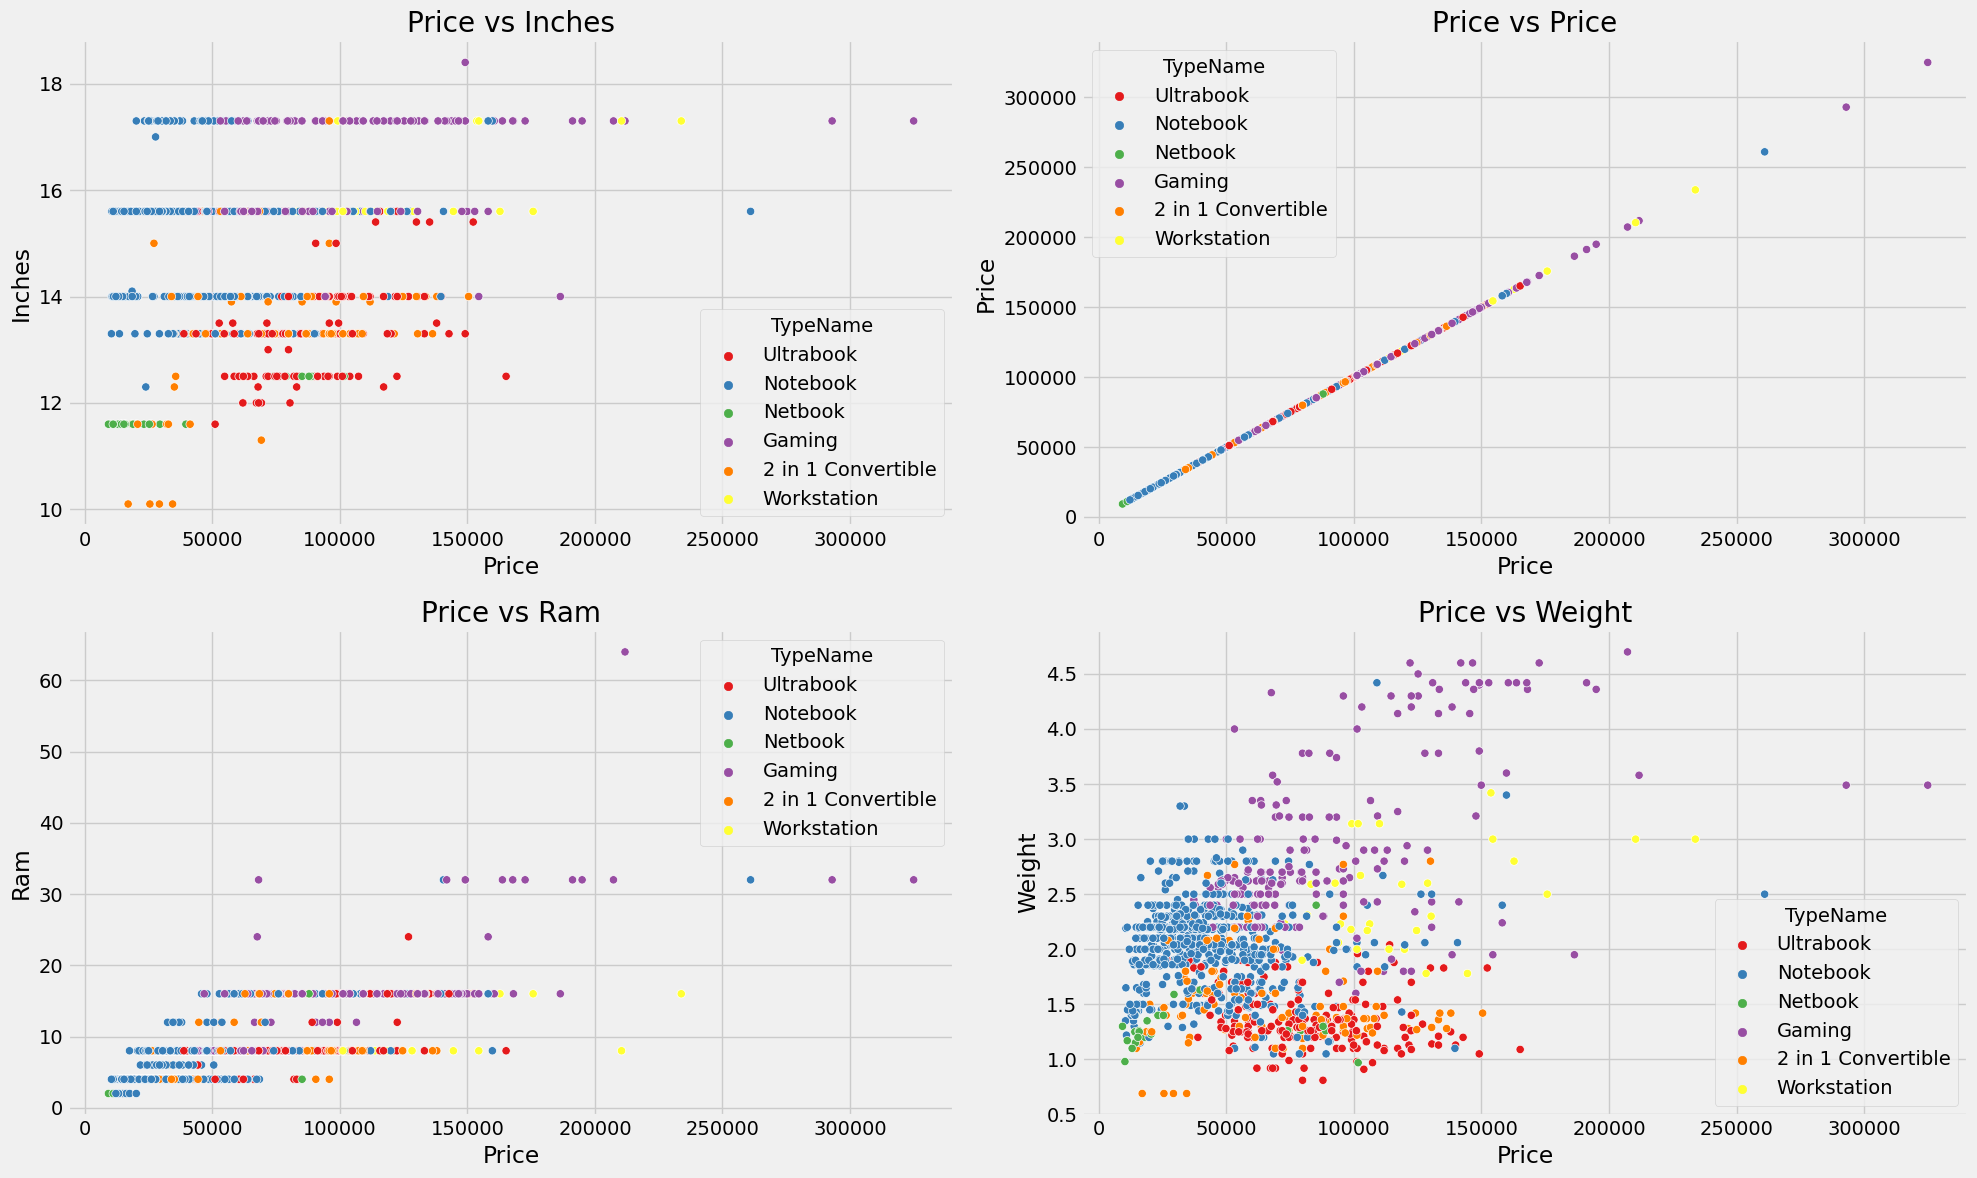

In [ ]:
plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

plt.subplot(2, 2, 1)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Inches', hue=df['TypeName'], palette='Set1')
plt.title('Price vs Inches')

plt.subplot(2, 2, 2)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Price', hue=df['TypeName'], palette='Set1')
plt.title('Price vs Price')

plt.subplot(2, 2, 3)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Ram', hue=df['TypeName'], palette='Set1')
plt.title('Price vs Ram')

plt.subplot(2, 2, 4)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Weight', hue=df['TypeName'], palette='Set1')
plt.title('Price vs Weight')

plt.tight_layout()
plt.show()


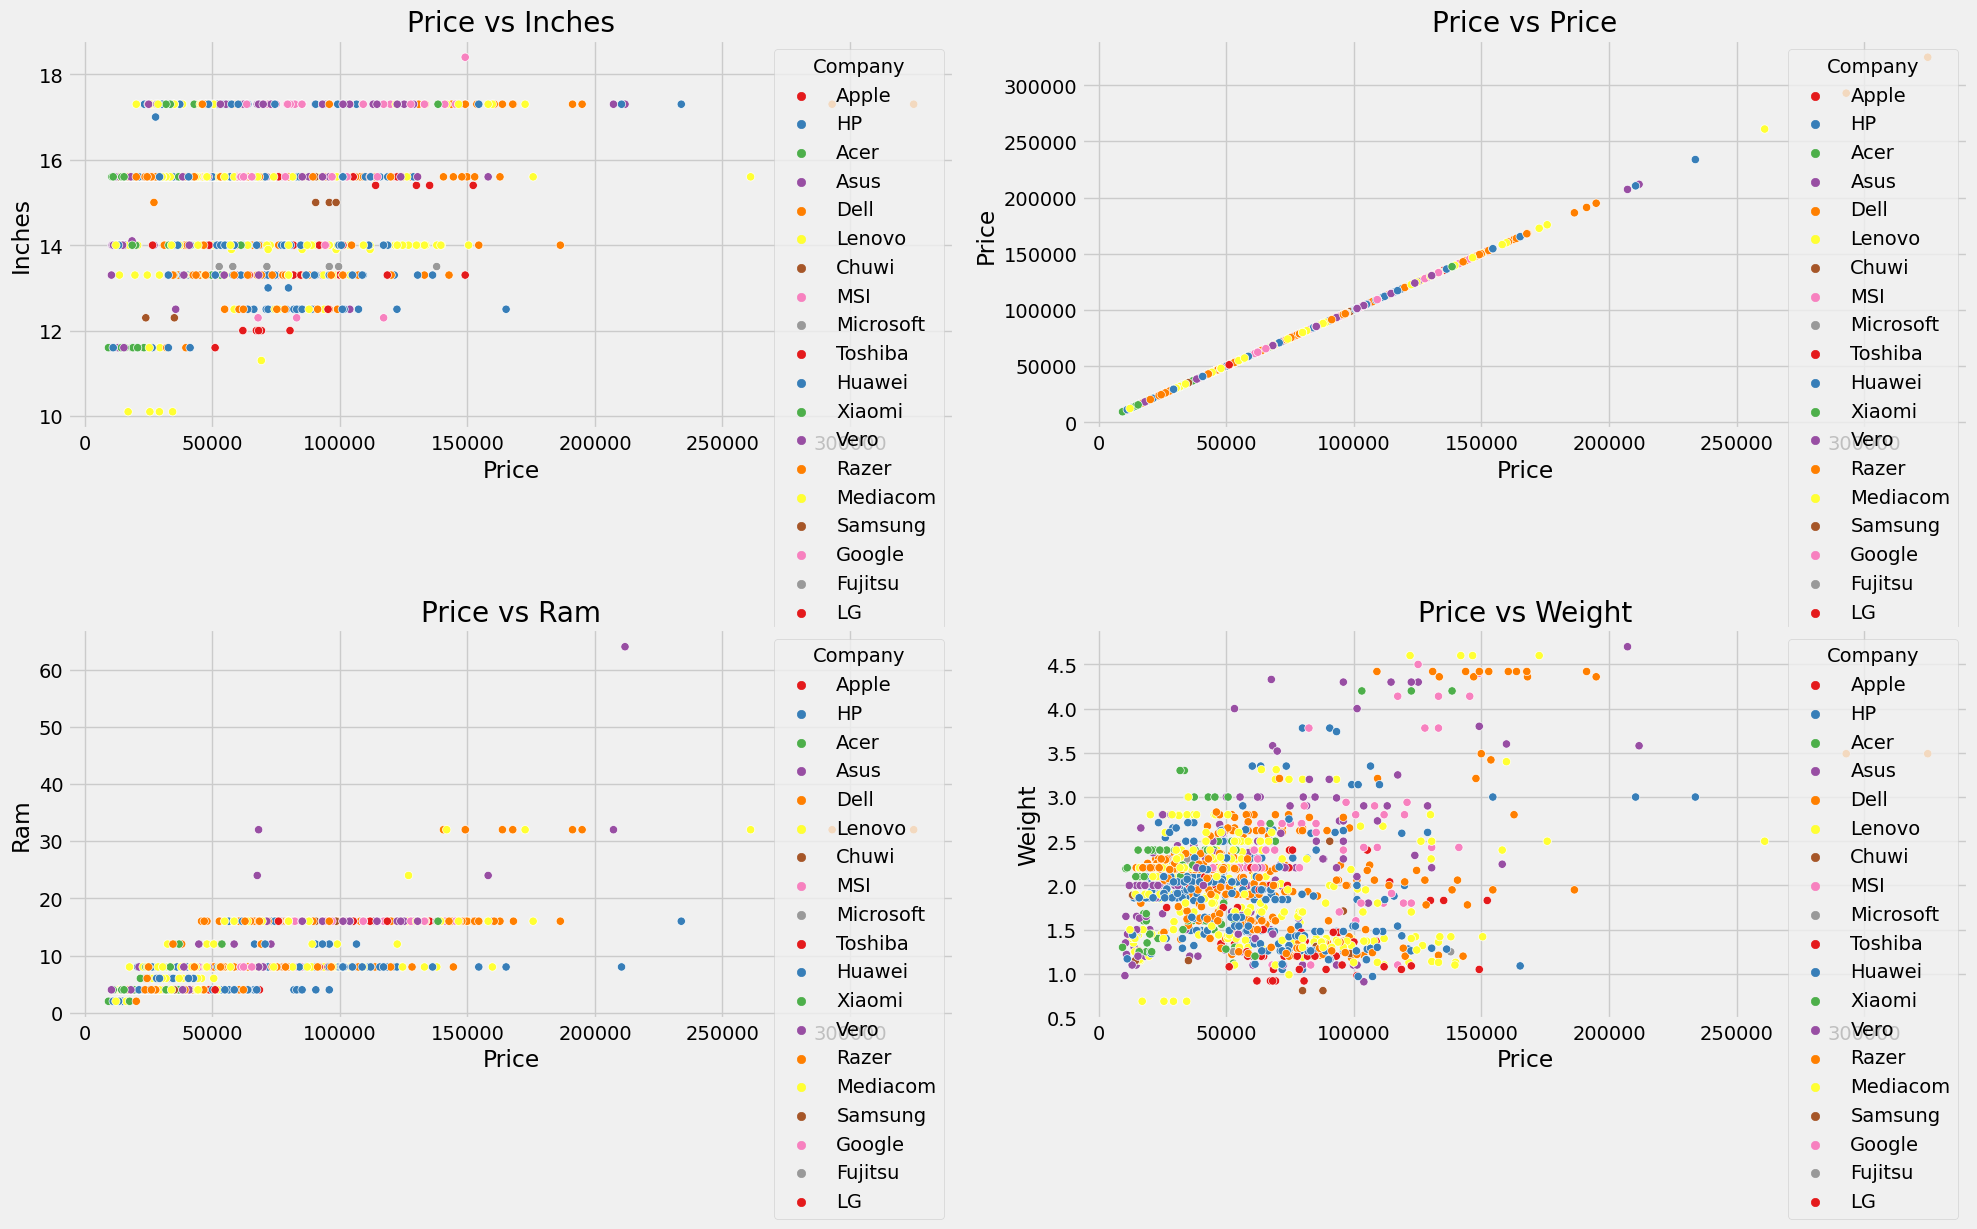

In [ ]:


plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

plt.subplot(2, 2, 1)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Inches', hue=df['Company'], palette='Set1')
plt.title('Price vs Inches')

plt.subplot(2, 2, 2)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Price', hue=df['Company'], palette='Set1')
plt.title('Price vs Price')

plt.subplot(2, 2, 3)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Ram', hue=df['Company'], palette='Set1')
plt.title('Price vs Ram')

plt.subplot(2, 2, 4)
ax = sns.scatterplot(data=df[num_cols], x='Price', y='Weight', hue=df['Company'], palette='Set1')
plt.title('Price vs Weight')

plt.tight_layout()
plt.show()


## Reading New df

In [ ]:
df = pd.read_csv(filepath_or_buffer='data/laptop_data_cleaned.csv')
df

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips   
0      Apple           Ultrabook    8    1.37  11.175755            0    1  \
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1     127.677940          Intel Core i5     0    0     Intel      Mac  
2     141.211998          Intel Core i5     0  256     Intel   Others  
3     220.534624          Intel Core i7     0  512       AMD      Mac  
4     226.983005          Intel Core i5     0  256     Intel      Mac  
...          ...                    ...   ...  ...       ...      ...  
1268  100.454670          Intel Core i7   500    0    Nvidia  Windows  
1269  157.350512          Intel Core i7     0  128     Intel  Windows  
1270  276.053530          Intel Core i7     0  512     Intel  Windows  
1271  111.935204  Other Intel Processor     0    0     Intel  Windows  
1272  100.454670          Intel Core i7  1000    0       AMD  Windows  

[1273 rows x 13 columns]

## TouchScreen 

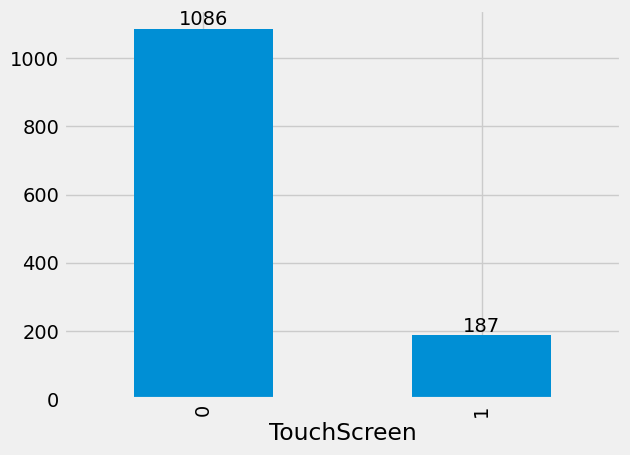

In [ ]:
ax = df['TouchScreen'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

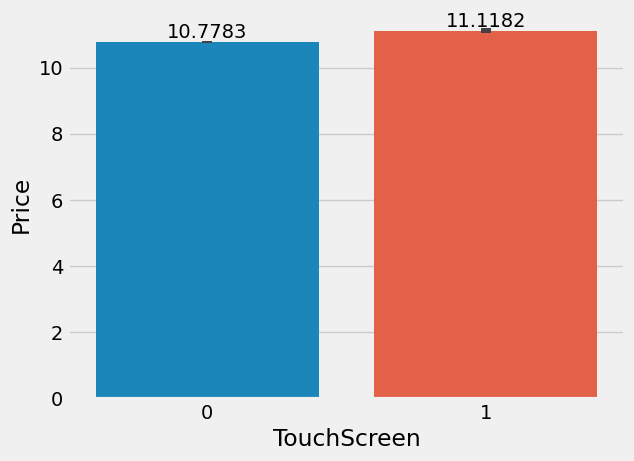

In [ ]:
ax = sns.barplot(data=df,y=df['Price'],x=df['TouchScreen'])
for i in ax.containers:
    ax.bar_label(i)

## IPS Column


In [ ]:
df['Ips'].value_counts()

Ips
0    917
1    356
Name: count, dtype: int64

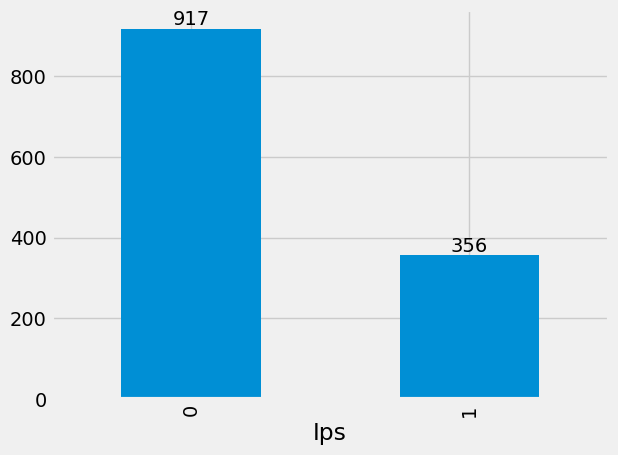

In [ ]:
ax = df['Ips'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

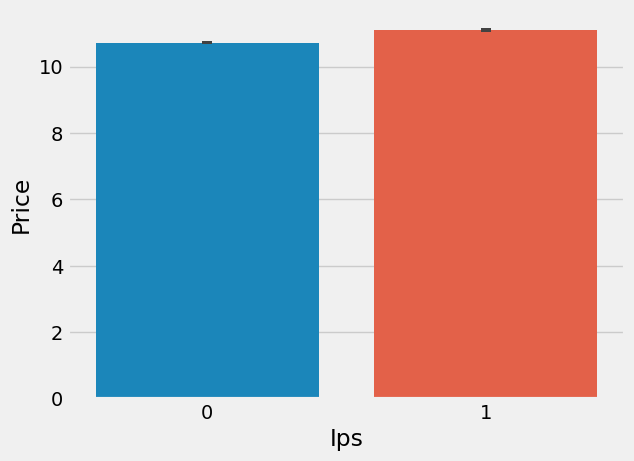

In [ ]:
ax = sns.barplot(data=df,y=df['Price'],x=df['Ips'])
# for i in ax.containers:
#     ax.bar_label(i)

## Cpu Brand

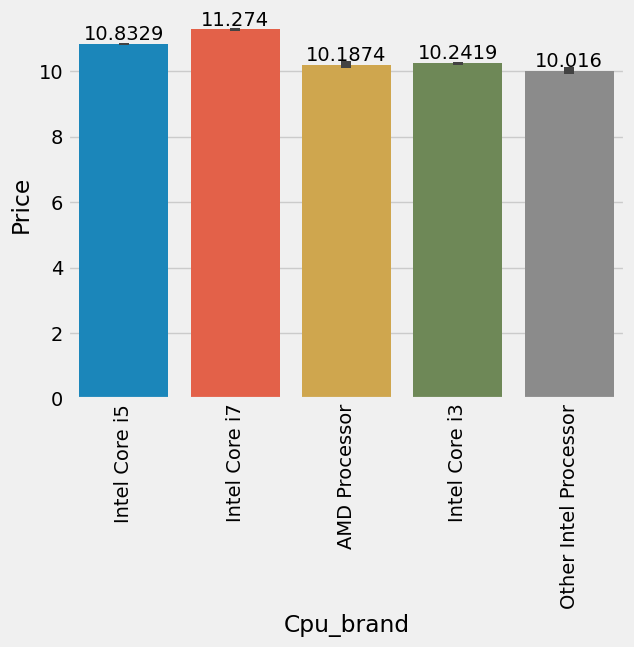

In [ ]:
ax = sns.barplot(x=df['Cpu_brand'],y=df['Price'],estimator='mean')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')
plt.show()

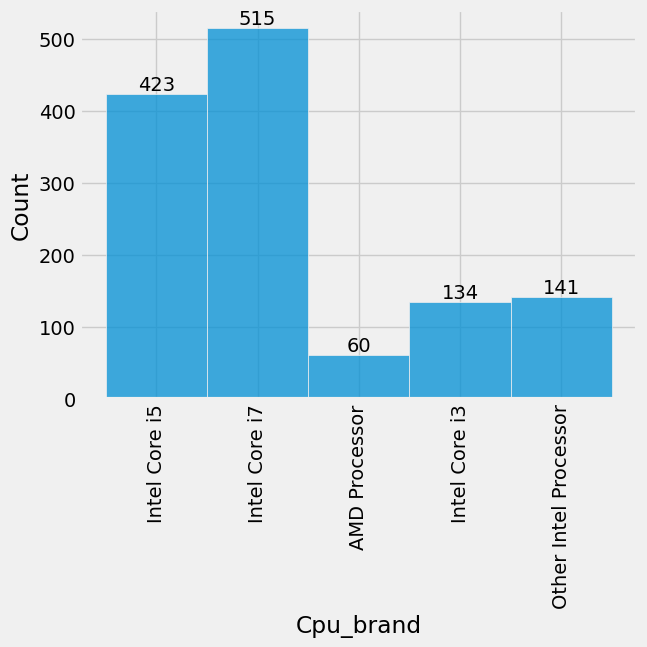

In [ ]:
ax = sns.histplot(x=df['Cpu_brand'])
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')
plt.show()

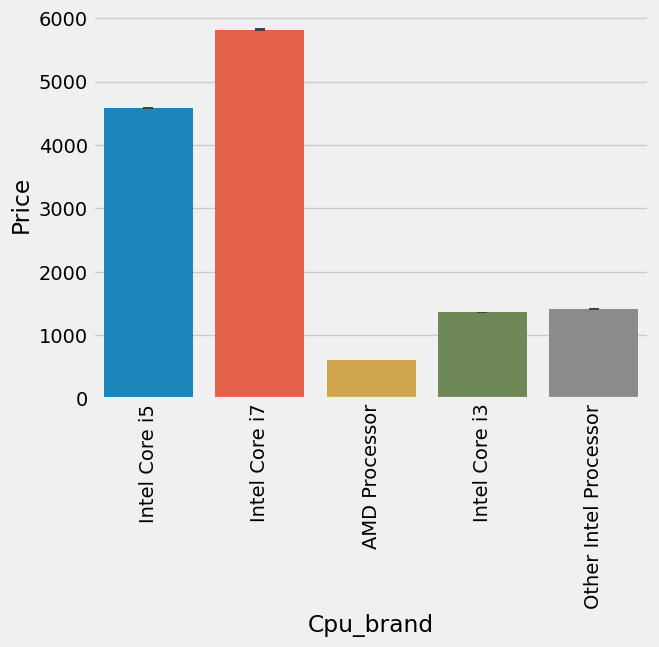

In [ ]:
ax = sns.barplot(x=df['Cpu_brand'],y=round(df['Price']),estimator='sum')
# for i in ax.containers:
#     ax.bar_label(i)
plt.xticks(rotation = 'vertical')
plt.show()

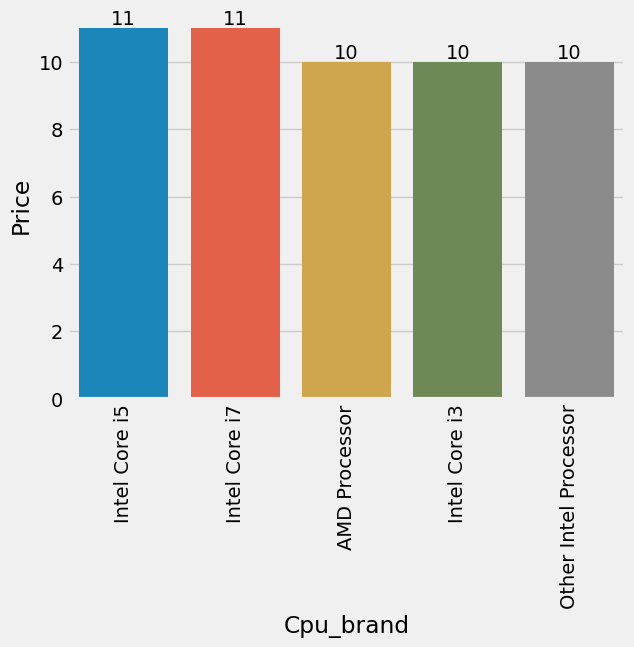

In [ ]:
ax = sns.barplot(x=df['Cpu_brand'],y=round(df['Price']),estimator=np.median)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']

<AxesSubplot: >

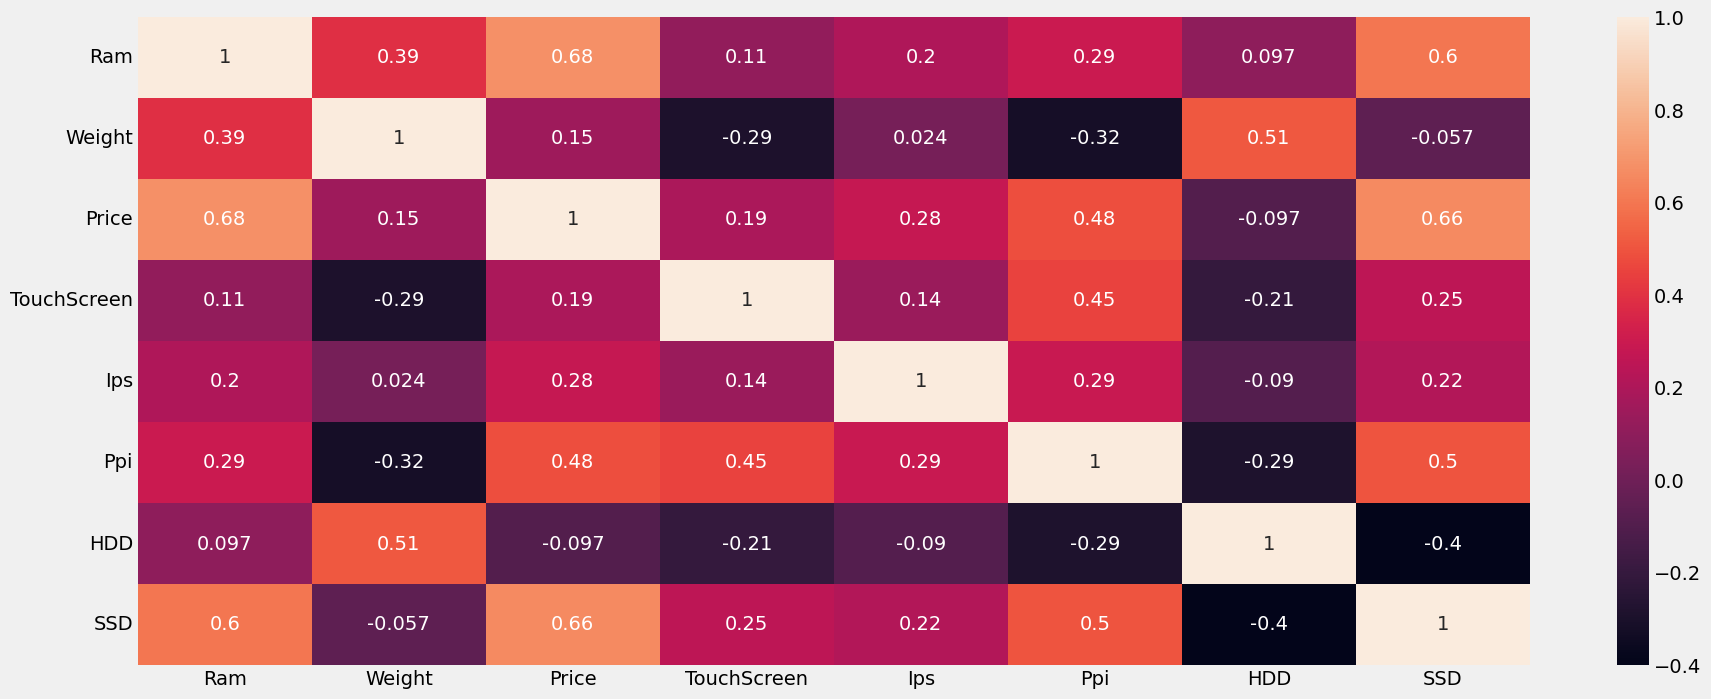

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(data=df[num_cols].corr(),annot=True)

<AxesSubplot: >

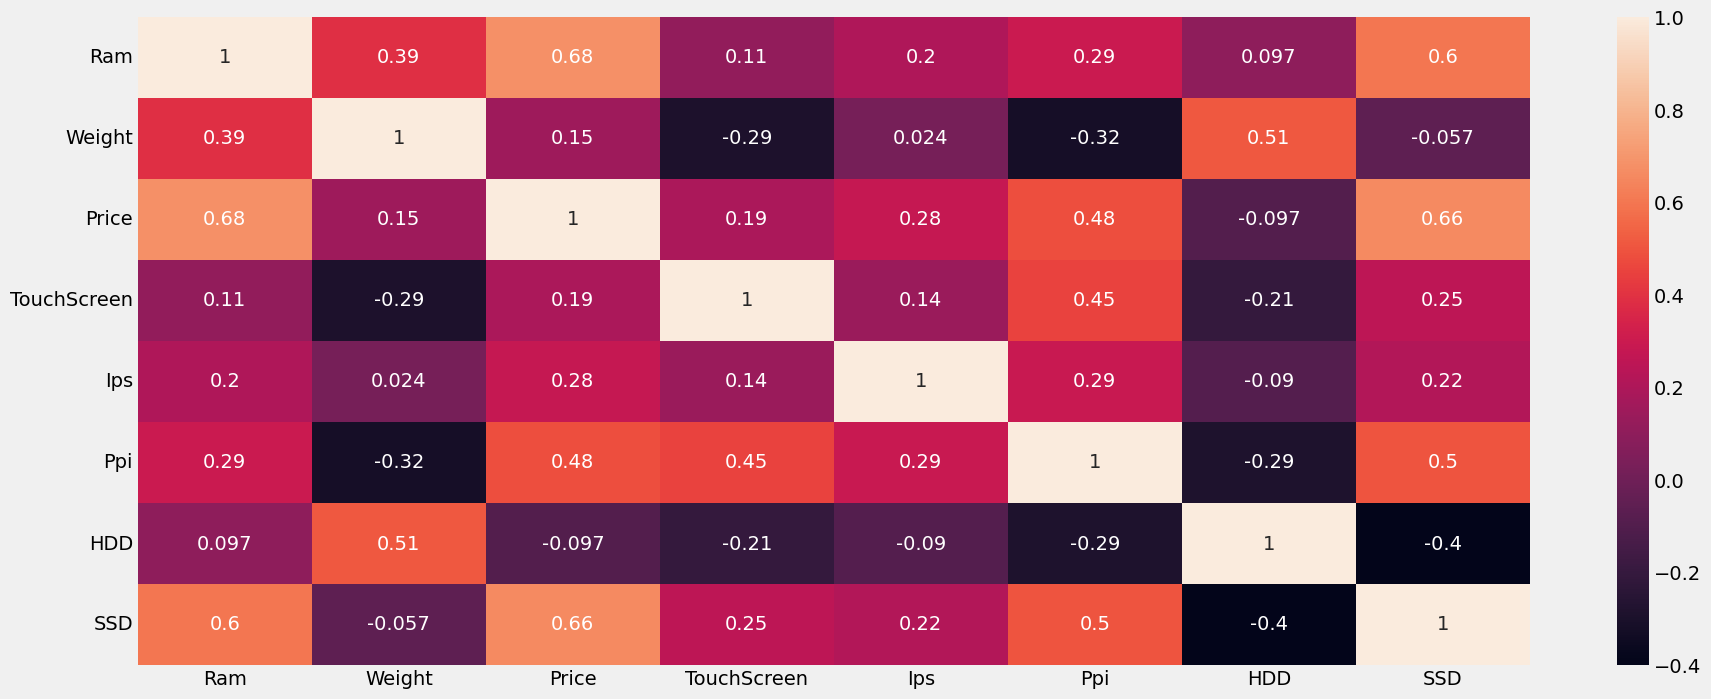

In [ ]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']
plt.figure(figsize = (20,8))
sns.heatmap(data=df[num_cols].corr(),annot=True)

# Feature Engeenering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/laptop_data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496  
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  

[1274 rows x 11 columns]

## Extracting touchscreen from screen resolution

In [ ]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1269                                      1366x768
1270     IPS Panel Full HD / Touchscreen 1920x1080
1271    IPS Panel Quad HD+ / Touchscreen 3200x1800
1272                                      1366x768
1273                                      1366x768
Name: ScreenResolution, Length: 1274, dtype: object

In [ ]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price   
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  \
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232   
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080   
...                            ...         ...     ...          ...   
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496   
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400   
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200   
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200   
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200   

      TouchScreen  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1269            0  
1270            1  
1271            1  
1272            0  
1273            0  

[1274 rows x 12 columns]

## Extracting IPS from screen resolution

In [ ]:
df['ScreenResolution'].sample(10)

991              Full HD 1920x1080
728                       1366x768
188    IPS Panel Full HD 1920x1080
417              Full HD 1920x1080
38                        1366x768
972              Full HD 1920x1080
705              Full HD 1920x1080
448              Full HD 1920x1080
553                       1600x900
76               Full HD 1920x1080
Name: ScreenResolution, dtype: object

In [ ]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price   
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  \
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232   
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080   
...                            ...         ...     ...          ...   
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496   
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400   
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200   
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200   
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200   

      TouchScreen  Ips  
0               0    1  
1               0    0  
2               0    0  
3               0    1  
4               0    1  
...           ...  ...  
1269            0    0  
1270            1    1  
1271            1    1  
1272            0    0  
1273            0    0  

[1274 rows x 13 columns]

## Extracting X_res and Y_res from screen resolution

In [ ]:
df['X_res']=df['ScreenResolution'].str.split('x',n=1 , expand=True)[0]
df['Y_res'] = df['ScreenResolution'].str.split('x',n=1 , expand=True)[1]

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price   
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  \
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232   
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080   
...                            ...         ...     ...          ...   
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496   
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400   
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200   
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200   
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200   

      TouchScreen  Ips                                  X_res Y_res  
0               0    1          IPS Panel Retina Display 2560  1600  
1               0    0                                   1440   900  
2               0    0                           Full HD 1920  1080  
3               0    1          IPS Panel Retina Display 2880  1800  
4               0    1          IPS Panel Retina Display 2560  1600  
...           ...  ...                                    ...   ...  
1269            0    0                                   1366   768  
1270            1    1   IPS Panel Full HD / Touchscreen 1920  1080  
1271            1    1  IPS Panel Quad HD+ / Touchscreen 3200  1800  
1272            0    0                                   1366   768  
1273            0    0                                   1366   768  

[1274 rows x 15 columns]

In [ ]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price   
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  \
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232   
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080   
...                            ...         ...     ...          ...   
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496   
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400   
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200   
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200   
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200   

      TouchScreen  Ips X_res Y_res  
0               0    1  2560  1600  
1               0    0  1440   900  
2               0    0  1920  1080  
3               0    1  2880  1800  
4               0    1  2560  1600  
...           ...  ...   ...   ...  
1269            0    0  1366   768  
1270            1    1  1920  1080  
1271            1    1  3200  1800  
1272            0    0  1366   768  
1273            0    0  1366   768  

[1274 rows x 15 columns]

### Changing dtypes of X_res and Y_res

In [ ]:
df['X_res'] = df['X_res'].astype('Int64')
df['Y_res'] = df['Y_res'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  Ips               1274 non-null   int64  
 13  X_res             1274 non-null   Int64  
 14  Y_res             1274 non-null   Int64  
dtypes: Int64(2), float64(2), int64(2), object(9)
memory usage: 161.7+ KB


## Ram 

In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory   
0                     Intel Core i5 2.3GHz   8GB            128GB SSD  \
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight        Price   
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  \
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232   
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080   
...                            ...         ...     ...          ...   
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496   
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400   
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200   
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200   
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200   

      TouchScreen  Ips  X_res  Y_res  
0               0    1   2560   1600  
1               0    0   1440    900  
2               0    0   1920   1080  
3               0    1   2880   1800  
4               0    1   2560   1600  
...           ...  ...    ...    ...  
1269            0    0   1366    768  
1270            1    1   1920   1080  
1271            1    1   3200   1800  
1272            0    0   1366    768  
1273            0    0   1366    768  

[1274 rows x 15 columns]

In [ ]:
df['Ram']=df['Ram'].str.split('GB',expand=True)[0]
df['Ram'] = df['Ram'].astype('int64')

In [ ]:
df['Ram'].info()

<class 'pandas.core.series.Series'>
Index: 1274 entries, 0 to 1273
Series name: Ram
Non-Null Count  Dtype
--------------  -----
1274 non-null   int64
dtypes: int64(1)
memory usage: 19.9 KB


In [ ]:
df

Company            TypeName  Inches   
0      Apple           Ultrabook    13.3  \
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution   
0             IPS Panel Retina Display 2560x1600  \
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu  Ram               Memory   
0                     Intel Core i5 2.3GHz    8            128GB SSD  \
1                     Intel Core i5 1.8GHz    8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3                     Intel Core i7 2.7GHz   16            512GB SSD   
4                     Intel Core i5 3.1GHz    8            256GB SSD   
...                                    ...  ...                  ...   
1269            Intel Core i7 6500U 2.5GHz    4            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz    4            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz   16            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz    2   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz    6              1TB HDD   

                               Gpu       OpSys  Weight        Price   
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  \
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232   
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080   
...                            ...         ...     ...          ...   
1269           Nvidia GeForce 920M  Windows 10   2.2kg   38378.6496   
1270         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400   
1271         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200   
1272             Intel HD Graphics  Windows 10   1.5kg   12201.1200   
1273            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200   

      TouchScreen  Ips  X_res  Y_res  
0               0    1   2560   1600  
1               0    0   1440    900  
2               0    0   1920   1080  
3               0    1   2880   1800  
4               0    1   2560   1600  
...           ...  ...    ...    ...  
1269            0    0   1366    768  
1270            1    1   1920   1080  
1271            1    1   3200   1800  
1272            0    0   1366    768  
1273            0    0   1366    768  

[1274 rows x 15 columns]

## Ppi - pixels per inches

In [ ]:
df['Ppi']=np.sqrt((df['X_res']**2) +( df['Y_res']**2))/df['Inches']

In [ ]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']

In [ ]:
df[num_cols].corr()['Price']

Inches         0.066990
Ram            0.740106
Price          1.000000
TouchScreen    0.188631
Ips            0.250358
X_res          0.552074
Y_res          0.548111
Ppi            0.469539
Name: Price, dtype: float64

In [ ]:
df['Ppi'].info()

<class 'pandas.core.series.Series'>
Index: 1274 entries, 0 to 1273
Series name: Ppi
Non-Null Count  Dtype  
--------------  -----  
1274 non-null   Float64
dtypes: Float64(1)
memory usage: 21.2 KB


## Droping screen Resolution , X_res , Y_res

In [ ]:
df.drop(columns=['ScreenResolution' ,'X_res' , 'Y_res','Inches' ],inplace=True)

In [ ]:
df

Company            TypeName                                   Cpu  Ram   
0      Apple           Ultrabook                  Intel Core i5 2.3GHz    8  \
1      Apple           Ultrabook                  Intel Core i5 1.8GHz    8   
2         HP            Notebook            Intel Core i5 7200U 2.5GHz    8   
3      Apple           Ultrabook                  Intel Core i7 2.7GHz   16   
4      Apple           Ultrabook                  Intel Core i5 3.1GHz    8   
...      ...                 ...                                   ...  ...   
1269    Asus            Notebook            Intel Core i7 6500U 2.5GHz    4   
1270  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz    4   
1271  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz   16   
1272  Lenovo            Notebook  Intel Celeron Dual Core N3050 1.6GHz    2   
1273      HP            Notebook            Intel Core i7 6500U 2.5GHz    6   

                   Memory                           Gpu       OpSys  Weight   
0               128GB SSD  Intel Iris Plus Graphics 640       macOS  1.37kg  \
1     128GB Flash Storage        Intel HD Graphics 6000       macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620       No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455       macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650       macOS  1.37kg   
...                   ...                           ...         ...     ...   
1269            500GB HDD           Nvidia GeForce 920M  Windows 10   2.2kg   
1270            128GB SSD         Intel HD Graphics 520  Windows 10   1.8kg   
1271            512GB SSD         Intel HD Graphics 520  Windows 10   1.3kg   
1272   64GB Flash Storage             Intel HD Graphics  Windows 10   1.5kg   
1273              1TB HDD            AMD Radeon R5 M330  Windows 10  2.19kg   

            Price  TouchScreen  Ips         Ppi  
0      71378.6832            0    1  226.983005  
1      47895.5232            0    0   127.67794  
2      30636.0000            0    0  141.211998  
3     135195.3360            0    1  220.534624  
4      96095.8080            0    1  226.983005  
...           ...          ...  ...         ...  
1269   38378.6496            0    0   100.45467  
1270   33992.6400            1    1  157.350512  
1271   79866.7200            1    1   276.05353  
1272   12201.1200            0    0  111.935204  
1273   40705.9200            0    0   100.45467  

[1274 rows x 12 columns]

## making different categories from Cpu feature

In [ ]:
df['Cpu'].apply(lambda x:x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1269         [Intel, Core, i7]
1270         [Intel, Core, i7]
1271         [Intel, Core, i7]
1272    [Intel, Celeron, Dual]
1273         [Intel, Core, i7]
Name: Cpu, Length: 1274, dtype: object

In [ ]:
df['Cpu'].apply(lambda x:x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1269         [Intel, Core, i7]
1270         [Intel, Core, i7]
1271         [Intel, Core, i7]
1272    [Intel, Celeron, Dual]
1273         [Intel, Core, i7]
Name: Cpu, Length: 1274, dtype: object

In [ ]:
# To getout of above output from list I do write this code......
df['CpuName']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [ ]:
df

Company            TypeName                                   Cpu  Ram   
0      Apple           Ultrabook                  Intel Core i5 2.3GHz    8  \
1      Apple           Ultrabook                  Intel Core i5 1.8GHz    8   
2         HP            Notebook            Intel Core i5 7200U 2.5GHz    8   
3      Apple           Ultrabook                  Intel Core i7 2.7GHz   16   
4      Apple           Ultrabook                  Intel Core i5 3.1GHz    8   
...      ...                 ...                                   ...  ...   
1269    Asus            Notebook            Intel Core i7 6500U 2.5GHz    4   
1270  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz    4   
1271  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz   16   
1272  Lenovo            Notebook  Intel Celeron Dual Core N3050 1.6GHz    2   
1273      HP            Notebook            Intel Core i7 6500U 2.5GHz    6   

                   Memory                           Gpu       OpSys  Weight   
0               128GB SSD  Intel Iris Plus Graphics 640       macOS  1.37kg  \
1     128GB Flash Storage        Intel HD Graphics 6000       macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620       No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455       macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650       macOS  1.37kg   
...                   ...                           ...         ...     ...   
1269            500GB HDD           Nvidia GeForce 920M  Windows 10   2.2kg   
1270            128GB SSD         Intel HD Graphics 520  Windows 10   1.8kg   
1271            512GB SSD         Intel HD Graphics 520  Windows 10   1.3kg   
1272   64GB Flash Storage             Intel HD Graphics  Windows 10   1.5kg   
1273              1TB HDD            AMD Radeon R5 M330  Windows 10  2.19kg   

            Price  TouchScreen  Ips         Ppi             CpuName  
0      71378.6832            0    1  226.983005       Intel Core i5  
1      47895.5232            0    0   127.67794       Intel Core i5  
2      30636.0000            0    0  141.211998       Intel Core i5  
3     135195.3360            0    1  220.534624       Intel Core i7  
4      96095.8080            0    1  226.983005       Intel Core i5  
...           ...          ...  ...         ...                 ...  
1269   38378.6496            0    0   100.45467       Intel Core i7  
1270   33992.6400            1    1  157.350512       Intel Core i7  
1271   79866.7200            1    1   276.05353       Intel Core i7  
1272   12201.1200            0    0  111.935204  Intel Celeron Dual  
1273   40705.9200            0    0   100.45467       Intel Core i7  

[1274 rows x 13 columns]

In [ ]:
def extract_text(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [ ]:
df['Cpu_brand'] = df['CpuName'].apply(extract_text)

In [ ]:
df

Company            TypeName                                   Cpu  Ram   
0      Apple           Ultrabook                  Intel Core i5 2.3GHz    8  \
1      Apple           Ultrabook                  Intel Core i5 1.8GHz    8   
2         HP            Notebook            Intel Core i5 7200U 2.5GHz    8   
3      Apple           Ultrabook                  Intel Core i7 2.7GHz   16   
4      Apple           Ultrabook                  Intel Core i5 3.1GHz    8   
...      ...                 ...                                   ...  ...   
1269    Asus            Notebook            Intel Core i7 6500U 2.5GHz    4   
1270  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz    4   
1271  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz   16   
1272  Lenovo            Notebook  Intel Celeron Dual Core N3050 1.6GHz    2   
1273      HP            Notebook            Intel Core i7 6500U 2.5GHz    6   

                   Memory                           Gpu       OpSys  Weight   
0               128GB SSD  Intel Iris Plus Graphics 640       macOS  1.37kg  \
1     128GB Flash Storage        Intel HD Graphics 6000       macOS  1.34kg   
2               256GB SSD         Intel HD Graphics 620       No OS  1.86kg   
3               512GB SSD            AMD Radeon Pro 455       macOS  1.83kg   
4               256GB SSD  Intel Iris Plus Graphics 650       macOS  1.37kg   
...                   ...                           ...         ...     ...   
1269            500GB HDD           Nvidia GeForce 920M  Windows 10   2.2kg   
1270            128GB SSD         Intel HD Graphics 520  Windows 10   1.8kg   
1271            512GB SSD         Intel HD Graphics 520  Windows 10   1.3kg   
1272   64GB Flash Storage             Intel HD Graphics  Windows 10   1.5kg   
1273              1TB HDD            AMD Radeon R5 M330  Windows 10  2.19kg   

            Price  TouchScreen  Ips         Ppi             CpuName   
0      71378.6832            0    1  226.983005       Intel Core i5  \
1      47895.5232            0    0   127.67794       Intel Core i5   
2      30636.0000            0    0  141.211998       Intel Core i5   
3     135195.3360            0    1  220.534624       Intel Core i7   
4      96095.8080            0    1  226.983005       Intel Core i5   
...           ...          ...  ...         ...                 ...   
1269   38378.6496            0    0   100.45467       Intel Core i7   
1270   33992.6400            1    1  157.350512       Intel Core i7   
1271   79866.7200            1    1   276.05353       Intel Core i7   
1272   12201.1200            0    0  111.935204  Intel Celeron Dual   
1273   40705.9200            0    0   100.45467       Intel Core i7   

                  Cpu_brand  
0             Intel Core i5  
1             Intel Core i5  
2             Intel Core i5  
3             Intel Core i7  
4             Intel Core i5  
...                     ...  
1269          Intel Core i7  
1270          Intel Core i7  
1271          Intel Core i7  
1272  Other Intel Processor  
1273          Intel Core i7  

[1274 rows x 14 columns]

In [ ]:
df.drop(columns=['CpuName','Cpu'],inplace=True)

## Memory

In [ ]:
df['Memory'].value_counts()
print('there are too many columns')

there are too many columns


In [ ]:
## I am just extracting 4 categories

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split('+', n=1, expand=True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()

df['second'] = new[1]

df['layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer1FlashStorage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.extract('(\d+)', expand=False).astype('Int64')

df['second'].fillna('0', inplace=True)

df['layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer2FlashStorage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['second'] = df['second'].str.extract('(\d+)', expand=False).astype('Int64')

df['HDD'] = (df['first'] * df['layer1HDD'] + df['second'] * df['layer2HDD'])
df['SSD'] = (df['first'] * df['layer1SSD'] + df['second'] * df['layer2SSD'])
df['Hybrid'] = (df['first'] * df['layer1Hybrid'] + df['second'] * df['layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['layer1FlashStorage'] + df['second'] * df['layer2FlashStorage'])

df.drop(columns=['first', 'second', 'layer1SSD', 'layer1HDD', 'layer1Hybrid', 'layer1FlashStorage', 'layer2HDD', 'layer2SSD', 'layer2Hybrid', 'layer2FlashStorage','Memory'], inplace=True)


In [ ]:
df

Company            TypeName  Ram                           Gpu   
0      Apple           Ultrabook    8  Intel Iris Plus Graphics 640  \
1      Apple           Ultrabook    8        Intel HD Graphics 6000   
2         HP            Notebook    8         Intel HD Graphics 620   
3      Apple           Ultrabook   16            AMD Radeon Pro 455   
4      Apple           Ultrabook    8  Intel Iris Plus Graphics 650   
...      ...                 ...  ...                           ...   
1269    Asus            Notebook    4           Nvidia GeForce 920M   
1270  Lenovo  2 in 1 Convertible    4         Intel HD Graphics 520   
1271  Lenovo  2 in 1 Convertible   16         Intel HD Graphics 520   
1272  Lenovo            Notebook    2             Intel HD Graphics   
1273      HP            Notebook    6            AMD Radeon R5 M330   

           OpSys  Weight        Price  TouchScreen  Ips         Ppi   
0          macOS  1.37kg   71378.6832            0    1  226.983005  \
1          macOS  1.34kg   47895.5232            0    0   127.67794   
2          No OS  1.86kg   30636.0000            0    0  141.211998   
3          macOS  1.83kg  135195.3360            0    1  220.534624   
4          macOS  1.37kg   96095.8080            0    1  226.983005   
...          ...     ...          ...          ...  ...         ...   
1269  Windows 10   2.2kg   38378.6496            0    0   100.45467   
1270  Windows 10   1.8kg   33992.6400            1    1  157.350512   
1271  Windows 10   1.3kg   79866.7200            1    1   276.05353   
1272  Windows 10   1.5kg   12201.1200            0    0  111.935204   
1273  Windows 10  2.19kg   40705.9200            0    0   100.45467   

                  Cpu_brand   HDD  SSD  Hybrid  Flash_Storage  
0             Intel Core i5     0  128       0              0  
1             Intel Core i5     0    0       0            128  
2             Intel Core i5     0  256       0              0  
3             Intel Core i7     0  512       0              0  
4             Intel Core i5     0  256       0              0  
...                     ...   ...  ...     ...            ...  
1269          Intel Core i7   500    0       0              0  
1270          Intel Core i7     0  128       0              0  
1271          Intel Core i7     0  512       0              0  
1272  Other Intel Processor     0    0       0             64  
1273          Intel Core i7  1000    0       0              0  

[1274 rows x 15 columns]

In [ ]:
# print(df[num_cols].corr()['Price'],end='\n')
# print('')
print('Here Hybrid and Flash_Storage are not that my corelated I going to drop these features')

Here Hybrid and Flash_Storage are not that my corelated I going to drop these features


<AxesSubplot: >

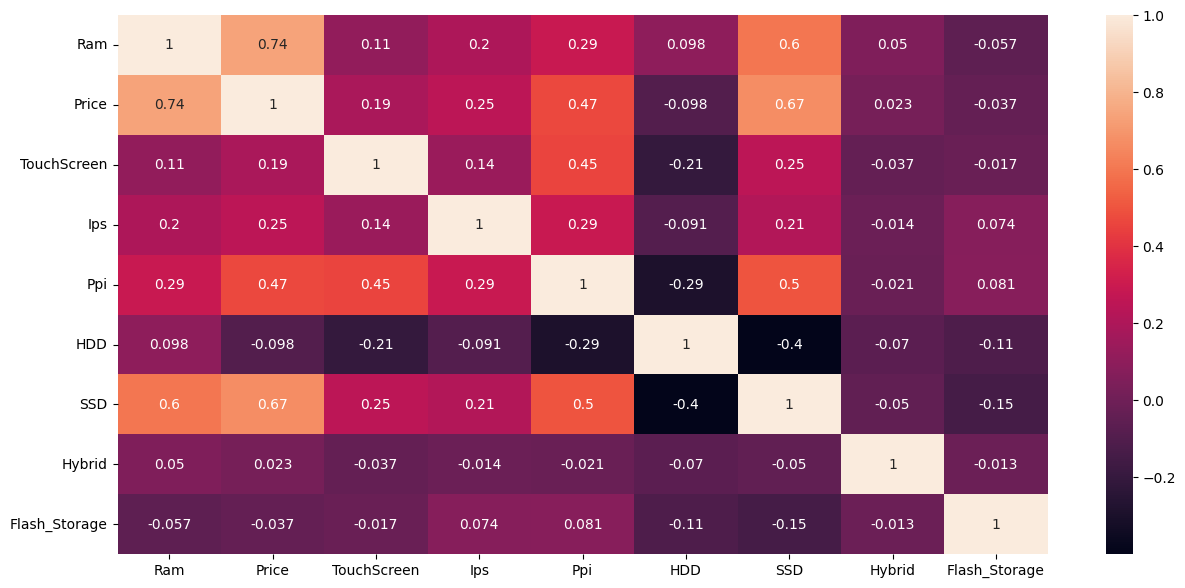

In [ ]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']
plt.figure(figsize = (15,7))
sns.heatmap(data=df[num_cols].corr(),annot=True)

In [ ]:
df

Company            TypeName  Ram                           Gpu   
0      Apple           Ultrabook    8  Intel Iris Plus Graphics 640  \
1      Apple           Ultrabook    8        Intel HD Graphics 6000   
2         HP            Notebook    8         Intel HD Graphics 620   
3      Apple           Ultrabook   16            AMD Radeon Pro 455   
4      Apple           Ultrabook    8  Intel Iris Plus Graphics 650   
...      ...                 ...  ...                           ...   
1269    Asus            Notebook    4           Nvidia GeForce 920M   
1270  Lenovo  2 in 1 Convertible    4         Intel HD Graphics 520   
1271  Lenovo  2 in 1 Convertible   16         Intel HD Graphics 520   
1272  Lenovo            Notebook    2             Intel HD Graphics   
1273      HP            Notebook    6            AMD Radeon R5 M330   

           OpSys  Weight        Price  TouchScreen  Ips         Ppi   
0          macOS  1.37kg   71378.6832            0    1  226.983005  \
1          macOS  1.34kg   47895.5232            0    0   127.67794   
2          No OS  1.86kg   30636.0000            0    0  141.211998   
3          macOS  1.83kg  135195.3360            0    1  220.534624   
4          macOS  1.37kg   96095.8080            0    1  226.983005   
...          ...     ...          ...          ...  ...         ...   
1269  Windows 10   2.2kg   38378.6496            0    0   100.45467   
1270  Windows 10   1.8kg   33992.6400            1    1  157.350512   
1271  Windows 10   1.3kg   79866.7200            1    1   276.05353   
1272  Windows 10   1.5kg   12201.1200            0    0  111.935204   
1273  Windows 10  2.19kg   40705.9200            0    0   100.45467   

                  Cpu_brand   HDD  SSD  Hybrid  Flash_Storage  
0             Intel Core i5     0  128       0              0  
1             Intel Core i5     0    0       0            128  
2             Intel Core i5     0  256       0              0  
3             Intel Core i7     0  512       0              0  
4             Intel Core i5     0  256       0              0  
...                     ...   ...  ...     ...            ...  
1269          Intel Core i7   500    0       0              0  
1270          Intel Core i7     0  128       0              0  
1271          Intel Core i7     0  512       0              0  
1272  Other Intel Processor     0    0       0             64  
1273          Intel Core i7  1000    0       0              0  

[1274 rows x 15 columns]

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df

Company            TypeName  Ram                           Gpu   
0      Apple           Ultrabook    8  Intel Iris Plus Graphics 640  \
1      Apple           Ultrabook    8        Intel HD Graphics 6000   
2         HP            Notebook    8         Intel HD Graphics 620   
3      Apple           Ultrabook   16            AMD Radeon Pro 455   
4      Apple           Ultrabook    8  Intel Iris Plus Graphics 650   
...      ...                 ...  ...                           ...   
1269    Asus            Notebook    4           Nvidia GeForce 920M   
1270  Lenovo  2 in 1 Convertible    4         Intel HD Graphics 520   
1271  Lenovo  2 in 1 Convertible   16         Intel HD Graphics 520   
1272  Lenovo            Notebook    2             Intel HD Graphics   
1273      HP            Notebook    6            AMD Radeon R5 M330   

           OpSys  Weight        Price  TouchScreen  Ips         Ppi   
0          macOS  1.37kg   71378.6832            0    1  226.983005  \
1          macOS  1.34kg   47895.5232            0    0   127.67794   
2          No OS  1.86kg   30636.0000            0    0  141.211998   
3          macOS  1.83kg  135195.3360            0    1  220.534624   
4          macOS  1.37kg   96095.8080            0    1  226.983005   
...          ...     ...          ...          ...  ...         ...   
1269  Windows 10   2.2kg   38378.6496            0    0   100.45467   
1270  Windows 10   1.8kg   33992.6400            1    1  157.350512   
1271  Windows 10   1.3kg   79866.7200            1    1   276.05353   
1272  Windows 10   1.5kg   12201.1200            0    0  111.935204   
1273  Windows 10  2.19kg   40705.9200            0    0   100.45467   

                  Cpu_brand   HDD  SSD  
0             Intel Core i5     0  128  
1             Intel Core i5     0    0  
2             Intel Core i5     0  256  
3             Intel Core i7     0  512  
4             Intel Core i5     0  256  
...                     ...   ...  ...  
1269          Intel Core i7   500    0  
1270          Intel Core i7     0  128  
1271          Intel Core i7     0  512  
1272  Other Intel Processor     0    0  
1273          Intel Core i7  1000    0  

[1274 rows x 13 columns]

## Weight
Removing kg from this


In [ ]:
df['Weight']=df['Weight'].str.split('kg',expand=True)[0]
df['Weight'] = df['Weight'].astype(float)

In [ ]:
df['Weight'].dtype

dtype('float64')

## Gpu

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
## Extracting Brand name Only
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [ ]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [ ]:
df[df['Gpu_brand']=='ARM']

Company            TypeName  Ram                Gpu      OpSys  Weight   
1191  Samsung  2 in 1 Convertible    4  ARM Mali T860 MP4  Chrome OS    1.15  \

         Price  TouchScreen  Ips       Ppi      Cpu_brand  HDD  SSD Gpu_brand  
1191  35111.52            1    1  234.5074  AMD Processor    0    0       ARM

In [ ]:
# Removing ARM and GPU
df.drop(1191,inplace=True)
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

## OpSys
Making 3 categories 
1- Windows
2- Mac
3- OtherOs

In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [ ]:
def segregate_os(os):
    if 'Windows 10' in os or os == 'Windows 7' or 'Windows 10 S' in os:
        return 'Windows'
    elif os == 'macOS' or os == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'


In [ ]:
df['Os'] = df['OpSys'].apply(segregate_os)
# droping OpSys
df.drop(labels='OpSys',axis=1,inplace=True)

In [ ]:
df

Company            TypeName  Ram  Weight        Price  TouchScreen  Ips   
0      Apple           Ultrabook    8    1.37   71378.6832            0    1  \
1      Apple           Ultrabook    8    1.34   47895.5232            0    0   
2         HP            Notebook    8    1.86   30636.0000            0    0   
3      Apple           Ultrabook   16    1.83  135195.3360            0    1   
4      Apple           Ultrabook    8    1.37   96095.8080            0    1   
...      ...                 ...  ...     ...          ...          ...  ...   
1269    Asus            Notebook    4    2.20   38378.6496            0    0   
1270  Lenovo  2 in 1 Convertible    4    1.80   33992.6400            1    1   
1271  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1272  Lenovo            Notebook    2    1.50   12201.1200            0    0   
1273      HP            Notebook    6    2.19   40705.9200            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1      127.67794          Intel Core i5     0    0     Intel      Mac  
2     141.211998          Intel Core i5     0  256     Intel   Others  
3     220.534624          Intel Core i7     0  512       AMD      Mac  
4     226.983005          Intel Core i5     0  256     Intel      Mac  
...          ...                    ...   ...  ...       ...      ...  
1269   100.45467          Intel Core i7   500    0    Nvidia  Windows  
1270  157.350512          Intel Core i7     0  128     Intel  Windows  
1271   276.05353          Intel Core i7     0  512     Intel  Windows  
1272  111.935204  Other Intel Processor     0    0     Intel  Windows  
1273   100.45467          Intel Core i7  1000    0       AMD  Windows  

[1273 rows x 13 columns]

## Price

my data is RIGHT skewed


C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_8812\3959042603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


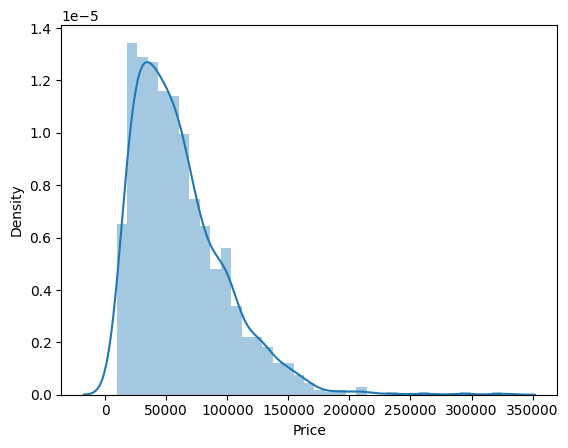

In [ ]:
sns.distplot(df['Price'])
print('my data is RIGHT skewed')

### to make price feature normally distributed I will use log Normal distribution


C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_8812\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<AxesSubplot: xlabel='Price', ylabel='Density'>

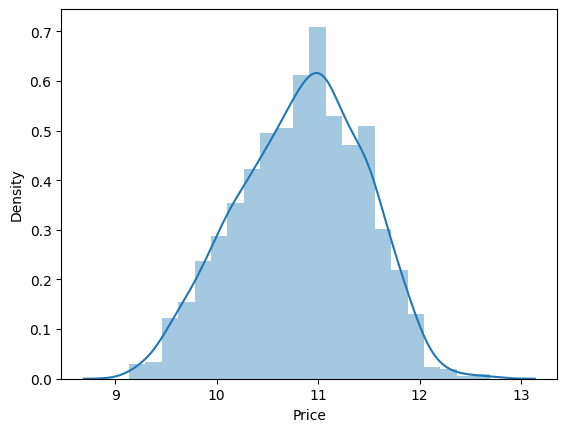

In [ ]:
sns.distplot(np.log(df['Price']))

In [ ]:
df['Price'] = np.log(df['Price'])

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_8812\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

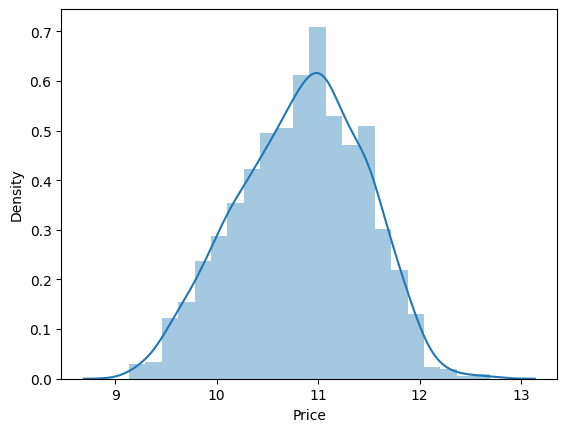

In [ ]:
sns.distplot(df['Price'])

In [ ]:
df

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips   
0      Apple           Ultrabook    8    1.37  11.175755            0    1  \
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1269    Asus            Notebook    4    2.20  10.555257            0    0   
1270  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1271  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1272  Lenovo            Notebook    2    1.50   9.409283            0    0   
1273      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1      127.67794          Intel Core i5     0    0     Intel      Mac  
2     141.211998          Intel Core i5     0  256     Intel   Others  
3     220.534624          Intel Core i7     0  512       AMD      Mac  
4     226.983005          Intel Core i5     0  256     Intel      Mac  
...          ...                    ...   ...  ...       ...      ...  
1269   100.45467          Intel Core i7   500    0    Nvidia  Windows  
1270  157.350512          Intel Core i7     0  128     Intel  Windows  
1271   276.05353          Intel Core i7     0  512     Intel  Windows  
1272  111.935204  Other Intel Processor     0    0     Intel  Windows  
1273   100.45467          Intel Core i7  1000    0       AMD  Windows  

[1273 rows x 13 columns]

In [ ]:
df.to_csv(path_or_buf='data/laptop_data_cleaned.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,
                              AdaBoostRegressor ,
                                GradientBoostingRegressor,
                                VotingRegressor,
                                StackingRegressor)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , r2_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # for num_cols
from sklearn.preprocessing import OneHotEncoder # for cat_cols
from sklearn.compose import ColumnTransformer # to transform features
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('data/laptop_data_cleaned.csv')
df.drop_duplicates(inplace=True)

In [ ]:
df

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips   
0      Apple           Ultrabook    8    1.37  11.175755            0    1  \
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1     127.677940          Intel Core i5     0    0     Intel      Mac  
2     141.211998          Intel Core i5     0  256     Intel   Others  
3     220.534624          Intel Core i7     0  512       AMD      Mac  
4     226.983005          Intel Core i5     0  256     Intel      Mac  
...          ...                    ...   ...  ...       ...      ...  
1268  100.454670          Intel Core i7   500    0    Nvidia  Windows  
1269  157.350512          Intel Core i7     0  128     Intel  Windows  
1270  276.053530          Intel Core i7     0  512     Intel  Windows  
1271  111.935204  Other Intel Processor     0    0     Intel  Windows  
1272  100.454670          Intel Core i7  1000    0       AMD  Windows  

[1272 rows x 13 columns]

In [ ]:
df.describe()

Ram       Weight        Price  TouchScreen          Ips   
count  1272.000000  1272.000000  1272.000000  1272.000000  1272.000000  \
mean      8.451258     2.041761    10.828035     0.147013     0.279874   
std       5.099249     0.669088     0.619774     0.354258     0.449114   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.500000    10.387379     0.000000     0.000000   
50%       8.000000     2.040000    10.872255     0.000000     0.000000   
75%       8.000000     2.310000    11.287447     0.000000     1.000000   
max      64.000000     4.700000    12.691441     1.000000     1.000000   

               Ppi          HDD          SSD  
count  1272.000000  1272.000000  1272.000000  
mean    146.936126   414.040881   186.298742  
std      42.940459   518.128204   186.597777  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.000000   256.000000  
75%     157.350512  1000.000000   256.000000  
max     352.465147  2000.000000  1024.000000

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
cat_cols = [features for features in X.columns if X[features].dtypes == 'O']
num_cols = [features for features in X.columns if X[features].dtypes != 'O']
len(num_cols) , len(cat_cols)

(7, 5)

In [ ]:
cat_pipeline = Pipeline(
    steps=[
        ('ohe',OneHotEncoder(sparse=False, # this will return me numpy array by the first time
        drop='first'# This will drop first column
              )),
        ('imputer',SimpleImputer())
    ]
)

In [ ]:
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer()),
        ('scaler',StandardScaler()),
    ]
)

In [ ]:
preprocessor_obj = ColumnTransformer(
    transformers=[
        ('cat_col_pipeline',cat_pipeline,cat_cols),
        ('num_col_pipeline',num_pipeline,num_cols)
    ],remainder='passthrough'
)
X = preprocessor_obj.fit_transform(X)

c:\Users\Gyanprakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=1)

X_train.shape , X_test.shape , y_train.shape ,y_test.shape


((1017, 38), (255, 38), (1017,), (255,))

In [ ]:
X_train.shape


(1017, 38)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.8304848348890135

In [ ]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}


In [ ]:
params = {
    "Random Forest": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        # 'max_features': ['sqrt', 'log2', None],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "Gradient Boosting": {
        'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        # 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
        'criterion': ['squared_error', 'friedman_mse'],
        # 'max_features': ['auto', 'sqrt', 'log2'],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "XGBRegressor": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "CatBoosting Regressor": {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 100]
    },
    "AdaBoost Regressor": {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        # 'loss': ['linear', 'square', 'exponential'],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }
}


In [ ]:
len(params.keys())

5

In [ ]:
def error_Accuracy(true,pred):
    r2_accuracy = r2_score(y_true=true,y_pred=pred)
    mse = mean_squared_error(y_true=true,y_pred=pred)
    mae = mean_absolute_error(y_true=true,y_pred=pred)
    return r2_accuracy,mse,mae

In [ ]:

class ModelTraining:
    def __init__(self):
        self.model_list = []
        self.accuracy_list = []
        self.best_params_dict = {}

    def train_model(self, models, params, X_train, y_train, X_test, y_test):
        for i, model_name in enumerate(models.keys()):
            model = models[model_name]
            param = params[model_name]

            grid_search_cv = GridSearchCV(estimator=model, param_grid=param, cv=5)
            grid_search_cv.fit(X_train, y_train)

            best_params = grid_search_cv.best_params_
            model.set_params(**best_params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            r2_accuracy, mse, mae = error_Accuracy(true=y_test, pred=y_pred)

            print(model_name)
            self.model_list.append(model_name)

            print("- Mean Absolute Error: {:.4f}".format(mae))
            print("- Mean Squared Error: {:.4f}".format(mse))
            print("- R2 Score: {:.4f}".format(r2_accuracy))
            print('\n')

            self.best_params_dict[model_name] = best_params

            self.accuracy_list.append(r2_accuracy)

    def return_accuracy_list(self):
        return self.accuracy_list
    
    def best_params(self):
        return self.best_params_dict


In [ ]:
train_model = ModelTraining()

In [ ]:
train_model.train_model(models=models,params=params,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

Random Forest
- Mean Absolute Error: 0.1548
- Mean Squared Error: 0.0406
- R2 Score: 0.8877


Gradient Boosting
- Mean Absolute Error: 0.1583
- Mean Squared Error: 0.0401
- R2 Score: 0.8892


XGBRegressor
- Mean Absolute Error: 0.1396
- Mean Squared Error: 0.0346
- R2 Score: 0.9044


CatBoosting Regressor
- Mean Absolute Error: 0.1583
- Mean Squared Error: 0.0427
- R2 Score: 0.8818


AdaBoost Regressor
- Mean Absolute Error: 0.2123
- Mean Squared Error: 0.0703
- R2 Score: 0.8057




In [ ]:
train_model.best_params_dict

{'Random Forest': {'criterion': 'squared_error', 'n_estimators': 256},
 'Gradient Boosting': {'criterion': 'squared_error',
  'learning_rate': 0.1,
  'loss': 'huber',
  'n_estimators': 256},
 'XGBRegressor': {'learning_rate': 0.1, 'n_estimators': 256},
 'CatBoosting Regressor': {'depth': 10,
  'iterations': 100,
  'learning_rate': 0.1},
 'AdaBoost Regressor': {'learning_rate': 0.5, 'n_estimators': 128}}

In [ ]:
train_model.accuracy_list

[0.8876536370963517,
 0.8891788445599889,
 0.90441338344959,
 0.881847048029996,
 0.8056619213127386]

In [ ]:
model_accuracy=pd.DataFrame(list(zip(list(models.keys()),train_model.accuracy_list)),columns=['model','accuracy'])
model_accuracy

model  accuracy
0          Random Forest  0.887654
1      Gradient Boosting  0.889179
2           XGBRegressor  0.904413
3  CatBoosting Regressor  0.881847
4     AdaBoost Regressor  0.805662

In [ ]:
best_models = model_accuracy.sort_values(by='accuracy',ascending=False).head(4)
best_models

model  accuracy
2           XGBRegressor  0.904413
1      Gradient Boosting  0.889179
0          Random Forest  0.887654
3  CatBoosting Regressor  0.881847

In [ ]:
best_models

model  accuracy
2           XGBRegressor  0.904413
1      Gradient Boosting  0.889179
0          Random Forest  0.887654
3  CatBoosting Regressor  0.881847

## Voting Regressor

In [ ]:
train_model.best_params_dict

{'Random Forest': {'criterion': 'squared_error', 'n_estimators': 256},
 'Gradient Boosting': {'criterion': 'squared_error',
  'learning_rate': 0.1,
  'loss': 'huber',
  'n_estimators': 256},
 'XGBRegressor': {'learning_rate': 0.1, 'n_estimators': 256},
 'CatBoosting Regressor': {'depth': 10,
  'iterations': 100,
  'learning_rate': 0.1},
 'AdaBoost Regressor': {'learning_rate': 0.5, 'n_estimators': 128}}

In [ ]:
RandomForest =RandomForestRegressor(criterion='squared_error',n_estimators=256)
GradientBoost = GradientBoostingRegressor(criterion='squared_error',learning_rate=0.1,loss='huber',n_estimators=256)
Xgboost = XGBRegressor(learning_rate = 0.1,n_estimators = 256)
Catboost = CatBoostRegressor(learning_rate=0.5,n_estimators=256)

In [ ]:
votingRegressor = VotingRegressor(
    estimators=[
        ('RandomForest',RandomForest),
        ('GradientBoost',GradientBoost),
        ('Xgboost',Xgboost),
        ('Catboost',Catboost)
    ]
)

In [ ]:
votingRegressor.fit(X_train,y_train)

0:	learn: 0.4550098	total: 1.33ms	remaining: 340ms
1:	learn: 0.3455767	total: 2.46ms	remaining: 313ms
2:	learn: 0.2889211	total: 3.53ms	remaining: 298ms
3:	learn: 0.2644756	total: 4.58ms	remaining: 288ms
4:	learn: 0.2525025	total: 5.55ms	remaining: 279ms
5:	learn: 0.2404295	total: 6.59ms	remaining: 275ms
6:	learn: 0.2343844	total: 7.73ms	remaining: 275ms
7:	learn: 0.2312554	total: 9.03ms	remaining: 280ms
8:	learn: 0.2268876	total: 10ms	remaining: 276ms
9:	learn: 0.2209449	total: 11.2ms	remaining: 275ms
10:	learn: 0.2170065	total: 12.2ms	remaining: 272ms
11:	learn: 0.2142584	total: 13.2ms	remaining: 268ms
12:	learn: 0.2086405	total: 14.2ms	remaining: 265ms
13:	learn: 0.2054647	total: 15.1ms	remaining: 262ms
14:	learn: 0.2019314	total: 16.1ms	remaining: 259ms
15:	learn: 0.1986108	total: 17.1ms	remaining: 257ms
16:	learn: 0.1943821	total: 18.1ms	remaining: 255ms
17:	learn: 0.1919346	total: 19.1ms	remaining: 253ms
18:	learn: 0.1898856	total: 20.1ms	remaining: 251ms
19:	learn: 0.1879048	tot

VotingRegressor(estimators=[('RandomForest',
                             RandomForestRegressor(n_estimators=256)),
                            ('GradientBoost',
                             GradientBoostingRegressor(criterion='squared_error',
                                                       loss='huber',
                                                       n_estimators=256)),
                            ('Xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          en...
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=256, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('Catboost',
                             <catboost.core.CatBoostRegressor object at 0x000002ADA6046750>)])

In [ ]:
y_pred_voting_regressor = votingRegressor.predict(X_test)

In [ ]:
r2_accuracy, mse, mae = error_Accuracy(true=y_test, pred=y_pred_voting_regressor)
print("- Mean Absolute Error: {:.4f}".format(mae))
print("- Mean Squared Error: {:.4f}".format(mse))
print("- R2 Score: {:.4f}".format(r2_accuracy))

- Mean Absolute Error: 0.1403
- Mean Squared Error: 0.0329
- R2 Score: 0.9091


## Stacking Regressor

In [ ]:
stackingRegressor = StackingRegressor(
    estimators=[
        ('RandomForest',RandomForest),
        ('GradientBoost',GradientBoost),
        ('Xgboost',Xgboost),
        ('Catboost',Catboost)
    ]
)

In [ ]:
StackingRegressor.fit(X_train,y_train)

0:	learn: 0.4550098	total: 1.32ms	remaining: 337ms
1:	learn: 0.3455767	total: 2.41ms	remaining: 306ms
2:	learn: 0.2889211	total: 3.44ms	remaining: 291ms
3:	learn: 0.2644756	total: 4.47ms	remaining: 282ms
4:	learn: 0.2525025	total: 5.64ms	remaining: 283ms
5:	learn: 0.2404295	total: 6.95ms	remaining: 290ms
6:	learn: 0.2343844	total: 8.2ms	remaining: 292ms
7:	learn: 0.2312554	total: 9.2ms	remaining: 285ms
8:	learn: 0.2268876	total: 10.2ms	remaining: 280ms
9:	learn: 0.2209449	total: 11.2ms	remaining: 277ms
10:	learn: 0.2170065	total: 12.3ms	remaining: 273ms
11:	learn: 0.2142584	total: 13.3ms	remaining: 271ms
12:	learn: 0.2086405	total: 14.3ms	remaining: 267ms
13:	learn: 0.2054647	total: 15.3ms	remaining: 264ms
14:	learn: 0.2019314	total: 16.4ms	remaining: 263ms
15:	learn: 0.1986108	total: 17.4ms	remaining: 261ms
16:	learn: 0.1943821	total: 18.4ms	remaining: 259ms
17:	learn: 0.1919346	total: 19.5ms	remaining: 258ms
18:	learn: 0.1898856	total: 20.6ms	remaining: 257ms
19:	learn: 0.1879048	tot

StackingRegressor(estimators=[('RandomForest',
                               RandomForestRegressor(n_estimators=256)),
                              ('GradientBoost',
                               GradientBoostingRegressor(criterion='squared_error',
                                                         loss='huber',
                                                         n_estimators=256)),
                              ('Xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=256, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('Catboost',
                               <catboost.core.CatBoostRegressor object at 0x000002ADA6046750>)])

In [ ]:
y_pred_stacking_regressor = StackingRegressor.predict(X_test)

In [ ]:
r2_accuracy, mse, mae = error_Accuracy(true=y_test, pred=y_pred_stacking_regressor)
print("- Mean Absolute Error: {:.4f}".format(mae))
print("- Mean Squared Error: {:.4f}".format(mse))
print("- R2 Score: {:.4f}".format(r2_accuracy))

- Mean Absolute Error: 0.1414
- Mean Squared Error: 0.0332
- R2 Score: 0.9081


# Finally Voting Regressor is the best Algo For my MODEL